In [2]:
import os
from os import listdir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import tensorflow as tf
import missingno as msno
import math
%matplotlib inline

In [11]:
path = 'E:\\me\\AI\\sepsis'
path_a = 'E:\\me\\AI\\sepsis\\training_setA\\training'
path_b = 'E:\\me\\AI\\sepsis\\training_setB\\training_setB'
training_a = sorted(os.listdir(path_a))
training_b = sorted(os.listdir(path_b))

In [13]:
with open("sepsis_data.psv", "wb") as fout:
    for i, csv in enumerate(training_a):
        print(i)
        if i == 0:
            with open(path_a + '/' + csv, "rb") as f:
                fout.write(f.read())
      # now the rest:    
        with open(path_a + '/' + csv, "rb") as f:
            next(f) 
            fout.write(f.read())
      
    for i,csv in enumerate(training_b):
        print(i)
        with open(path_b + '/' + csv, "rb") as f:
            next(f)
            fout.write(f.read())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071


3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722


5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364


6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006


8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669


10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
1026

11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
1163

12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
1301

14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
1438

15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
1575

16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
1713

18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
1852

19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
1990

1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358


2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004


4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646


6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298


7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938


9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582


10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
1102

12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
1240

13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
1378

14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
1515

16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
1652

17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
17899
1790

19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
1926

In [14]:
sepsis_data = pd.read_csv('sepsis_data.psv', sep ='|')

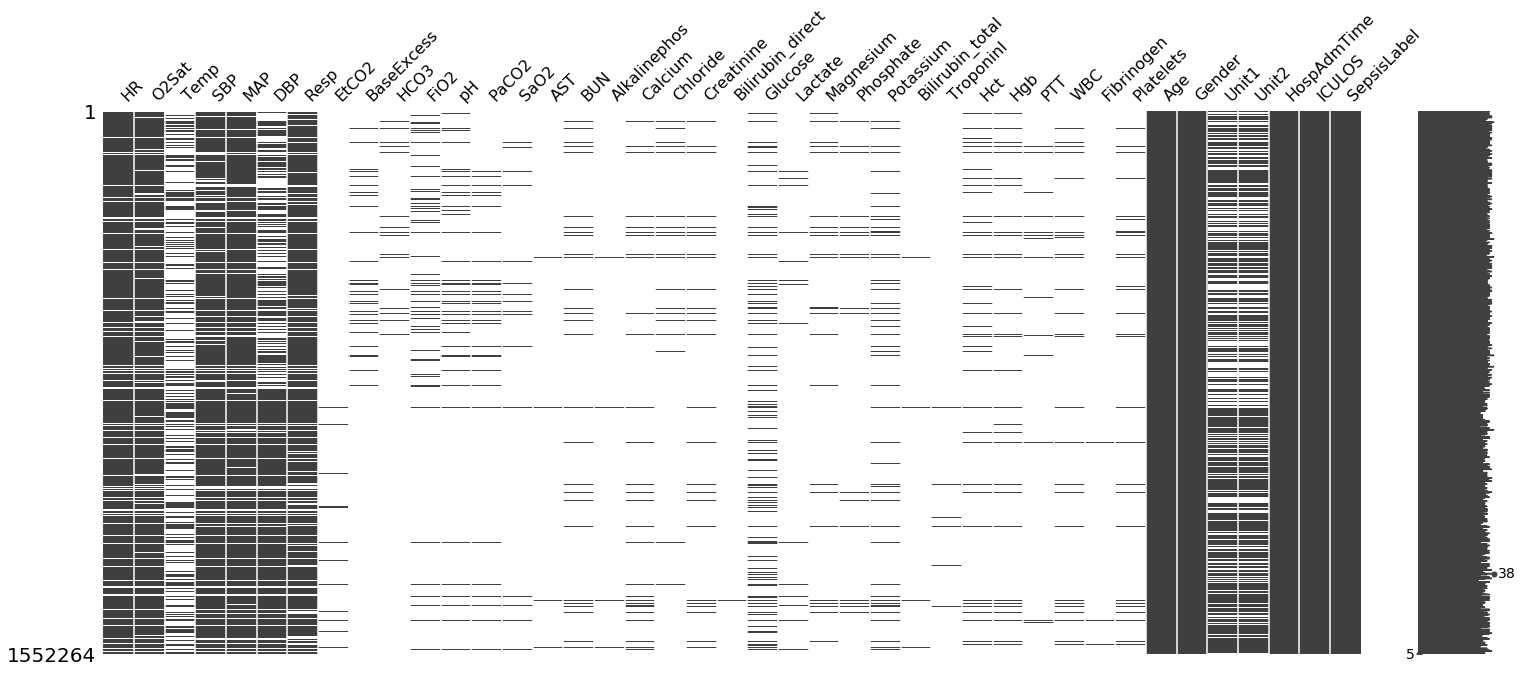

In [15]:
# A matrix indicating the no.of missing values in each column (dark - available, white-missing)
msno.matrix(sepsis_data)

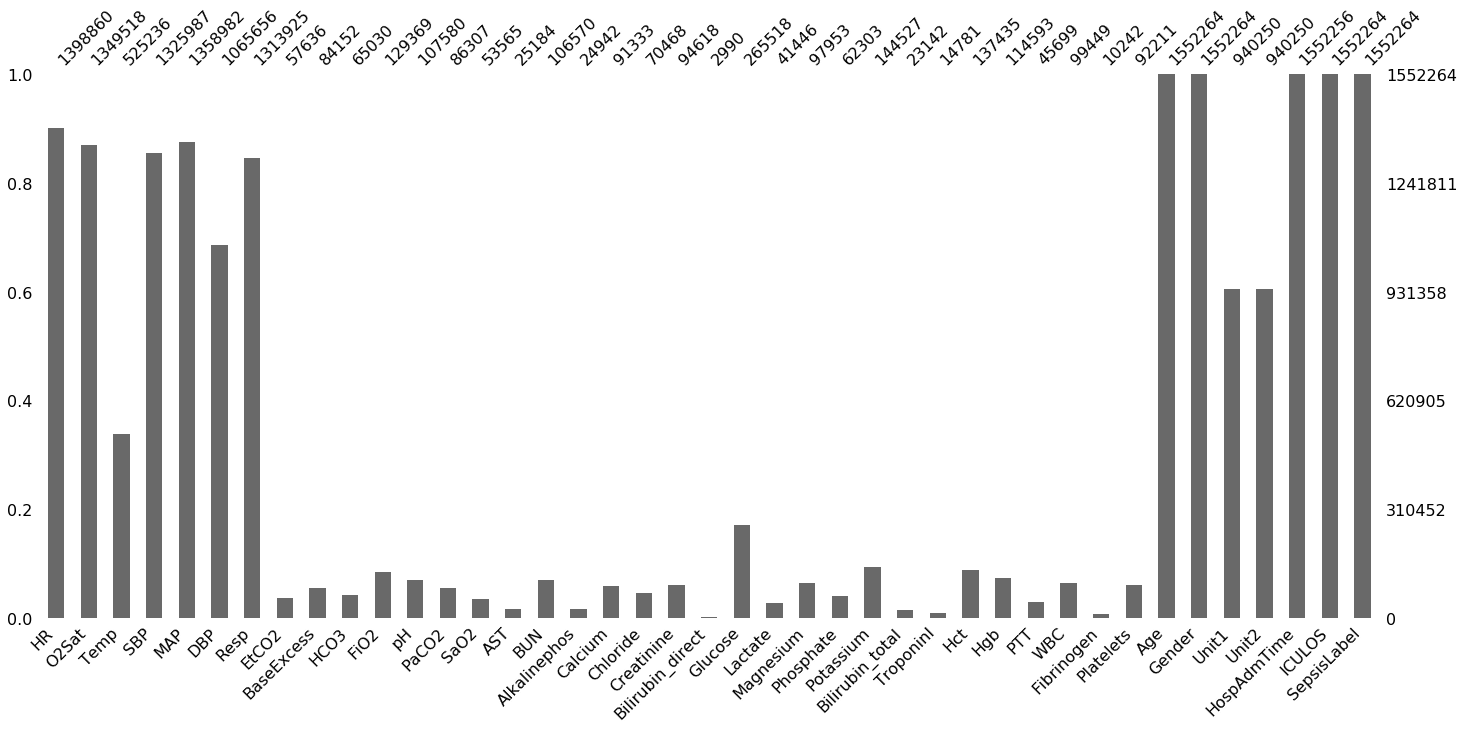

In [16]:
# A bar graph indicating the no.of missing values in each column
msno.bar(sepsis_data)

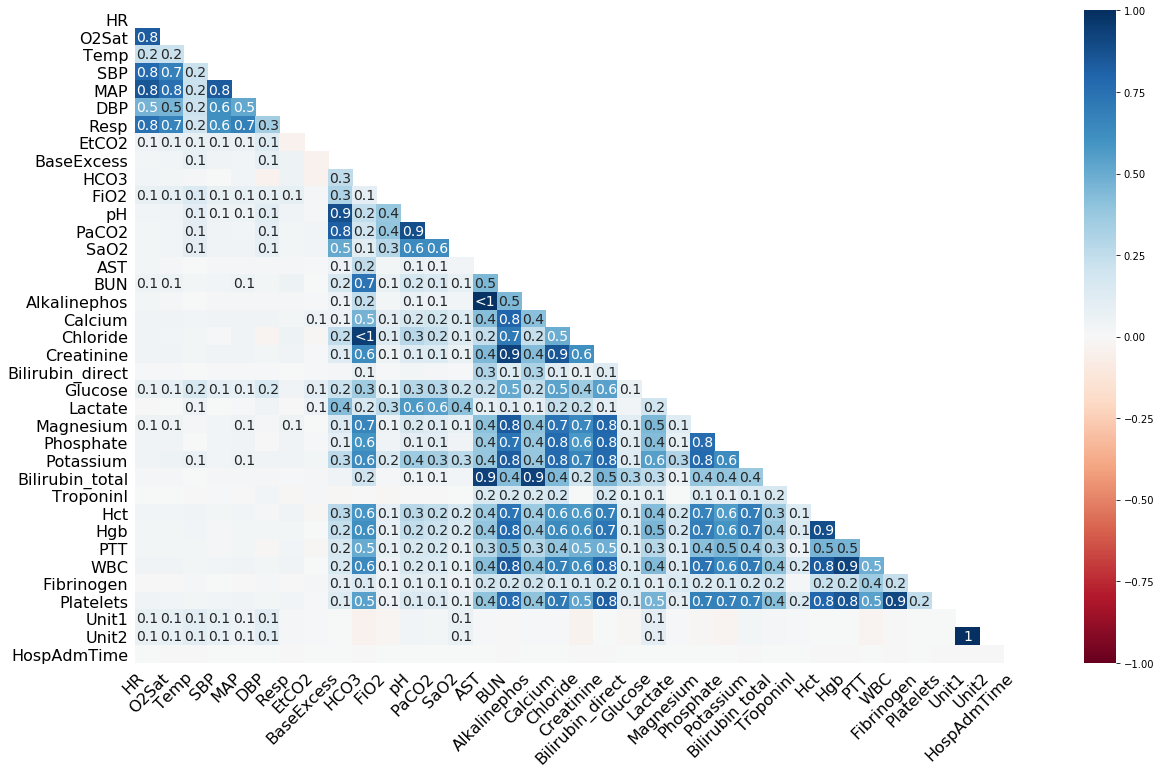

In [17]:
# A heatmap to show the correlation between the various features
msno.heatmap(sepsis_data)

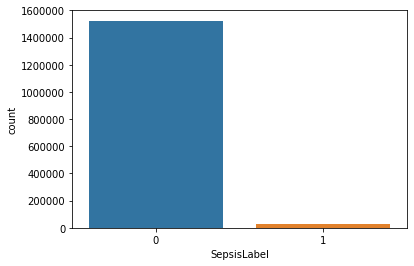

In [18]:
#No.of 
sns.countplot(x='SepsisLabel',data=sepsis_data)

In [19]:
sepsis_data.shape

(1552264, 41)

In [20]:
total_X_data = pd.DataFrame(columns=['HR','O2Sat','Temp', 'SBP', 'MAP', 'Resp', 'Age', 'Gender','HospAdmTime', 'ICULOS'])
total_y_data = pd.DataFrame(columns=['SepsisLabel'])

In [21]:
for i in training_a:
    print(i)
    data = pd.read_csv(path_a+'\\'+i,sep = '|')
    data.drop(['EtCO2','Fibrinogen', 'Unit1', 'Unit2', 'BaseExcess', 'DBP', 'Hct', 'Hgb', 'PTT', 'WBC', 'pH','HCO3','FiO2', 'PaCO2', 'Platelets', 'Magnesium',  'Phosphate',  'Potassium', 'Bilirubin_total',  'TroponinI','SaO2', 'AST','BUN', 'Alkalinephos', 'Bilirubin_direct','Glucose','Lactate', 'Calcium',  'Chloride', 'Creatinine' ],axis = 1,inplace = True)

    data.dropna(thresh=data.shape[1]*0.40,how='all',inplace = True)
    La_1 = data['SepsisLabel'].sum()
    if La_1:
        y_train.append(1)
    else:
        y_train.append(0)
    data.drop(['SepsisLabel'],axis = 1,inplace = True)
    data = data.apply(lambda x: x.fillna(x.median()),axis=0)
    data = data.fillna(0)
    if len(data) < 40:
        Pad = pd.DataFrame({'HR':0.0 ,'O2Sat':0.0, 'Temp':0.0 , 'SBP':0.0, 'MAP':0.0, 'Resp':0.0, 'Age':0.0, 'Gender': 0 ,'HospAdmTime':0.0, 'ICULOS':0}, index =[item for item in range(0,40-len(data))])
        data = pd.concat([Pad, data]).reset_index(drop = True)
    elif len(data) >40:
        data = data[len(data)-40::1]
    total_X_data = pd.concat([total_X_data, data]).reset_index(drop = True)
    data = data.values
    X_train.append(data)
    print('X_train: ' , len(X_train))
    print('y_train: ' , len(y_train))

p000001.psv
X_train:  1
y_train:  1
p000002.psv
X_train:  2
y_train:  2
p000003.psv
X_train:  3
y_train:  3
p000004.psv
X_train:  4
y_train:  4
p000005.psv
X_train:  5
y_train:  5
p000006.psv
X_train:  6
y_train:  6
p000007.psv
X_train:  7
y_train:  7
p000008.psv
X_train:  8
y_train:  8
p000009.psv
X_train:  9
y_train:  9
p000010.psv
X_train:  10
y_train:  10
p000011.psv
X_train:  11
y_train:  11
p000012.psv
X_train:  12
y_train:  12
p000013.psv
X_train:  13
y_train:  13
p000014.psv
X_train:  14
y_train:  14
p000015.psv
X_train:  15
y_train:  15
p000016.psv
X_train:  16
y_train:  16
p000017.psv
X_train:  17
y_train:  17
p000018.psv
X_train:  18
y_train:  18
p000019.psv
X_train:  19
y_train:  19
p000020.psv
X_train:  20
y_train:  20
p000021.psv
X_train:  21
y_train:  21
p000022.psv
X_train:  22
y_train:  22
p000023.psv
X_train:  23
y_train:  23
p000024.psv
X_train:  24
y_train:  24
p000025.psv
X_train:  25
y_train:  25
p000026.psv
X_train:  26
y_train:  26
p000027.psv
X_train:  27
y_tra

X_train:  211
y_train:  211
p000212.psv
X_train:  212
y_train:  212
p000213.psv
X_train:  213
y_train:  213
p000214.psv
X_train:  214
y_train:  214
p000215.psv
X_train:  215
y_train:  215
p000216.psv
X_train:  216
y_train:  216
p000217.psv
X_train:  217
y_train:  217
p000218.psv
X_train:  218
y_train:  218
p000219.psv
X_train:  219
y_train:  219
p000220.psv
X_train:  220
y_train:  220
p000221.psv
X_train:  221
y_train:  221
p000222.psv
X_train:  222
y_train:  222
p000223.psv
X_train:  223
y_train:  223
p000224.psv
X_train:  224
y_train:  224
p000225.psv
X_train:  225
y_train:  225
p000226.psv
X_train:  226
y_train:  226
p000227.psv
X_train:  227
y_train:  227
p000228.psv
X_train:  228
y_train:  228
p000229.psv
X_train:  229
y_train:  229
p000230.psv
X_train:  230
y_train:  230
p000231.psv
X_train:  231
y_train:  231
p000232.psv
X_train:  232
y_train:  232
p000233.psv
X_train:  233
y_train:  233
p000234.psv
X_train:  234
y_train:  234
p000235.psv
X_train:  235
y_train:  235
p000236.psv


X_train:  417
y_train:  417
p000418.psv
X_train:  418
y_train:  418
p000419.psv
X_train:  419
y_train:  419
p000420.psv
X_train:  420
y_train:  420
p000421.psv
X_train:  421
y_train:  421
p000422.psv
X_train:  422
y_train:  422
p000423.psv
X_train:  423
y_train:  423
p000424.psv
X_train:  424
y_train:  424
p000425.psv
X_train:  425
y_train:  425
p000426.psv
X_train:  426
y_train:  426
p000427.psv
X_train:  427
y_train:  427
p000428.psv
X_train:  428
y_train:  428
p000429.psv
X_train:  429
y_train:  429
p000430.psv
X_train:  430
y_train:  430
p000431.psv
X_train:  431
y_train:  431
p000432.psv
X_train:  432
y_train:  432
p000433.psv
X_train:  433
y_train:  433
p000434.psv
X_train:  434
y_train:  434
p000435.psv
X_train:  435
y_train:  435
p000436.psv
X_train:  436
y_train:  436
p000437.psv
X_train:  437
y_train:  437
p000438.psv
X_train:  438
y_train:  438
p000439.psv
X_train:  439
y_train:  439
p000440.psv
X_train:  440
y_train:  440
p000441.psv
X_train:  441
y_train:  441
p000442.psv


X_train:  628
y_train:  628
p000629.psv
X_train:  629
y_train:  629
p000630.psv
X_train:  630
y_train:  630
p000631.psv
X_train:  631
y_train:  631
p000632.psv
X_train:  632
y_train:  632
p000633.psv
X_train:  633
y_train:  633
p000634.psv
X_train:  634
y_train:  634
p000635.psv
X_train:  635
y_train:  635
p000636.psv
X_train:  636
y_train:  636
p000637.psv
X_train:  637
y_train:  637
p000638.psv
X_train:  638
y_train:  638
p000639.psv
X_train:  639
y_train:  639
p000640.psv
X_train:  640
y_train:  640
p000641.psv
X_train:  641
y_train:  641
p000642.psv
X_train:  642
y_train:  642
p000643.psv
X_train:  643
y_train:  643
p000644.psv
X_train:  644
y_train:  644
p000645.psv
X_train:  645
y_train:  645
p000646.psv
X_train:  646
y_train:  646
p000647.psv
X_train:  647
y_train:  647
p000648.psv
X_train:  648
y_train:  648
p000649.psv
X_train:  649
y_train:  649
p000650.psv
X_train:  650
y_train:  650
p000651.psv
X_train:  651
y_train:  651
p000652.psv
X_train:  652
y_train:  652
p000653.psv


X_train:  834
y_train:  834
p000835.psv
X_train:  835
y_train:  835
p000836.psv
X_train:  836
y_train:  836
p000837.psv
X_train:  837
y_train:  837
p000838.psv
X_train:  838
y_train:  838
p000839.psv
X_train:  839
y_train:  839
p000840.psv
X_train:  840
y_train:  840
p000841.psv
X_train:  841
y_train:  841
p000842.psv
X_train:  842
y_train:  842
p000843.psv
X_train:  843
y_train:  843
p000844.psv
X_train:  844
y_train:  844
p000845.psv
X_train:  845
y_train:  845
p000846.psv
X_train:  846
y_train:  846
p000847.psv
X_train:  847
y_train:  847
p000848.psv
X_train:  848
y_train:  848
p000849.psv
X_train:  849
y_train:  849
p000850.psv
X_train:  850
y_train:  850
p000851.psv
X_train:  851
y_train:  851
p000852.psv
X_train:  852
y_train:  852
p000853.psv
X_train:  853
y_train:  853
p000854.psv
X_train:  854
y_train:  854
p000855.psv
X_train:  855
y_train:  855
p000856.psv
X_train:  856
y_train:  856
p000857.psv
X_train:  857
y_train:  857
p000858.psv
X_train:  858
y_train:  858
p000859.psv


X_train:  1037
y_train:  1037
p001038.psv
X_train:  1038
y_train:  1038
p001039.psv
X_train:  1039
y_train:  1039
p001040.psv
X_train:  1040
y_train:  1040
p001041.psv
X_train:  1041
y_train:  1041
p001042.psv
X_train:  1042
y_train:  1042
p001043.psv
X_train:  1043
y_train:  1043
p001044.psv
X_train:  1044
y_train:  1044
p001045.psv
X_train:  1045
y_train:  1045
p001046.psv
X_train:  1046
y_train:  1046
p001047.psv
X_train:  1047
y_train:  1047
p001048.psv
X_train:  1048
y_train:  1048
p001049.psv
X_train:  1049
y_train:  1049
p001050.psv
X_train:  1050
y_train:  1050
p001051.psv
X_train:  1051
y_train:  1051
p001052.psv
X_train:  1052
y_train:  1052
p001053.psv
X_train:  1053
y_train:  1053
p001054.psv
X_train:  1054
y_train:  1054
p001055.psv
X_train:  1055
y_train:  1055
p001056.psv
X_train:  1056
y_train:  1056
p001057.psv
X_train:  1057
y_train:  1057
p001058.psv
X_train:  1058
y_train:  1058
p001059.psv
X_train:  1059
y_train:  1059
p001060.psv
X_train:  1060
y_train:  1060
p001

X_train:  1237
y_train:  1237
p001238.psv
X_train:  1238
y_train:  1238
p001239.psv
X_train:  1239
y_train:  1239
p001240.psv
X_train:  1240
y_train:  1240
p001241.psv
X_train:  1241
y_train:  1241
p001242.psv
X_train:  1242
y_train:  1242
p001243.psv
X_train:  1243
y_train:  1243
p001244.psv
X_train:  1244
y_train:  1244
p001245.psv
X_train:  1245
y_train:  1245
p001246.psv
X_train:  1246
y_train:  1246
p001247.psv
X_train:  1247
y_train:  1247
p001248.psv
X_train:  1248
y_train:  1248
p001249.psv
X_train:  1249
y_train:  1249
p001250.psv
X_train:  1250
y_train:  1250
p001251.psv
X_train:  1251
y_train:  1251
p001252.psv
X_train:  1252
y_train:  1252
p001253.psv
X_train:  1253
y_train:  1253
p001254.psv
X_train:  1254
y_train:  1254
p001255.psv
X_train:  1255
y_train:  1255
p001256.psv
X_train:  1256
y_train:  1256
p001257.psv
X_train:  1257
y_train:  1257
p001258.psv
X_train:  1258
y_train:  1258
p001259.psv
X_train:  1259
y_train:  1259
p001260.psv
X_train:  1260
y_train:  1260
p001

X_train:  1433
y_train:  1433
p001434.psv
X_train:  1434
y_train:  1434
p001435.psv
X_train:  1435
y_train:  1435
p001436.psv
X_train:  1436
y_train:  1436
p001437.psv
X_train:  1437
y_train:  1437
p001438.psv
X_train:  1438
y_train:  1438
p001439.psv
X_train:  1439
y_train:  1439
p001440.psv
X_train:  1440
y_train:  1440
p001441.psv
X_train:  1441
y_train:  1441
p001442.psv
X_train:  1442
y_train:  1442
p001443.psv
X_train:  1443
y_train:  1443
p001444.psv
X_train:  1444
y_train:  1444
p001445.psv
X_train:  1445
y_train:  1445
p001446.psv
X_train:  1446
y_train:  1446
p001447.psv
X_train:  1447
y_train:  1447
p001448.psv
X_train:  1448
y_train:  1448
p001449.psv
X_train:  1449
y_train:  1449
p001450.psv
X_train:  1450
y_train:  1450
p001451.psv
X_train:  1451
y_train:  1451
p001452.psv
X_train:  1452
y_train:  1452
p001453.psv
X_train:  1453
y_train:  1453
p001454.psv
X_train:  1454
y_train:  1454
p001455.psv
X_train:  1455
y_train:  1455
p001456.psv
X_train:  1456
y_train:  1456
p001

X_train:  1631
y_train:  1631
p001632.psv
X_train:  1632
y_train:  1632
p001633.psv
X_train:  1633
y_train:  1633
p001634.psv
X_train:  1634
y_train:  1634
p001635.psv
X_train:  1635
y_train:  1635
p001636.psv
X_train:  1636
y_train:  1636
p001637.psv
X_train:  1637
y_train:  1637
p001638.psv
X_train:  1638
y_train:  1638
p001639.psv
X_train:  1639
y_train:  1639
p001640.psv
X_train:  1640
y_train:  1640
p001641.psv
X_train:  1641
y_train:  1641
p001642.psv
X_train:  1642
y_train:  1642
p001643.psv
X_train:  1643
y_train:  1643
p001644.psv
X_train:  1644
y_train:  1644
p001645.psv
X_train:  1645
y_train:  1645
p001646.psv
X_train:  1646
y_train:  1646
p001647.psv
X_train:  1647
y_train:  1647
p001648.psv
X_train:  1648
y_train:  1648
p001649.psv
X_train:  1649
y_train:  1649
p001650.psv
X_train:  1650
y_train:  1650
p001651.psv
X_train:  1651
y_train:  1651
p001652.psv
X_train:  1652
y_train:  1652
p001653.psv
X_train:  1653
y_train:  1653
p001654.psv
X_train:  1654
y_train:  1654
p001

X_train:  1827
y_train:  1827
p001828.psv
X_train:  1828
y_train:  1828
p001829.psv
X_train:  1829
y_train:  1829
p001830.psv
X_train:  1830
y_train:  1830
p001831.psv
X_train:  1831
y_train:  1831
p001832.psv
X_train:  1832
y_train:  1832
p001833.psv
X_train:  1833
y_train:  1833
p001834.psv
X_train:  1834
y_train:  1834
p001835.psv
X_train:  1835
y_train:  1835
p001836.psv
X_train:  1836
y_train:  1836
p001837.psv
X_train:  1837
y_train:  1837
p001838.psv
X_train:  1838
y_train:  1838
p001839.psv
X_train:  1839
y_train:  1839
p001840.psv
X_train:  1840
y_train:  1840
p001841.psv
X_train:  1841
y_train:  1841
p001842.psv
X_train:  1842
y_train:  1842
p001843.psv
X_train:  1843
y_train:  1843
p001844.psv
X_train:  1844
y_train:  1844
p001845.psv
X_train:  1845
y_train:  1845
p001846.psv
X_train:  1846
y_train:  1846
p001847.psv
X_train:  1847
y_train:  1847
p001848.psv
X_train:  1848
y_train:  1848
p001849.psv
X_train:  1849
y_train:  1849
p001850.psv
X_train:  1850
y_train:  1850
p001

X_train:  2028
y_train:  2028
p002029.psv
X_train:  2029
y_train:  2029
p002030.psv
X_train:  2030
y_train:  2030
p002031.psv
X_train:  2031
y_train:  2031
p002032.psv
X_train:  2032
y_train:  2032
p002033.psv
X_train:  2033
y_train:  2033
p002034.psv
X_train:  2034
y_train:  2034
p002035.psv
X_train:  2035
y_train:  2035
p002036.psv
X_train:  2036
y_train:  2036
p002037.psv
X_train:  2037
y_train:  2037
p002038.psv
X_train:  2038
y_train:  2038
p002039.psv
X_train:  2039
y_train:  2039
p002040.psv
X_train:  2040
y_train:  2040
p002041.psv
X_train:  2041
y_train:  2041
p002042.psv
X_train:  2042
y_train:  2042
p002043.psv
X_train:  2043
y_train:  2043
p002044.psv
X_train:  2044
y_train:  2044
p002045.psv
X_train:  2045
y_train:  2045
p002046.psv
X_train:  2046
y_train:  2046
p002047.psv
X_train:  2047
y_train:  2047
p002048.psv
X_train:  2048
y_train:  2048
p002049.psv
X_train:  2049
y_train:  2049
p002050.psv
X_train:  2050
y_train:  2050
p002051.psv
X_train:  2051
y_train:  2051
p002

X_train:  2226
y_train:  2226
p002227.psv
X_train:  2227
y_train:  2227
p002228.psv
X_train:  2228
y_train:  2228
p002229.psv
X_train:  2229
y_train:  2229
p002230.psv
X_train:  2230
y_train:  2230
p002231.psv
X_train:  2231
y_train:  2231
p002232.psv
X_train:  2232
y_train:  2232
p002233.psv
X_train:  2233
y_train:  2233
p002234.psv
X_train:  2234
y_train:  2234
p002235.psv
X_train:  2235
y_train:  2235
p002236.psv
X_train:  2236
y_train:  2236
p002237.psv
X_train:  2237
y_train:  2237
p002238.psv
X_train:  2238
y_train:  2238
p002239.psv
X_train:  2239
y_train:  2239
p002240.psv
X_train:  2240
y_train:  2240
p002241.psv
X_train:  2241
y_train:  2241
p002242.psv
X_train:  2242
y_train:  2242
p002243.psv
X_train:  2243
y_train:  2243
p002244.psv
X_train:  2244
y_train:  2244
p002245.psv
X_train:  2245
y_train:  2245
p002246.psv
X_train:  2246
y_train:  2246
p002247.psv
X_train:  2247
y_train:  2247
p002248.psv
X_train:  2248
y_train:  2248
p002249.psv
X_train:  2249
y_train:  2249
p002

X_train:  2426
y_train:  2426
p002427.psv
X_train:  2427
y_train:  2427
p002428.psv
X_train:  2428
y_train:  2428
p002429.psv
X_train:  2429
y_train:  2429
p002430.psv
X_train:  2430
y_train:  2430
p002431.psv
X_train:  2431
y_train:  2431
p002432.psv
X_train:  2432
y_train:  2432
p002433.psv
X_train:  2433
y_train:  2433
p002434.psv
X_train:  2434
y_train:  2434
p002435.psv
X_train:  2435
y_train:  2435
p002436.psv
X_train:  2436
y_train:  2436
p002437.psv
X_train:  2437
y_train:  2437
p002438.psv
X_train:  2438
y_train:  2438
p002439.psv
X_train:  2439
y_train:  2439
p002440.psv
X_train:  2440
y_train:  2440
p002441.psv
X_train:  2441
y_train:  2441
p002442.psv
X_train:  2442
y_train:  2442
p002443.psv
X_train:  2443
y_train:  2443
p002444.psv
X_train:  2444
y_train:  2444
p002445.psv
X_train:  2445
y_train:  2445
p002446.psv
X_train:  2446
y_train:  2446
p002447.psv
X_train:  2447
y_train:  2447
p002448.psv
X_train:  2448
y_train:  2448
p002449.psv
X_train:  2449
y_train:  2449
p002

X_train:  2621
y_train:  2621
p002622.psv
X_train:  2622
y_train:  2622
p002623.psv
X_train:  2623
y_train:  2623
p002624.psv
X_train:  2624
y_train:  2624
p002625.psv
X_train:  2625
y_train:  2625
p002626.psv
X_train:  2626
y_train:  2626
p002627.psv
X_train:  2627
y_train:  2627
p002628.psv
X_train:  2628
y_train:  2628
p002629.psv
X_train:  2629
y_train:  2629
p002630.psv
X_train:  2630
y_train:  2630
p002631.psv
X_train:  2631
y_train:  2631
p002632.psv
X_train:  2632
y_train:  2632
p002633.psv
X_train:  2633
y_train:  2633
p002634.psv
X_train:  2634
y_train:  2634
p002635.psv
X_train:  2635
y_train:  2635
p002636.psv
X_train:  2636
y_train:  2636
p002637.psv
X_train:  2637
y_train:  2637
p002638.psv
X_train:  2638
y_train:  2638
p002639.psv
X_train:  2639
y_train:  2639
p002640.psv
X_train:  2640
y_train:  2640
p002641.psv
X_train:  2641
y_train:  2641
p002642.psv
X_train:  2642
y_train:  2642
p002643.psv
X_train:  2643
y_train:  2643
p002644.psv
X_train:  2644
y_train:  2644
p002

X_train:  2818
y_train:  2818
p002819.psv
X_train:  2819
y_train:  2819
p002820.psv
X_train:  2820
y_train:  2820
p002821.psv
X_train:  2821
y_train:  2821
p002822.psv
X_train:  2822
y_train:  2822
p002823.psv
X_train:  2823
y_train:  2823
p002824.psv
X_train:  2824
y_train:  2824
p002825.psv
X_train:  2825
y_train:  2825
p002826.psv
X_train:  2826
y_train:  2826
p002827.psv
X_train:  2827
y_train:  2827
p002828.psv
X_train:  2828
y_train:  2828
p002829.psv
X_train:  2829
y_train:  2829
p002830.psv
X_train:  2830
y_train:  2830
p002831.psv
X_train:  2831
y_train:  2831
p002832.psv
X_train:  2832
y_train:  2832
p002833.psv
X_train:  2833
y_train:  2833
p002834.psv
X_train:  2834
y_train:  2834
p002835.psv
X_train:  2835
y_train:  2835
p002836.psv
X_train:  2836
y_train:  2836
p002837.psv
X_train:  2837
y_train:  2837
p002838.psv
X_train:  2838
y_train:  2838
p002839.psv
X_train:  2839
y_train:  2839
p002840.psv
X_train:  2840
y_train:  2840
p002841.psv
X_train:  2841
y_train:  2841
p002

X_train:  3015
y_train:  3015
p003016.psv
X_train:  3016
y_train:  3016
p003017.psv
X_train:  3017
y_train:  3017
p003018.psv
X_train:  3018
y_train:  3018
p003019.psv
X_train:  3019
y_train:  3019
p003020.psv
X_train:  3020
y_train:  3020
p003021.psv
X_train:  3021
y_train:  3021
p003022.psv
X_train:  3022
y_train:  3022
p003023.psv
X_train:  3023
y_train:  3023
p003024.psv
X_train:  3024
y_train:  3024
p003025.psv
X_train:  3025
y_train:  3025
p003026.psv
X_train:  3026
y_train:  3026
p003027.psv
X_train:  3027
y_train:  3027
p003028.psv
X_train:  3028
y_train:  3028
p003029.psv
X_train:  3029
y_train:  3029
p003030.psv
X_train:  3030
y_train:  3030
p003031.psv
X_train:  3031
y_train:  3031
p003032.psv
X_train:  3032
y_train:  3032
p003033.psv
X_train:  3033
y_train:  3033
p003034.psv
X_train:  3034
y_train:  3034
p003035.psv
X_train:  3035
y_train:  3035
p003036.psv
X_train:  3036
y_train:  3036
p003037.psv
X_train:  3037
y_train:  3037
p003038.psv
X_train:  3038
y_train:  3038
p003

X_train:  3214
y_train:  3214
p003215.psv
X_train:  3215
y_train:  3215
p003216.psv
X_train:  3216
y_train:  3216
p003217.psv
X_train:  3217
y_train:  3217
p003218.psv
X_train:  3218
y_train:  3218
p003219.psv
X_train:  3219
y_train:  3219
p003220.psv
X_train:  3220
y_train:  3220
p003221.psv
X_train:  3221
y_train:  3221
p003222.psv
X_train:  3222
y_train:  3222
p003223.psv
X_train:  3223
y_train:  3223
p003224.psv
X_train:  3224
y_train:  3224
p003225.psv
X_train:  3225
y_train:  3225
p003226.psv
X_train:  3226
y_train:  3226
p003227.psv
X_train:  3227
y_train:  3227
p003228.psv
X_train:  3228
y_train:  3228
p003229.psv
X_train:  3229
y_train:  3229
p003230.psv
X_train:  3230
y_train:  3230
p003231.psv
X_train:  3231
y_train:  3231
p003232.psv
X_train:  3232
y_train:  3232
p003233.psv
X_train:  3233
y_train:  3233
p003234.psv
X_train:  3234
y_train:  3234
p003235.psv
X_train:  3235
y_train:  3235
p003236.psv
X_train:  3236
y_train:  3236
p003237.psv
X_train:  3237
y_train:  3237
p003

X_train:  3410
y_train:  3410
p003411.psv
X_train:  3411
y_train:  3411
p003412.psv
X_train:  3412
y_train:  3412
p003413.psv
X_train:  3413
y_train:  3413
p003414.psv
X_train:  3414
y_train:  3414
p003415.psv
X_train:  3415
y_train:  3415
p003416.psv
X_train:  3416
y_train:  3416
p003417.psv
X_train:  3417
y_train:  3417
p003418.psv
X_train:  3418
y_train:  3418
p003419.psv
X_train:  3419
y_train:  3419
p003420.psv
X_train:  3420
y_train:  3420
p003421.psv
X_train:  3421
y_train:  3421
p003422.psv
X_train:  3422
y_train:  3422
p003423.psv
X_train:  3423
y_train:  3423
p003424.psv
X_train:  3424
y_train:  3424
p003425.psv
X_train:  3425
y_train:  3425
p003426.psv
X_train:  3426
y_train:  3426
p003427.psv
X_train:  3427
y_train:  3427
p003428.psv
X_train:  3428
y_train:  3428
p003429.psv
X_train:  3429
y_train:  3429
p003430.psv
X_train:  3430
y_train:  3430
p003431.psv
X_train:  3431
y_train:  3431
p003432.psv
X_train:  3432
y_train:  3432
p003433.psv
X_train:  3433
y_train:  3433
p003

X_train:  3607
y_train:  3607
p003608.psv
X_train:  3608
y_train:  3608
p003609.psv
X_train:  3609
y_train:  3609
p003610.psv
X_train:  3610
y_train:  3610
p003611.psv
X_train:  3611
y_train:  3611
p003612.psv
X_train:  3612
y_train:  3612
p003613.psv
X_train:  3613
y_train:  3613
p003614.psv
X_train:  3614
y_train:  3614
p003615.psv
X_train:  3615
y_train:  3615
p003616.psv
X_train:  3616
y_train:  3616
p003617.psv
X_train:  3617
y_train:  3617
p003618.psv
X_train:  3618
y_train:  3618
p003619.psv
X_train:  3619
y_train:  3619
p003620.psv
X_train:  3620
y_train:  3620
p003621.psv
X_train:  3621
y_train:  3621
p003622.psv
X_train:  3622
y_train:  3622
p003623.psv
X_train:  3623
y_train:  3623
p003624.psv
X_train:  3624
y_train:  3624
p003625.psv
X_train:  3625
y_train:  3625
p003626.psv
X_train:  3626
y_train:  3626
p003627.psv
X_train:  3627
y_train:  3627
p003628.psv
X_train:  3628
y_train:  3628
p003629.psv
X_train:  3629
y_train:  3629
p003630.psv
X_train:  3630
y_train:  3630
p003

X_train:  3805
y_train:  3805
p003806.psv
X_train:  3806
y_train:  3806
p003807.psv
X_train:  3807
y_train:  3807
p003808.psv
X_train:  3808
y_train:  3808
p003809.psv
X_train:  3809
y_train:  3809
p003810.psv
X_train:  3810
y_train:  3810
p003811.psv
X_train:  3811
y_train:  3811
p003812.psv
X_train:  3812
y_train:  3812
p003813.psv
X_train:  3813
y_train:  3813
p003814.psv
X_train:  3814
y_train:  3814
p003815.psv
X_train:  3815
y_train:  3815
p003816.psv
X_train:  3816
y_train:  3816
p003817.psv
X_train:  3817
y_train:  3817
p003818.psv
X_train:  3818
y_train:  3818
p003819.psv
X_train:  3819
y_train:  3819
p003820.psv
X_train:  3820
y_train:  3820
p003821.psv
X_train:  3821
y_train:  3821
p003822.psv
X_train:  3822
y_train:  3822
p003823.psv
X_train:  3823
y_train:  3823
p003824.psv
X_train:  3824
y_train:  3824
p003825.psv
X_train:  3825
y_train:  3825
p003826.psv
X_train:  3826
y_train:  3826
p003827.psv
X_train:  3827
y_train:  3827
p003828.psv
X_train:  3828
y_train:  3828
p003

X_train:  4004
y_train:  4004
p004005.psv
X_train:  4005
y_train:  4005
p004006.psv
X_train:  4006
y_train:  4006
p004007.psv
X_train:  4007
y_train:  4007
p004008.psv
X_train:  4008
y_train:  4008
p004009.psv
X_train:  4009
y_train:  4009
p004010.psv
X_train:  4010
y_train:  4010
p004011.psv
X_train:  4011
y_train:  4011
p004012.psv
X_train:  4012
y_train:  4012
p004013.psv
X_train:  4013
y_train:  4013
p004014.psv
X_train:  4014
y_train:  4014
p004015.psv
X_train:  4015
y_train:  4015
p004016.psv
X_train:  4016
y_train:  4016
p004017.psv
X_train:  4017
y_train:  4017
p004018.psv
X_train:  4018
y_train:  4018
p004019.psv
X_train:  4019
y_train:  4019
p004020.psv
X_train:  4020
y_train:  4020
p004021.psv
X_train:  4021
y_train:  4021
p004022.psv
X_train:  4022
y_train:  4022
p004023.psv
X_train:  4023
y_train:  4023
p004024.psv
X_train:  4024
y_train:  4024
p004025.psv
X_train:  4025
y_train:  4025
p004026.psv
X_train:  4026
y_train:  4026
p004027.psv
X_train:  4027
y_train:  4027
p004

X_train:  4201
y_train:  4201
p004202.psv
X_train:  4202
y_train:  4202
p004203.psv
X_train:  4203
y_train:  4203
p004204.psv
X_train:  4204
y_train:  4204
p004205.psv
X_train:  4205
y_train:  4205
p004206.psv
X_train:  4206
y_train:  4206
p004207.psv
X_train:  4207
y_train:  4207
p004208.psv
X_train:  4208
y_train:  4208
p004209.psv
X_train:  4209
y_train:  4209
p004210.psv
X_train:  4210
y_train:  4210
p004211.psv
X_train:  4211
y_train:  4211
p004212.psv
X_train:  4212
y_train:  4212
p004213.psv
X_train:  4213
y_train:  4213
p004214.psv
X_train:  4214
y_train:  4214
p004215.psv
X_train:  4215
y_train:  4215
p004216.psv
X_train:  4216
y_train:  4216
p004217.psv
X_train:  4217
y_train:  4217
p004218.psv
X_train:  4218
y_train:  4218
p004219.psv
X_train:  4219
y_train:  4219
p004220.psv
X_train:  4220
y_train:  4220
p004221.psv
X_train:  4221
y_train:  4221
p004222.psv
X_train:  4222
y_train:  4222
p004223.psv
X_train:  4223
y_train:  4223
p004224.psv
X_train:  4224
y_train:  4224
p004

X_train:  4397
y_train:  4397
p004398.psv
X_train:  4398
y_train:  4398
p004399.psv
X_train:  4399
y_train:  4399
p004400.psv
X_train:  4400
y_train:  4400
p004401.psv
X_train:  4401
y_train:  4401
p004402.psv
X_train:  4402
y_train:  4402
p004403.psv
X_train:  4403
y_train:  4403
p004404.psv
X_train:  4404
y_train:  4404
p004405.psv
X_train:  4405
y_train:  4405
p004406.psv
X_train:  4406
y_train:  4406
p004407.psv
X_train:  4407
y_train:  4407
p004408.psv
X_train:  4408
y_train:  4408
p004409.psv
X_train:  4409
y_train:  4409
p004410.psv
X_train:  4410
y_train:  4410
p004411.psv
X_train:  4411
y_train:  4411
p004412.psv
X_train:  4412
y_train:  4412
p004413.psv
X_train:  4413
y_train:  4413
p004414.psv
X_train:  4414
y_train:  4414
p004415.psv
X_train:  4415
y_train:  4415
p004416.psv
X_train:  4416
y_train:  4416
p004417.psv
X_train:  4417
y_train:  4417
p004418.psv
X_train:  4418
y_train:  4418
p004419.psv
X_train:  4419
y_train:  4419
p004420.psv
X_train:  4420
y_train:  4420
p004

X_train:  4592
y_train:  4592
p004593.psv
X_train:  4593
y_train:  4593
p004594.psv
X_train:  4594
y_train:  4594
p004595.psv
X_train:  4595
y_train:  4595
p004596.psv
X_train:  4596
y_train:  4596
p004597.psv
X_train:  4597
y_train:  4597
p004598.psv
X_train:  4598
y_train:  4598
p004599.psv
X_train:  4599
y_train:  4599
p004600.psv
X_train:  4600
y_train:  4600
p004601.psv
X_train:  4601
y_train:  4601
p004602.psv
X_train:  4602
y_train:  4602
p004603.psv
X_train:  4603
y_train:  4603
p004604.psv
X_train:  4604
y_train:  4604
p004605.psv
X_train:  4605
y_train:  4605
p004606.psv
X_train:  4606
y_train:  4606
p004607.psv
X_train:  4607
y_train:  4607
p004608.psv
X_train:  4608
y_train:  4608
p004609.psv
X_train:  4609
y_train:  4609
p004610.psv
X_train:  4610
y_train:  4610
p004611.psv
X_train:  4611
y_train:  4611
p004612.psv
X_train:  4612
y_train:  4612
p004613.psv
X_train:  4613
y_train:  4613
p004614.psv
X_train:  4614
y_train:  4614
p004615.psv
X_train:  4615
y_train:  4615
p004

X_train:  4789
y_train:  4789
p004790.psv
X_train:  4790
y_train:  4790
p004791.psv
X_train:  4791
y_train:  4791
p004792.psv
X_train:  4792
y_train:  4792
p004793.psv
X_train:  4793
y_train:  4793
p004794.psv
X_train:  4794
y_train:  4794
p004795.psv
X_train:  4795
y_train:  4795
p004796.psv
X_train:  4796
y_train:  4796
p004797.psv
X_train:  4797
y_train:  4797
p004798.psv
X_train:  4798
y_train:  4798
p004799.psv
X_train:  4799
y_train:  4799
p004800.psv
X_train:  4800
y_train:  4800
p004801.psv
X_train:  4801
y_train:  4801
p004802.psv
X_train:  4802
y_train:  4802
p004803.psv
X_train:  4803
y_train:  4803
p004804.psv
X_train:  4804
y_train:  4804
p004805.psv
X_train:  4805
y_train:  4805
p004806.psv
X_train:  4806
y_train:  4806
p004807.psv
X_train:  4807
y_train:  4807
p004808.psv
X_train:  4808
y_train:  4808
p004809.psv
X_train:  4809
y_train:  4809
p004810.psv
X_train:  4810
y_train:  4810
p004811.psv
X_train:  4811
y_train:  4811
p004812.psv
X_train:  4812
y_train:  4812
p004

X_train:  4987
y_train:  4987
p004988.psv
X_train:  4988
y_train:  4988
p004989.psv
X_train:  4989
y_train:  4989
p004990.psv
X_train:  4990
y_train:  4990
p004991.psv
X_train:  4991
y_train:  4991
p004992.psv
X_train:  4992
y_train:  4992
p004993.psv
X_train:  4993
y_train:  4993
p004994.psv
X_train:  4994
y_train:  4994
p004995.psv
X_train:  4995
y_train:  4995
p004996.psv
X_train:  4996
y_train:  4996
p004997.psv
X_train:  4997
y_train:  4997
p004998.psv
X_train:  4998
y_train:  4998
p004999.psv
X_train:  4999
y_train:  4999
p005000.psv
X_train:  5000
y_train:  5000
p005001.psv
X_train:  5001
y_train:  5001
p005002.psv
X_train:  5002
y_train:  5002
p005003.psv
X_train:  5003
y_train:  5003
p005004.psv
X_train:  5004
y_train:  5004
p005005.psv
X_train:  5005
y_train:  5005
p005006.psv
X_train:  5006
y_train:  5006
p005007.psv
X_train:  5007
y_train:  5007
p005008.psv
X_train:  5008
y_train:  5008
p005009.psv
X_train:  5009
y_train:  5009
p005010.psv
X_train:  5010
y_train:  5010
p005

X_train:  5185
y_train:  5185
p005186.psv
X_train:  5186
y_train:  5186
p005187.psv
X_train:  5187
y_train:  5187
p005188.psv
X_train:  5188
y_train:  5188
p005189.psv
X_train:  5189
y_train:  5189
p005190.psv
X_train:  5190
y_train:  5190
p005191.psv
X_train:  5191
y_train:  5191
p005192.psv
X_train:  5192
y_train:  5192
p005193.psv
X_train:  5193
y_train:  5193
p005194.psv
X_train:  5194
y_train:  5194
p005195.psv
X_train:  5195
y_train:  5195
p005196.psv
X_train:  5196
y_train:  5196
p005197.psv
X_train:  5197
y_train:  5197
p005198.psv
X_train:  5198
y_train:  5198
p005199.psv
X_train:  5199
y_train:  5199
p005200.psv
X_train:  5200
y_train:  5200
p005201.psv
X_train:  5201
y_train:  5201
p005202.psv
X_train:  5202
y_train:  5202
p005203.psv
X_train:  5203
y_train:  5203
p005204.psv
X_train:  5204
y_train:  5204
p005205.psv
X_train:  5205
y_train:  5205
p005206.psv
X_train:  5206
y_train:  5206
p005207.psv
X_train:  5207
y_train:  5207
p005208.psv
X_train:  5208
y_train:  5208
p005

X_train:  5382
y_train:  5382
p005383.psv
X_train:  5383
y_train:  5383
p005384.psv
X_train:  5384
y_train:  5384
p005385.psv
X_train:  5385
y_train:  5385
p005386.psv
X_train:  5386
y_train:  5386
p005387.psv
X_train:  5387
y_train:  5387
p005388.psv
X_train:  5388
y_train:  5388
p005389.psv
X_train:  5389
y_train:  5389
p005390.psv
X_train:  5390
y_train:  5390
p005391.psv
X_train:  5391
y_train:  5391
p005392.psv
X_train:  5392
y_train:  5392
p005393.psv
X_train:  5393
y_train:  5393
p005394.psv
X_train:  5394
y_train:  5394
p005395.psv
X_train:  5395
y_train:  5395
p005396.psv
X_train:  5396
y_train:  5396
p005397.psv
X_train:  5397
y_train:  5397
p005398.psv
X_train:  5398
y_train:  5398
p005399.psv
X_train:  5399
y_train:  5399
p005400.psv
X_train:  5400
y_train:  5400
p005401.psv
X_train:  5401
y_train:  5401
p005402.psv
X_train:  5402
y_train:  5402
p005403.psv
X_train:  5403
y_train:  5403
p005404.psv
X_train:  5404
y_train:  5404
p005405.psv
X_train:  5405
y_train:  5405
p005

X_train:  5579
y_train:  5579
p005580.psv
X_train:  5580
y_train:  5580
p005581.psv
X_train:  5581
y_train:  5581
p005582.psv
X_train:  5582
y_train:  5582
p005583.psv
X_train:  5583
y_train:  5583
p005584.psv
X_train:  5584
y_train:  5584
p005585.psv
X_train:  5585
y_train:  5585
p005586.psv
X_train:  5586
y_train:  5586
p005587.psv
X_train:  5587
y_train:  5587
p005588.psv
X_train:  5588
y_train:  5588
p005589.psv
X_train:  5589
y_train:  5589
p005590.psv
X_train:  5590
y_train:  5590
p005591.psv
X_train:  5591
y_train:  5591
p005592.psv
X_train:  5592
y_train:  5592
p005593.psv
X_train:  5593
y_train:  5593
p005594.psv
X_train:  5594
y_train:  5594
p005595.psv
X_train:  5595
y_train:  5595
p005596.psv
X_train:  5596
y_train:  5596
p005597.psv
X_train:  5597
y_train:  5597
p005598.psv
X_train:  5598
y_train:  5598
p005599.psv
X_train:  5599
y_train:  5599
p005600.psv
X_train:  5600
y_train:  5600
p005601.psv
X_train:  5601
y_train:  5601
p005602.psv
X_train:  5602
y_train:  5602
p005

X_train:  5775
y_train:  5775
p005776.psv
X_train:  5776
y_train:  5776
p005777.psv
X_train:  5777
y_train:  5777
p005778.psv
X_train:  5778
y_train:  5778
p005779.psv
X_train:  5779
y_train:  5779
p005780.psv
X_train:  5780
y_train:  5780
p005781.psv
X_train:  5781
y_train:  5781
p005782.psv
X_train:  5782
y_train:  5782
p005783.psv
X_train:  5783
y_train:  5783
p005784.psv
X_train:  5784
y_train:  5784
p005785.psv
X_train:  5785
y_train:  5785
p005786.psv
X_train:  5786
y_train:  5786
p005787.psv
X_train:  5787
y_train:  5787
p005788.psv
X_train:  5788
y_train:  5788
p005789.psv
X_train:  5789
y_train:  5789
p005790.psv
X_train:  5790
y_train:  5790
p005791.psv
X_train:  5791
y_train:  5791
p005792.psv
X_train:  5792
y_train:  5792
p005793.psv
X_train:  5793
y_train:  5793
p005794.psv
X_train:  5794
y_train:  5794
p005795.psv
X_train:  5795
y_train:  5795
p005796.psv
X_train:  5796
y_train:  5796
p005797.psv
X_train:  5797
y_train:  5797
p005798.psv
X_train:  5798
y_train:  5798
p005

X_train:  5971
y_train:  5971
p005972.psv
X_train:  5972
y_train:  5972
p005973.psv
X_train:  5973
y_train:  5973
p005974.psv
X_train:  5974
y_train:  5974
p005975.psv
X_train:  5975
y_train:  5975
p005976.psv
X_train:  5976
y_train:  5976
p005977.psv
X_train:  5977
y_train:  5977
p005978.psv
X_train:  5978
y_train:  5978
p005979.psv
X_train:  5979
y_train:  5979
p005980.psv
X_train:  5980
y_train:  5980
p005981.psv
X_train:  5981
y_train:  5981
p005982.psv
X_train:  5982
y_train:  5982
p005983.psv
X_train:  5983
y_train:  5983
p005984.psv
X_train:  5984
y_train:  5984
p005985.psv
X_train:  5985
y_train:  5985
p005986.psv
X_train:  5986
y_train:  5986
p005987.psv
X_train:  5987
y_train:  5987
p005988.psv
X_train:  5988
y_train:  5988
p005989.psv
X_train:  5989
y_train:  5989
p005990.psv
X_train:  5990
y_train:  5990
p005991.psv
X_train:  5991
y_train:  5991
p005992.psv
X_train:  5992
y_train:  5992
p005993.psv
X_train:  5993
y_train:  5993
p005994.psv
X_train:  5994
y_train:  5994
p005

X_train:  6168
y_train:  6168
p006169.psv
X_train:  6169
y_train:  6169
p006170.psv
X_train:  6170
y_train:  6170
p006171.psv
X_train:  6171
y_train:  6171
p006172.psv
X_train:  6172
y_train:  6172
p006173.psv
X_train:  6173
y_train:  6173
p006174.psv
X_train:  6174
y_train:  6174
p006175.psv
X_train:  6175
y_train:  6175
p006176.psv
X_train:  6176
y_train:  6176
p006177.psv
X_train:  6177
y_train:  6177
p006178.psv
X_train:  6178
y_train:  6178
p006179.psv
X_train:  6179
y_train:  6179
p006180.psv
X_train:  6180
y_train:  6180
p006181.psv
X_train:  6181
y_train:  6181
p006182.psv
X_train:  6182
y_train:  6182
p006183.psv
X_train:  6183
y_train:  6183
p006184.psv
X_train:  6184
y_train:  6184
p006185.psv
X_train:  6185
y_train:  6185
p006186.psv
X_train:  6186
y_train:  6186
p006187.psv
X_train:  6187
y_train:  6187
p006188.psv
X_train:  6188
y_train:  6188
p006189.psv
X_train:  6189
y_train:  6189
p006190.psv
X_train:  6190
y_train:  6190
p006191.psv
X_train:  6191
y_train:  6191
p006

X_train:  6364
y_train:  6364
p006365.psv
X_train:  6365
y_train:  6365
p006366.psv
X_train:  6366
y_train:  6366
p006367.psv
X_train:  6367
y_train:  6367
p006368.psv
X_train:  6368
y_train:  6368
p006369.psv
X_train:  6369
y_train:  6369
p006370.psv
X_train:  6370
y_train:  6370
p006371.psv
X_train:  6371
y_train:  6371
p006372.psv
X_train:  6372
y_train:  6372
p006373.psv
X_train:  6373
y_train:  6373
p006374.psv
X_train:  6374
y_train:  6374
p006375.psv
X_train:  6375
y_train:  6375
p006376.psv
X_train:  6376
y_train:  6376
p006377.psv
X_train:  6377
y_train:  6377
p006378.psv
X_train:  6378
y_train:  6378
p006379.psv
X_train:  6379
y_train:  6379
p006380.psv
X_train:  6380
y_train:  6380
p006381.psv
X_train:  6381
y_train:  6381
p006382.psv
X_train:  6382
y_train:  6382
p006383.psv
X_train:  6383
y_train:  6383
p006384.psv
X_train:  6384
y_train:  6384
p006385.psv
X_train:  6385
y_train:  6385
p006386.psv
X_train:  6386
y_train:  6386
p006387.psv
X_train:  6387
y_train:  6387
p006

X_train:  6560
y_train:  6560
p006561.psv
X_train:  6561
y_train:  6561
p006562.psv
X_train:  6562
y_train:  6562
p006563.psv
X_train:  6563
y_train:  6563
p006564.psv
X_train:  6564
y_train:  6564
p006565.psv
X_train:  6565
y_train:  6565
p006566.psv
X_train:  6566
y_train:  6566
p006567.psv
X_train:  6567
y_train:  6567
p006568.psv
X_train:  6568
y_train:  6568
p006569.psv
X_train:  6569
y_train:  6569
p006570.psv
X_train:  6570
y_train:  6570
p006571.psv
X_train:  6571
y_train:  6571
p006572.psv
X_train:  6572
y_train:  6572
p006573.psv
X_train:  6573
y_train:  6573
p006574.psv
X_train:  6574
y_train:  6574
p006575.psv
X_train:  6575
y_train:  6575
p006576.psv
X_train:  6576
y_train:  6576
p006577.psv
X_train:  6577
y_train:  6577
p006578.psv
X_train:  6578
y_train:  6578
p006579.psv
X_train:  6579
y_train:  6579
p006580.psv
X_train:  6580
y_train:  6580
p006581.psv
X_train:  6581
y_train:  6581
p006582.psv
X_train:  6582
y_train:  6582
p006583.psv
X_train:  6583
y_train:  6583
p006

X_train:  6758
y_train:  6758
p006759.psv
X_train:  6759
y_train:  6759
p006760.psv
X_train:  6760
y_train:  6760
p006761.psv
X_train:  6761
y_train:  6761
p006762.psv
X_train:  6762
y_train:  6762
p006763.psv
X_train:  6763
y_train:  6763
p006764.psv
X_train:  6764
y_train:  6764
p006765.psv
X_train:  6765
y_train:  6765
p006766.psv
X_train:  6766
y_train:  6766
p006767.psv
X_train:  6767
y_train:  6767
p006768.psv
X_train:  6768
y_train:  6768
p006769.psv
X_train:  6769
y_train:  6769
p006770.psv
X_train:  6770
y_train:  6770
p006771.psv
X_train:  6771
y_train:  6771
p006772.psv
X_train:  6772
y_train:  6772
p006773.psv
X_train:  6773
y_train:  6773
p006774.psv
X_train:  6774
y_train:  6774
p006775.psv
X_train:  6775
y_train:  6775
p006776.psv
X_train:  6776
y_train:  6776
p006777.psv
X_train:  6777
y_train:  6777
p006778.psv
X_train:  6778
y_train:  6778
p006779.psv
X_train:  6779
y_train:  6779
p006780.psv
X_train:  6780
y_train:  6780
p006781.psv
X_train:  6781
y_train:  6781
p006

X_train:  6954
y_train:  6954
p006955.psv
X_train:  6955
y_train:  6955
p006956.psv
X_train:  6956
y_train:  6956
p006957.psv
X_train:  6957
y_train:  6957
p006958.psv
X_train:  6958
y_train:  6958
p006959.psv
X_train:  6959
y_train:  6959
p006960.psv
X_train:  6960
y_train:  6960
p006961.psv
X_train:  6961
y_train:  6961
p006962.psv
X_train:  6962
y_train:  6962
p006963.psv
X_train:  6963
y_train:  6963
p006964.psv
X_train:  6964
y_train:  6964
p006965.psv
X_train:  6965
y_train:  6965
p006966.psv
X_train:  6966
y_train:  6966
p006967.psv
X_train:  6967
y_train:  6967
p006968.psv
X_train:  6968
y_train:  6968
p006969.psv
X_train:  6969
y_train:  6969
p006970.psv
X_train:  6970
y_train:  6970
p006971.psv
X_train:  6971
y_train:  6971
p006972.psv
X_train:  6972
y_train:  6972
p006973.psv
X_train:  6973
y_train:  6973
p006974.psv
X_train:  6974
y_train:  6974
p006975.psv
X_train:  6975
y_train:  6975
p006976.psv
X_train:  6976
y_train:  6976
p006977.psv
X_train:  6977
y_train:  6977
p006

X_train:  7151
y_train:  7151
p007152.psv
X_train:  7152
y_train:  7152
p007153.psv
X_train:  7153
y_train:  7153
p007154.psv
X_train:  7154
y_train:  7154
p007155.psv
X_train:  7155
y_train:  7155
p007156.psv
X_train:  7156
y_train:  7156
p007157.psv
X_train:  7157
y_train:  7157
p007158.psv
X_train:  7158
y_train:  7158
p007159.psv
X_train:  7159
y_train:  7159
p007160.psv
X_train:  7160
y_train:  7160
p007161.psv
X_train:  7161
y_train:  7161
p007162.psv
X_train:  7162
y_train:  7162
p007163.psv
X_train:  7163
y_train:  7163
p007164.psv
X_train:  7164
y_train:  7164
p007165.psv
X_train:  7165
y_train:  7165
p007166.psv
X_train:  7166
y_train:  7166
p007167.psv
X_train:  7167
y_train:  7167
p007168.psv
X_train:  7168
y_train:  7168
p007169.psv
X_train:  7169
y_train:  7169
p007170.psv
X_train:  7170
y_train:  7170
p007171.psv
X_train:  7171
y_train:  7171
p007172.psv
X_train:  7172
y_train:  7172
p007173.psv
X_train:  7173
y_train:  7173
p007174.psv
X_train:  7174
y_train:  7174
p007

X_train:  7348
y_train:  7348
p007349.psv
X_train:  7349
y_train:  7349
p007350.psv
X_train:  7350
y_train:  7350
p007351.psv
X_train:  7351
y_train:  7351
p007352.psv
X_train:  7352
y_train:  7352
p007353.psv
X_train:  7353
y_train:  7353
p007354.psv
X_train:  7354
y_train:  7354
p007355.psv
X_train:  7355
y_train:  7355
p007356.psv
X_train:  7356
y_train:  7356
p007357.psv
X_train:  7357
y_train:  7357
p007358.psv
X_train:  7358
y_train:  7358
p007359.psv
X_train:  7359
y_train:  7359
p007360.psv
X_train:  7360
y_train:  7360
p007361.psv
X_train:  7361
y_train:  7361
p007362.psv
X_train:  7362
y_train:  7362
p007363.psv
X_train:  7363
y_train:  7363
p007364.psv
X_train:  7364
y_train:  7364
p007365.psv
X_train:  7365
y_train:  7365
p007366.psv
X_train:  7366
y_train:  7366
p007367.psv
X_train:  7367
y_train:  7367
p007368.psv
X_train:  7368
y_train:  7368
p007369.psv
X_train:  7369
y_train:  7369
p007370.psv
X_train:  7370
y_train:  7370
p007371.psv
X_train:  7371
y_train:  7371
p007

X_train:  7545
y_train:  7545
p007546.psv
X_train:  7546
y_train:  7546
p007547.psv
X_train:  7547
y_train:  7547
p007548.psv
X_train:  7548
y_train:  7548
p007549.psv
X_train:  7549
y_train:  7549
p007550.psv
X_train:  7550
y_train:  7550
p007551.psv
X_train:  7551
y_train:  7551
p007552.psv
X_train:  7552
y_train:  7552
p007553.psv
X_train:  7553
y_train:  7553
p007554.psv
X_train:  7554
y_train:  7554
p007555.psv
X_train:  7555
y_train:  7555
p007556.psv
X_train:  7556
y_train:  7556
p007557.psv
X_train:  7557
y_train:  7557
p007558.psv
X_train:  7558
y_train:  7558
p007559.psv
X_train:  7559
y_train:  7559
p007560.psv
X_train:  7560
y_train:  7560
p007561.psv
X_train:  7561
y_train:  7561
p007562.psv
X_train:  7562
y_train:  7562
p007563.psv
X_train:  7563
y_train:  7563
p007564.psv
X_train:  7564
y_train:  7564
p007565.psv
X_train:  7565
y_train:  7565
p007566.psv
X_train:  7566
y_train:  7566
p007567.psv
X_train:  7567
y_train:  7567
p007568.psv
X_train:  7568
y_train:  7568
p007

X_train:  7742
y_train:  7742
p007743.psv
X_train:  7743
y_train:  7743
p007744.psv
X_train:  7744
y_train:  7744
p007745.psv
X_train:  7745
y_train:  7745
p007746.psv
X_train:  7746
y_train:  7746
p007747.psv
X_train:  7747
y_train:  7747
p007748.psv
X_train:  7748
y_train:  7748
p007749.psv
X_train:  7749
y_train:  7749
p007750.psv
X_train:  7750
y_train:  7750
p007751.psv
X_train:  7751
y_train:  7751
p007752.psv
X_train:  7752
y_train:  7752
p007753.psv
X_train:  7753
y_train:  7753
p007754.psv
X_train:  7754
y_train:  7754
p007755.psv
X_train:  7755
y_train:  7755
p007756.psv
X_train:  7756
y_train:  7756
p007757.psv
X_train:  7757
y_train:  7757
p007758.psv
X_train:  7758
y_train:  7758
p007759.psv
X_train:  7759
y_train:  7759
p007760.psv
X_train:  7760
y_train:  7760
p007761.psv
X_train:  7761
y_train:  7761
p007762.psv
X_train:  7762
y_train:  7762
p007763.psv
X_train:  7763
y_train:  7763
p007764.psv
X_train:  7764
y_train:  7764
p007765.psv
X_train:  7765
y_train:  7765
p007

X_train:  7939
y_train:  7939
p007940.psv
X_train:  7940
y_train:  7940
p007941.psv
X_train:  7941
y_train:  7941
p007942.psv
X_train:  7942
y_train:  7942
p007943.psv
X_train:  7943
y_train:  7943
p007944.psv
X_train:  7944
y_train:  7944
p007945.psv
X_train:  7945
y_train:  7945
p007946.psv
X_train:  7946
y_train:  7946
p007947.psv
X_train:  7947
y_train:  7947
p007948.psv
X_train:  7948
y_train:  7948
p007949.psv
X_train:  7949
y_train:  7949
p007950.psv
X_train:  7950
y_train:  7950
p007951.psv
X_train:  7951
y_train:  7951
p007952.psv
X_train:  7952
y_train:  7952
p007953.psv
X_train:  7953
y_train:  7953
p007954.psv
X_train:  7954
y_train:  7954
p007955.psv
X_train:  7955
y_train:  7955
p007956.psv
X_train:  7956
y_train:  7956
p007957.psv
X_train:  7957
y_train:  7957
p007958.psv
X_train:  7958
y_train:  7958
p007959.psv
X_train:  7959
y_train:  7959
p007960.psv
X_train:  7960
y_train:  7960
p007961.psv
X_train:  7961
y_train:  7961
p007962.psv
X_train:  7962
y_train:  7962
p007

X_train:  8135
y_train:  8135
p008136.psv
X_train:  8136
y_train:  8136
p008137.psv
X_train:  8137
y_train:  8137
p008138.psv
X_train:  8138
y_train:  8138
p008139.psv
X_train:  8139
y_train:  8139
p008140.psv
X_train:  8140
y_train:  8140
p008141.psv
X_train:  8141
y_train:  8141
p008142.psv
X_train:  8142
y_train:  8142
p008143.psv
X_train:  8143
y_train:  8143
p008144.psv
X_train:  8144
y_train:  8144
p008145.psv
X_train:  8145
y_train:  8145
p008146.psv
X_train:  8146
y_train:  8146
p008147.psv
X_train:  8147
y_train:  8147
p008148.psv
X_train:  8148
y_train:  8148
p008149.psv
X_train:  8149
y_train:  8149
p008150.psv
X_train:  8150
y_train:  8150
p008151.psv
X_train:  8151
y_train:  8151
p008152.psv
X_train:  8152
y_train:  8152
p008153.psv
X_train:  8153
y_train:  8153
p008154.psv
X_train:  8154
y_train:  8154
p008155.psv
X_train:  8155
y_train:  8155
p008156.psv
X_train:  8156
y_train:  8156
p008157.psv
X_train:  8157
y_train:  8157
p008158.psv
X_train:  8158
y_train:  8158
p008

X_train:  8331
y_train:  8331
p008332.psv
X_train:  8332
y_train:  8332
p008333.psv
X_train:  8333
y_train:  8333
p008334.psv
X_train:  8334
y_train:  8334
p008335.psv
X_train:  8335
y_train:  8335
p008336.psv
X_train:  8336
y_train:  8336
p008337.psv
X_train:  8337
y_train:  8337
p008338.psv
X_train:  8338
y_train:  8338
p008339.psv
X_train:  8339
y_train:  8339
p008340.psv
X_train:  8340
y_train:  8340
p008341.psv
X_train:  8341
y_train:  8341
p008342.psv
X_train:  8342
y_train:  8342
p008343.psv
X_train:  8343
y_train:  8343
p008344.psv
X_train:  8344
y_train:  8344
p008345.psv
X_train:  8345
y_train:  8345
p008346.psv
X_train:  8346
y_train:  8346
p008347.psv
X_train:  8347
y_train:  8347
p008348.psv
X_train:  8348
y_train:  8348
p008349.psv
X_train:  8349
y_train:  8349
p008350.psv
X_train:  8350
y_train:  8350
p008351.psv
X_train:  8351
y_train:  8351
p008352.psv
X_train:  8352
y_train:  8352
p008353.psv
X_train:  8353
y_train:  8353
p008354.psv
X_train:  8354
y_train:  8354
p008

X_train:  8527
y_train:  8527
p008528.psv
X_train:  8528
y_train:  8528
p008529.psv
X_train:  8529
y_train:  8529
p008530.psv
X_train:  8530
y_train:  8530
p008531.psv
X_train:  8531
y_train:  8531
p008532.psv
X_train:  8532
y_train:  8532
p008533.psv
X_train:  8533
y_train:  8533
p008534.psv
X_train:  8534
y_train:  8534
p008535.psv
X_train:  8535
y_train:  8535
p008536.psv
X_train:  8536
y_train:  8536
p008537.psv
X_train:  8537
y_train:  8537
p008538.psv
X_train:  8538
y_train:  8538
p008539.psv
X_train:  8539
y_train:  8539
p008540.psv
X_train:  8540
y_train:  8540
p008541.psv
X_train:  8541
y_train:  8541
p008542.psv
X_train:  8542
y_train:  8542
p008543.psv
X_train:  8543
y_train:  8543
p008544.psv
X_train:  8544
y_train:  8544
p008545.psv
X_train:  8545
y_train:  8545
p008546.psv
X_train:  8546
y_train:  8546
p008547.psv
X_train:  8547
y_train:  8547
p008548.psv
X_train:  8548
y_train:  8548
p008549.psv
X_train:  8549
y_train:  8549
p008550.psv
X_train:  8550
y_train:  8550
p008

X_train:  8724
y_train:  8724
p008725.psv
X_train:  8725
y_train:  8725
p008726.psv
X_train:  8726
y_train:  8726
p008727.psv
X_train:  8727
y_train:  8727
p008728.psv
X_train:  8728
y_train:  8728
p008729.psv
X_train:  8729
y_train:  8729
p008730.psv
X_train:  8730
y_train:  8730
p008731.psv
X_train:  8731
y_train:  8731
p008732.psv
X_train:  8732
y_train:  8732
p008733.psv
X_train:  8733
y_train:  8733
p008734.psv
X_train:  8734
y_train:  8734
p008735.psv
X_train:  8735
y_train:  8735
p008736.psv
X_train:  8736
y_train:  8736
p008737.psv
X_train:  8737
y_train:  8737
p008738.psv
X_train:  8738
y_train:  8738
p008739.psv
X_train:  8739
y_train:  8739
p008740.psv
X_train:  8740
y_train:  8740
p008741.psv
X_train:  8741
y_train:  8741
p008742.psv
X_train:  8742
y_train:  8742
p008743.psv
X_train:  8743
y_train:  8743
p008744.psv
X_train:  8744
y_train:  8744
p008745.psv
X_train:  8745
y_train:  8745
p008746.psv
X_train:  8746
y_train:  8746
p008747.psv
X_train:  8747
y_train:  8747
p008

X_train:  8921
y_train:  8921
p008922.psv
X_train:  8922
y_train:  8922
p008923.psv
X_train:  8923
y_train:  8923
p008924.psv
X_train:  8924
y_train:  8924
p008925.psv
X_train:  8925
y_train:  8925
p008926.psv
X_train:  8926
y_train:  8926
p008927.psv
X_train:  8927
y_train:  8927
p008928.psv
X_train:  8928
y_train:  8928
p008929.psv
X_train:  8929
y_train:  8929
p008930.psv
X_train:  8930
y_train:  8930
p008931.psv
X_train:  8931
y_train:  8931
p008932.psv
X_train:  8932
y_train:  8932
p008933.psv
X_train:  8933
y_train:  8933
p008934.psv
X_train:  8934
y_train:  8934
p008935.psv
X_train:  8935
y_train:  8935
p008936.psv
X_train:  8936
y_train:  8936
p008937.psv
X_train:  8937
y_train:  8937
p008938.psv
X_train:  8938
y_train:  8938
p008939.psv
X_train:  8939
y_train:  8939
p008940.psv
X_train:  8940
y_train:  8940
p008941.psv
X_train:  8941
y_train:  8941
p008942.psv
X_train:  8942
y_train:  8942
p008943.psv
X_train:  8943
y_train:  8943
p008944.psv
X_train:  8944
y_train:  8944
p008

X_train:  9117
y_train:  9117
p009118.psv
X_train:  9118
y_train:  9118
p009119.psv
X_train:  9119
y_train:  9119
p009120.psv
X_train:  9120
y_train:  9120
p009121.psv
X_train:  9121
y_train:  9121
p009122.psv
X_train:  9122
y_train:  9122
p009123.psv
X_train:  9123
y_train:  9123
p009124.psv
X_train:  9124
y_train:  9124
p009125.psv
X_train:  9125
y_train:  9125
p009126.psv
X_train:  9126
y_train:  9126
p009127.psv
X_train:  9127
y_train:  9127
p009128.psv
X_train:  9128
y_train:  9128
p009129.psv
X_train:  9129
y_train:  9129
p009130.psv
X_train:  9130
y_train:  9130
p009131.psv
X_train:  9131
y_train:  9131
p009132.psv
X_train:  9132
y_train:  9132
p009133.psv
X_train:  9133
y_train:  9133
p009134.psv
X_train:  9134
y_train:  9134
p009135.psv
X_train:  9135
y_train:  9135
p009136.psv
X_train:  9136
y_train:  9136
p009137.psv
X_train:  9137
y_train:  9137
p009138.psv
X_train:  9138
y_train:  9138
p009139.psv
X_train:  9139
y_train:  9139
p009140.psv
X_train:  9140
y_train:  9140
p009

X_train:  9313
y_train:  9313
p009314.psv
X_train:  9314
y_train:  9314
p009315.psv
X_train:  9315
y_train:  9315
p009316.psv
X_train:  9316
y_train:  9316
p009317.psv
X_train:  9317
y_train:  9317
p009318.psv
X_train:  9318
y_train:  9318
p009319.psv
X_train:  9319
y_train:  9319
p009320.psv
X_train:  9320
y_train:  9320
p009321.psv
X_train:  9321
y_train:  9321
p009322.psv
X_train:  9322
y_train:  9322
p009323.psv
X_train:  9323
y_train:  9323
p009324.psv
X_train:  9324
y_train:  9324
p009325.psv
X_train:  9325
y_train:  9325
p009326.psv
X_train:  9326
y_train:  9326
p009327.psv
X_train:  9327
y_train:  9327
p009328.psv
X_train:  9328
y_train:  9328
p009329.psv
X_train:  9329
y_train:  9329
p009330.psv
X_train:  9330
y_train:  9330
p009331.psv
X_train:  9331
y_train:  9331
p009332.psv
X_train:  9332
y_train:  9332
p009333.psv
X_train:  9333
y_train:  9333
p009334.psv
X_train:  9334
y_train:  9334
p009335.psv
X_train:  9335
y_train:  9335
p009336.psv
X_train:  9336
y_train:  9336
p009

X_train:  9510
y_train:  9510
p009511.psv
X_train:  9511
y_train:  9511
p009512.psv
X_train:  9512
y_train:  9512
p009513.psv
X_train:  9513
y_train:  9513
p009514.psv
X_train:  9514
y_train:  9514
p009515.psv
X_train:  9515
y_train:  9515
p009516.psv
X_train:  9516
y_train:  9516
p009517.psv
X_train:  9517
y_train:  9517
p009518.psv
X_train:  9518
y_train:  9518
p009519.psv
X_train:  9519
y_train:  9519
p009520.psv
X_train:  9520
y_train:  9520
p009521.psv
X_train:  9521
y_train:  9521
p009522.psv
X_train:  9522
y_train:  9522
p009523.psv
X_train:  9523
y_train:  9523
p009524.psv
X_train:  9524
y_train:  9524
p009525.psv
X_train:  9525
y_train:  9525
p009526.psv
X_train:  9526
y_train:  9526
p009527.psv
X_train:  9527
y_train:  9527
p009528.psv
X_train:  9528
y_train:  9528
p009529.psv
X_train:  9529
y_train:  9529
p009530.psv
X_train:  9530
y_train:  9530
p009531.psv
X_train:  9531
y_train:  9531
p009532.psv
X_train:  9532
y_train:  9532
p009533.psv
X_train:  9533
y_train:  9533
p009

X_train:  9706
y_train:  9706
p009707.psv
X_train:  9707
y_train:  9707
p009708.psv
X_train:  9708
y_train:  9708
p009709.psv
X_train:  9709
y_train:  9709
p009710.psv
X_train:  9710
y_train:  9710
p009711.psv
X_train:  9711
y_train:  9711
p009712.psv
X_train:  9712
y_train:  9712
p009713.psv
X_train:  9713
y_train:  9713
p009714.psv
X_train:  9714
y_train:  9714
p009715.psv
X_train:  9715
y_train:  9715
p009716.psv
X_train:  9716
y_train:  9716
p009717.psv
X_train:  9717
y_train:  9717
p009718.psv
X_train:  9718
y_train:  9718
p009719.psv
X_train:  9719
y_train:  9719
p009720.psv
X_train:  9720
y_train:  9720
p009721.psv
X_train:  9721
y_train:  9721
p009722.psv
X_train:  9722
y_train:  9722
p009723.psv
X_train:  9723
y_train:  9723
p009724.psv
X_train:  9724
y_train:  9724
p009725.psv
X_train:  9725
y_train:  9725
p009726.psv
X_train:  9726
y_train:  9726
p009727.psv
X_train:  9727
y_train:  9727
p009728.psv
X_train:  9728
y_train:  9728
p009729.psv
X_train:  9729
y_train:  9729
p009

X_train:  9902
y_train:  9902
p009903.psv
X_train:  9903
y_train:  9903
p009904.psv
X_train:  9904
y_train:  9904
p009905.psv
X_train:  9905
y_train:  9905
p009906.psv
X_train:  9906
y_train:  9906
p009907.psv
X_train:  9907
y_train:  9907
p009908.psv
X_train:  9908
y_train:  9908
p009909.psv
X_train:  9909
y_train:  9909
p009910.psv
X_train:  9910
y_train:  9910
p009911.psv
X_train:  9911
y_train:  9911
p009912.psv
X_train:  9912
y_train:  9912
p009913.psv
X_train:  9913
y_train:  9913
p009914.psv
X_train:  9914
y_train:  9914
p009915.psv
X_train:  9915
y_train:  9915
p009916.psv
X_train:  9916
y_train:  9916
p009917.psv
X_train:  9917
y_train:  9917
p009918.psv
X_train:  9918
y_train:  9918
p009919.psv
X_train:  9919
y_train:  9919
p009920.psv
X_train:  9920
y_train:  9920
p009921.psv
X_train:  9921
y_train:  9921
p009922.psv
X_train:  9922
y_train:  9922
p009923.psv
X_train:  9923
y_train:  9923
p009924.psv
X_train:  9924
y_train:  9924
p009925.psv
X_train:  9925
y_train:  9925
p009

X_train:  10094
y_train:  10094
p010095.psv
X_train:  10095
y_train:  10095
p010096.psv
X_train:  10096
y_train:  10096
p010097.psv
X_train:  10097
y_train:  10097
p010098.psv
X_train:  10098
y_train:  10098
p010099.psv
X_train:  10099
y_train:  10099
p010100.psv
X_train:  10100
y_train:  10100
p010101.psv
X_train:  10101
y_train:  10101
p010102.psv
X_train:  10102
y_train:  10102
p010103.psv
X_train:  10103
y_train:  10103
p010104.psv
X_train:  10104
y_train:  10104
p010105.psv
X_train:  10105
y_train:  10105
p010106.psv
X_train:  10106
y_train:  10106
p010107.psv
X_train:  10107
y_train:  10107
p010108.psv
X_train:  10108
y_train:  10108
p010109.psv
X_train:  10109
y_train:  10109
p010110.psv
X_train:  10110
y_train:  10110
p010111.psv
X_train:  10111
y_train:  10111
p010112.psv
X_train:  10112
y_train:  10112
p010113.psv
X_train:  10113
y_train:  10113
p010114.psv
X_train:  10114
y_train:  10114
p010115.psv
X_train:  10115
y_train:  10115
p010116.psv
X_train:  10116
y_train:  10116


X_train:  10282
y_train:  10282
p010283.psv
X_train:  10283
y_train:  10283
p010284.psv
X_train:  10284
y_train:  10284
p010285.psv
X_train:  10285
y_train:  10285
p010286.psv
X_train:  10286
y_train:  10286
p010287.psv
X_train:  10287
y_train:  10287
p010288.psv
X_train:  10288
y_train:  10288
p010289.psv
X_train:  10289
y_train:  10289
p010290.psv
X_train:  10290
y_train:  10290
p010291.psv
X_train:  10291
y_train:  10291
p010292.psv
X_train:  10292
y_train:  10292
p010293.psv
X_train:  10293
y_train:  10293
p010294.psv
X_train:  10294
y_train:  10294
p010295.psv
X_train:  10295
y_train:  10295
p010296.psv
X_train:  10296
y_train:  10296
p010297.psv
X_train:  10297
y_train:  10297
p010298.psv
X_train:  10298
y_train:  10298
p010299.psv
X_train:  10299
y_train:  10299
p010300.psv
X_train:  10300
y_train:  10300
p010301.psv
X_train:  10301
y_train:  10301
p010302.psv
X_train:  10302
y_train:  10302
p010303.psv
X_train:  10303
y_train:  10303
p010304.psv
X_train:  10304
y_train:  10304


X_train:  10470
y_train:  10470
p010471.psv
X_train:  10471
y_train:  10471
p010472.psv
X_train:  10472
y_train:  10472
p010473.psv
X_train:  10473
y_train:  10473
p010474.psv
X_train:  10474
y_train:  10474
p010475.psv
X_train:  10475
y_train:  10475
p010476.psv
X_train:  10476
y_train:  10476
p010477.psv
X_train:  10477
y_train:  10477
p010478.psv
X_train:  10478
y_train:  10478
p010479.psv
X_train:  10479
y_train:  10479
p010480.psv
X_train:  10480
y_train:  10480
p010481.psv
X_train:  10481
y_train:  10481
p010482.psv
X_train:  10482
y_train:  10482
p010483.psv
X_train:  10483
y_train:  10483
p010484.psv
X_train:  10484
y_train:  10484
p010485.psv
X_train:  10485
y_train:  10485
p010486.psv
X_train:  10486
y_train:  10486
p010487.psv
X_train:  10487
y_train:  10487
p010488.psv
X_train:  10488
y_train:  10488
p010489.psv
X_train:  10489
y_train:  10489
p010490.psv
X_train:  10490
y_train:  10490
p010491.psv
X_train:  10491
y_train:  10491
p010492.psv
X_train:  10492
y_train:  10492


X_train:  10658
y_train:  10658
p010659.psv
X_train:  10659
y_train:  10659
p010660.psv
X_train:  10660
y_train:  10660
p010661.psv
X_train:  10661
y_train:  10661
p010662.psv
X_train:  10662
y_train:  10662
p010663.psv
X_train:  10663
y_train:  10663
p010664.psv
X_train:  10664
y_train:  10664
p010665.psv
X_train:  10665
y_train:  10665
p010666.psv
X_train:  10666
y_train:  10666
p010667.psv
X_train:  10667
y_train:  10667
p010668.psv
X_train:  10668
y_train:  10668
p010669.psv
X_train:  10669
y_train:  10669
p010670.psv
X_train:  10670
y_train:  10670
p010671.psv
X_train:  10671
y_train:  10671
p010672.psv
X_train:  10672
y_train:  10672
p010673.psv
X_train:  10673
y_train:  10673
p010674.psv
X_train:  10674
y_train:  10674
p010675.psv
X_train:  10675
y_train:  10675
p010676.psv
X_train:  10676
y_train:  10676
p010677.psv
X_train:  10677
y_train:  10677
p010678.psv
X_train:  10678
y_train:  10678
p010679.psv
X_train:  10679
y_train:  10679
p010680.psv
X_train:  10680
y_train:  10680


X_train:  10846
y_train:  10846
p010847.psv
X_train:  10847
y_train:  10847
p010848.psv
X_train:  10848
y_train:  10848
p010849.psv
X_train:  10849
y_train:  10849
p010850.psv
X_train:  10850
y_train:  10850
p010851.psv
X_train:  10851
y_train:  10851
p010852.psv
X_train:  10852
y_train:  10852
p010853.psv
X_train:  10853
y_train:  10853
p010854.psv
X_train:  10854
y_train:  10854
p010855.psv
X_train:  10855
y_train:  10855
p010856.psv
X_train:  10856
y_train:  10856
p010857.psv
X_train:  10857
y_train:  10857
p010858.psv
X_train:  10858
y_train:  10858
p010859.psv
X_train:  10859
y_train:  10859
p010860.psv
X_train:  10860
y_train:  10860
p010861.psv
X_train:  10861
y_train:  10861
p010862.psv
X_train:  10862
y_train:  10862
p010863.psv
X_train:  10863
y_train:  10863
p010864.psv
X_train:  10864
y_train:  10864
p010865.psv
X_train:  10865
y_train:  10865
p010866.psv
X_train:  10866
y_train:  10866
p010867.psv
X_train:  10867
y_train:  10867
p010868.psv
X_train:  10868
y_train:  10868


X_train:  11034
y_train:  11034
p011035.psv
X_train:  11035
y_train:  11035
p011036.psv
X_train:  11036
y_train:  11036
p011037.psv
X_train:  11037
y_train:  11037
p011038.psv
X_train:  11038
y_train:  11038
p011039.psv
X_train:  11039
y_train:  11039
p011040.psv
X_train:  11040
y_train:  11040
p011041.psv
X_train:  11041
y_train:  11041
p011042.psv
X_train:  11042
y_train:  11042
p011043.psv
X_train:  11043
y_train:  11043
p011044.psv
X_train:  11044
y_train:  11044
p011045.psv
X_train:  11045
y_train:  11045
p011046.psv
X_train:  11046
y_train:  11046
p011047.psv
X_train:  11047
y_train:  11047
p011048.psv
X_train:  11048
y_train:  11048
p011049.psv
X_train:  11049
y_train:  11049
p011050.psv
X_train:  11050
y_train:  11050
p011051.psv
X_train:  11051
y_train:  11051
p011052.psv
X_train:  11052
y_train:  11052
p011053.psv
X_train:  11053
y_train:  11053
p011054.psv
X_train:  11054
y_train:  11054
p011055.psv
X_train:  11055
y_train:  11055
p011056.psv
X_train:  11056
y_train:  11056


X_train:  11222
y_train:  11222
p011223.psv
X_train:  11223
y_train:  11223
p011224.psv
X_train:  11224
y_train:  11224
p011225.psv
X_train:  11225
y_train:  11225
p011226.psv
X_train:  11226
y_train:  11226
p011227.psv
X_train:  11227
y_train:  11227
p011228.psv
X_train:  11228
y_train:  11228
p011229.psv
X_train:  11229
y_train:  11229
p011230.psv
X_train:  11230
y_train:  11230
p011231.psv
X_train:  11231
y_train:  11231
p011232.psv
X_train:  11232
y_train:  11232
p011233.psv
X_train:  11233
y_train:  11233
p011234.psv
X_train:  11234
y_train:  11234
p011235.psv
X_train:  11235
y_train:  11235
p011236.psv
X_train:  11236
y_train:  11236
p011237.psv
X_train:  11237
y_train:  11237
p011238.psv
X_train:  11238
y_train:  11238
p011239.psv
X_train:  11239
y_train:  11239
p011240.psv
X_train:  11240
y_train:  11240
p011241.psv
X_train:  11241
y_train:  11241
p011242.psv
X_train:  11242
y_train:  11242
p011243.psv
X_train:  11243
y_train:  11243
p011244.psv
X_train:  11244
y_train:  11244


X_train:  11410
y_train:  11410
p011411.psv
X_train:  11411
y_train:  11411
p011412.psv
X_train:  11412
y_train:  11412
p011413.psv
X_train:  11413
y_train:  11413
p011414.psv
X_train:  11414
y_train:  11414
p011415.psv
X_train:  11415
y_train:  11415
p011416.psv
X_train:  11416
y_train:  11416
p011417.psv
X_train:  11417
y_train:  11417
p011418.psv
X_train:  11418
y_train:  11418
p011419.psv
X_train:  11419
y_train:  11419
p011420.psv
X_train:  11420
y_train:  11420
p011421.psv
X_train:  11421
y_train:  11421
p011422.psv
X_train:  11422
y_train:  11422
p011423.psv
X_train:  11423
y_train:  11423
p011424.psv
X_train:  11424
y_train:  11424
p011425.psv
X_train:  11425
y_train:  11425
p011426.psv
X_train:  11426
y_train:  11426
p011427.psv
X_train:  11427
y_train:  11427
p011428.psv
X_train:  11428
y_train:  11428
p011429.psv
X_train:  11429
y_train:  11429
p011430.psv
X_train:  11430
y_train:  11430
p011431.psv
X_train:  11431
y_train:  11431
p011432.psv
X_train:  11432
y_train:  11432


X_train:  11598
y_train:  11598
p011599.psv
X_train:  11599
y_train:  11599
p011600.psv
X_train:  11600
y_train:  11600
p011601.psv
X_train:  11601
y_train:  11601
p011602.psv
X_train:  11602
y_train:  11602
p011603.psv
X_train:  11603
y_train:  11603
p011604.psv
X_train:  11604
y_train:  11604
p011605.psv
X_train:  11605
y_train:  11605
p011606.psv
X_train:  11606
y_train:  11606
p011607.psv
X_train:  11607
y_train:  11607
p011608.psv
X_train:  11608
y_train:  11608
p011609.psv
X_train:  11609
y_train:  11609
p011610.psv
X_train:  11610
y_train:  11610
p011611.psv
X_train:  11611
y_train:  11611
p011612.psv
X_train:  11612
y_train:  11612
p011613.psv
X_train:  11613
y_train:  11613
p011614.psv
X_train:  11614
y_train:  11614
p011615.psv
X_train:  11615
y_train:  11615
p011616.psv
X_train:  11616
y_train:  11616
p011617.psv
X_train:  11617
y_train:  11617
p011618.psv
X_train:  11618
y_train:  11618
p011619.psv
X_train:  11619
y_train:  11619
p011620.psv
X_train:  11620
y_train:  11620


X_train:  11786
y_train:  11786
p011787.psv
X_train:  11787
y_train:  11787
p011788.psv
X_train:  11788
y_train:  11788
p011789.psv
X_train:  11789
y_train:  11789
p011790.psv
X_train:  11790
y_train:  11790
p011791.psv
X_train:  11791
y_train:  11791
p011792.psv
X_train:  11792
y_train:  11792
p011793.psv
X_train:  11793
y_train:  11793
p011794.psv
X_train:  11794
y_train:  11794
p011795.psv
X_train:  11795
y_train:  11795
p011796.psv
X_train:  11796
y_train:  11796
p011797.psv
X_train:  11797
y_train:  11797
p011798.psv
X_train:  11798
y_train:  11798
p011799.psv
X_train:  11799
y_train:  11799
p011800.psv
X_train:  11800
y_train:  11800
p011801.psv
X_train:  11801
y_train:  11801
p011802.psv
X_train:  11802
y_train:  11802
p011803.psv
X_train:  11803
y_train:  11803
p011804.psv
X_train:  11804
y_train:  11804
p011805.psv
X_train:  11805
y_train:  11805
p011806.psv
X_train:  11806
y_train:  11806
p011807.psv
X_train:  11807
y_train:  11807
p011808.psv
X_train:  11808
y_train:  11808


X_train:  11974
y_train:  11974
p011975.psv
X_train:  11975
y_train:  11975
p011976.psv
X_train:  11976
y_train:  11976
p011977.psv
X_train:  11977
y_train:  11977
p011978.psv
X_train:  11978
y_train:  11978
p011979.psv
X_train:  11979
y_train:  11979
p011980.psv
X_train:  11980
y_train:  11980
p011981.psv
X_train:  11981
y_train:  11981
p011982.psv
X_train:  11982
y_train:  11982
p011983.psv
X_train:  11983
y_train:  11983
p011984.psv
X_train:  11984
y_train:  11984
p011985.psv
X_train:  11985
y_train:  11985
p011986.psv
X_train:  11986
y_train:  11986
p011987.psv
X_train:  11987
y_train:  11987
p011988.psv
X_train:  11988
y_train:  11988
p011989.psv
X_train:  11989
y_train:  11989
p011990.psv
X_train:  11990
y_train:  11990
p011991.psv
X_train:  11991
y_train:  11991
p011992.psv
X_train:  11992
y_train:  11992
p011993.psv
X_train:  11993
y_train:  11993
p011994.psv
X_train:  11994
y_train:  11994
p011995.psv
X_train:  11995
y_train:  11995
p011996.psv
X_train:  11996
y_train:  11996


X_train:  12162
y_train:  12162
p012163.psv
X_train:  12163
y_train:  12163
p012164.psv
X_train:  12164
y_train:  12164
p012165.psv
X_train:  12165
y_train:  12165
p012166.psv
X_train:  12166
y_train:  12166
p012167.psv
X_train:  12167
y_train:  12167
p012168.psv
X_train:  12168
y_train:  12168
p012169.psv
X_train:  12169
y_train:  12169
p012170.psv
X_train:  12170
y_train:  12170
p012171.psv
X_train:  12171
y_train:  12171
p012172.psv
X_train:  12172
y_train:  12172
p012173.psv
X_train:  12173
y_train:  12173
p012174.psv
X_train:  12174
y_train:  12174
p012175.psv
X_train:  12175
y_train:  12175
p012176.psv
X_train:  12176
y_train:  12176
p012177.psv
X_train:  12177
y_train:  12177
p012178.psv
X_train:  12178
y_train:  12178
p012179.psv
X_train:  12179
y_train:  12179
p012180.psv
X_train:  12180
y_train:  12180
p012181.psv
X_train:  12181
y_train:  12181
p012182.psv
X_train:  12182
y_train:  12182
p012183.psv
X_train:  12183
y_train:  12183
p012184.psv
X_train:  12184
y_train:  12184


X_train:  12348
y_train:  12348
p012349.psv
X_train:  12349
y_train:  12349
p012350.psv
X_train:  12350
y_train:  12350
p012351.psv
X_train:  12351
y_train:  12351
p012352.psv
X_train:  12352
y_train:  12352
p012353.psv
X_train:  12353
y_train:  12353
p012354.psv
X_train:  12354
y_train:  12354
p012355.psv
X_train:  12355
y_train:  12355
p012356.psv
X_train:  12356
y_train:  12356
p012357.psv
X_train:  12357
y_train:  12357
p012358.psv
X_train:  12358
y_train:  12358
p012359.psv
X_train:  12359
y_train:  12359
p012360.psv
X_train:  12360
y_train:  12360
p012361.psv
X_train:  12361
y_train:  12361
p012362.psv
X_train:  12362
y_train:  12362
p012363.psv
X_train:  12363
y_train:  12363
p012364.psv
X_train:  12364
y_train:  12364
p012365.psv
X_train:  12365
y_train:  12365
p012366.psv
X_train:  12366
y_train:  12366
p012367.psv
X_train:  12367
y_train:  12367
p012368.psv
X_train:  12368
y_train:  12368
p012369.psv
X_train:  12369
y_train:  12369
p012370.psv
X_train:  12370
y_train:  12370


X_train:  12536
y_train:  12536
p012537.psv
X_train:  12537
y_train:  12537
p012538.psv
X_train:  12538
y_train:  12538
p012539.psv
X_train:  12539
y_train:  12539
p012540.psv
X_train:  12540
y_train:  12540
p012541.psv
X_train:  12541
y_train:  12541
p012542.psv
X_train:  12542
y_train:  12542
p012543.psv
X_train:  12543
y_train:  12543
p012544.psv
X_train:  12544
y_train:  12544
p012545.psv
X_train:  12545
y_train:  12545
p012546.psv
X_train:  12546
y_train:  12546
p012547.psv
X_train:  12547
y_train:  12547
p012548.psv
X_train:  12548
y_train:  12548
p012549.psv
X_train:  12549
y_train:  12549
p012550.psv
X_train:  12550
y_train:  12550
p012551.psv
X_train:  12551
y_train:  12551
p012552.psv
X_train:  12552
y_train:  12552
p012553.psv
X_train:  12553
y_train:  12553
p012554.psv
X_train:  12554
y_train:  12554
p012555.psv
X_train:  12555
y_train:  12555
p012556.psv
X_train:  12556
y_train:  12556
p012557.psv
X_train:  12557
y_train:  12557
p012558.psv
X_train:  12558
y_train:  12558


X_train:  12724
y_train:  12724
p012725.psv
X_train:  12725
y_train:  12725
p012726.psv
X_train:  12726
y_train:  12726
p012727.psv
X_train:  12727
y_train:  12727
p012728.psv
X_train:  12728
y_train:  12728
p012729.psv
X_train:  12729
y_train:  12729
p012730.psv
X_train:  12730
y_train:  12730
p012731.psv
X_train:  12731
y_train:  12731
p012732.psv
X_train:  12732
y_train:  12732
p012733.psv
X_train:  12733
y_train:  12733
p012734.psv
X_train:  12734
y_train:  12734
p012735.psv
X_train:  12735
y_train:  12735
p012736.psv
X_train:  12736
y_train:  12736
p012737.psv
X_train:  12737
y_train:  12737
p012738.psv
X_train:  12738
y_train:  12738
p012739.psv
X_train:  12739
y_train:  12739
p012740.psv
X_train:  12740
y_train:  12740
p012741.psv
X_train:  12741
y_train:  12741
p012742.psv
X_train:  12742
y_train:  12742
p012743.psv
X_train:  12743
y_train:  12743
p012744.psv
X_train:  12744
y_train:  12744
p012745.psv
X_train:  12745
y_train:  12745
p012746.psv
X_train:  12746
y_train:  12746


X_train:  12911
y_train:  12911
p012912.psv
X_train:  12912
y_train:  12912
p012913.psv
X_train:  12913
y_train:  12913
p012914.psv
X_train:  12914
y_train:  12914
p012915.psv
X_train:  12915
y_train:  12915
p012916.psv
X_train:  12916
y_train:  12916
p012917.psv
X_train:  12917
y_train:  12917
p012918.psv
X_train:  12918
y_train:  12918
p012919.psv
X_train:  12919
y_train:  12919
p012920.psv
X_train:  12920
y_train:  12920
p012921.psv
X_train:  12921
y_train:  12921
p012922.psv
X_train:  12922
y_train:  12922
p012923.psv
X_train:  12923
y_train:  12923
p012924.psv
X_train:  12924
y_train:  12924
p012925.psv
X_train:  12925
y_train:  12925
p012926.psv
X_train:  12926
y_train:  12926
p012927.psv
X_train:  12927
y_train:  12927
p012928.psv
X_train:  12928
y_train:  12928
p012929.psv
X_train:  12929
y_train:  12929
p012930.psv
X_train:  12930
y_train:  12930
p012931.psv
X_train:  12931
y_train:  12931
p012932.psv
X_train:  12932
y_train:  12932
p012933.psv
X_train:  12933
y_train:  12933


X_train:  13098
y_train:  13098
p013099.psv
X_train:  13099
y_train:  13099
p013100.psv
X_train:  13100
y_train:  13100
p013101.psv
X_train:  13101
y_train:  13101
p013102.psv
X_train:  13102
y_train:  13102
p013103.psv
X_train:  13103
y_train:  13103
p013104.psv
X_train:  13104
y_train:  13104
p013105.psv
X_train:  13105
y_train:  13105
p013106.psv
X_train:  13106
y_train:  13106
p013107.psv
X_train:  13107
y_train:  13107
p013108.psv
X_train:  13108
y_train:  13108
p013109.psv
X_train:  13109
y_train:  13109
p013110.psv
X_train:  13110
y_train:  13110
p013111.psv
X_train:  13111
y_train:  13111
p013112.psv
X_train:  13112
y_train:  13112
p013113.psv
X_train:  13113
y_train:  13113
p013114.psv
X_train:  13114
y_train:  13114
p013115.psv
X_train:  13115
y_train:  13115
p013116.psv
X_train:  13116
y_train:  13116
p013117.psv
X_train:  13117
y_train:  13117
p013118.psv
X_train:  13118
y_train:  13118
p013119.psv
X_train:  13119
y_train:  13119
p013120.psv
X_train:  13120
y_train:  13120


X_train:  13285
y_train:  13285
p013286.psv
X_train:  13286
y_train:  13286
p013287.psv
X_train:  13287
y_train:  13287
p013288.psv
X_train:  13288
y_train:  13288
p013289.psv
X_train:  13289
y_train:  13289
p013290.psv
X_train:  13290
y_train:  13290
p013291.psv
X_train:  13291
y_train:  13291
p013292.psv
X_train:  13292
y_train:  13292
p013293.psv
X_train:  13293
y_train:  13293
p013294.psv
X_train:  13294
y_train:  13294
p013295.psv
X_train:  13295
y_train:  13295
p013296.psv
X_train:  13296
y_train:  13296
p013297.psv
X_train:  13297
y_train:  13297
p013298.psv
X_train:  13298
y_train:  13298
p013299.psv
X_train:  13299
y_train:  13299
p013300.psv
X_train:  13300
y_train:  13300
p013301.psv
X_train:  13301
y_train:  13301
p013302.psv
X_train:  13302
y_train:  13302
p013303.psv
X_train:  13303
y_train:  13303
p013304.psv
X_train:  13304
y_train:  13304
p013305.psv
X_train:  13305
y_train:  13305
p013306.psv
X_train:  13306
y_train:  13306
p013307.psv
X_train:  13307
y_train:  13307


X_train:  13472
y_train:  13472
p013473.psv
X_train:  13473
y_train:  13473
p013474.psv
X_train:  13474
y_train:  13474
p013475.psv
X_train:  13475
y_train:  13475
p013476.psv
X_train:  13476
y_train:  13476
p013477.psv
X_train:  13477
y_train:  13477
p013478.psv
X_train:  13478
y_train:  13478
p013479.psv
X_train:  13479
y_train:  13479
p013480.psv
X_train:  13480
y_train:  13480
p013481.psv
X_train:  13481
y_train:  13481
p013482.psv
X_train:  13482
y_train:  13482
p013483.psv
X_train:  13483
y_train:  13483
p013484.psv
X_train:  13484
y_train:  13484
p013485.psv
X_train:  13485
y_train:  13485
p013486.psv
X_train:  13486
y_train:  13486
p013487.psv
X_train:  13487
y_train:  13487
p013488.psv
X_train:  13488
y_train:  13488
p013489.psv
X_train:  13489
y_train:  13489
p013490.psv
X_train:  13490
y_train:  13490
p013491.psv
X_train:  13491
y_train:  13491
p013492.psv
X_train:  13492
y_train:  13492
p013493.psv
X_train:  13493
y_train:  13493
p013494.psv
X_train:  13494
y_train:  13494


X_train:  13659
y_train:  13659
p013660.psv
X_train:  13660
y_train:  13660
p013661.psv
X_train:  13661
y_train:  13661
p013662.psv
X_train:  13662
y_train:  13662
p013663.psv
X_train:  13663
y_train:  13663
p013664.psv
X_train:  13664
y_train:  13664
p013665.psv
X_train:  13665
y_train:  13665
p013666.psv
X_train:  13666
y_train:  13666
p013667.psv
X_train:  13667
y_train:  13667
p013668.psv
X_train:  13668
y_train:  13668
p013669.psv
X_train:  13669
y_train:  13669
p013670.psv
X_train:  13670
y_train:  13670
p013671.psv
X_train:  13671
y_train:  13671
p013672.psv
X_train:  13672
y_train:  13672
p013673.psv
X_train:  13673
y_train:  13673
p013674.psv
X_train:  13674
y_train:  13674
p013675.psv
X_train:  13675
y_train:  13675
p013676.psv
X_train:  13676
y_train:  13676
p013677.psv
X_train:  13677
y_train:  13677
p013678.psv
X_train:  13678
y_train:  13678
p013679.psv
X_train:  13679
y_train:  13679
p013680.psv
X_train:  13680
y_train:  13680
p013681.psv
X_train:  13681
y_train:  13681


X_train:  13847
y_train:  13847
p013848.psv
X_train:  13848
y_train:  13848
p013849.psv
X_train:  13849
y_train:  13849
p013850.psv
X_train:  13850
y_train:  13850
p013851.psv
X_train:  13851
y_train:  13851
p013852.psv
X_train:  13852
y_train:  13852
p013853.psv
X_train:  13853
y_train:  13853
p013854.psv
X_train:  13854
y_train:  13854
p013855.psv
X_train:  13855
y_train:  13855
p013856.psv
X_train:  13856
y_train:  13856
p013857.psv
X_train:  13857
y_train:  13857
p013858.psv
X_train:  13858
y_train:  13858
p013859.psv
X_train:  13859
y_train:  13859
p013860.psv
X_train:  13860
y_train:  13860
p013861.psv
X_train:  13861
y_train:  13861
p013862.psv
X_train:  13862
y_train:  13862
p013863.psv
X_train:  13863
y_train:  13863
p013864.psv
X_train:  13864
y_train:  13864
p013865.psv
X_train:  13865
y_train:  13865
p013866.psv
X_train:  13866
y_train:  13866
p013867.psv
X_train:  13867
y_train:  13867
p013868.psv
X_train:  13868
y_train:  13868
p013869.psv
X_train:  13869
y_train:  13869


X_train:  14034
y_train:  14034
p014035.psv
X_train:  14035
y_train:  14035
p014036.psv
X_train:  14036
y_train:  14036
p014037.psv
X_train:  14037
y_train:  14037
p014038.psv
X_train:  14038
y_train:  14038
p014039.psv
X_train:  14039
y_train:  14039
p014040.psv
X_train:  14040
y_train:  14040
p014041.psv
X_train:  14041
y_train:  14041
p014042.psv
X_train:  14042
y_train:  14042
p014043.psv
X_train:  14043
y_train:  14043
p014044.psv
X_train:  14044
y_train:  14044
p014045.psv
X_train:  14045
y_train:  14045
p014046.psv
X_train:  14046
y_train:  14046
p014047.psv
X_train:  14047
y_train:  14047
p014048.psv
X_train:  14048
y_train:  14048
p014049.psv
X_train:  14049
y_train:  14049
p014050.psv
X_train:  14050
y_train:  14050
p014051.psv
X_train:  14051
y_train:  14051
p014052.psv
X_train:  14052
y_train:  14052
p014053.psv
X_train:  14053
y_train:  14053
p014054.psv
X_train:  14054
y_train:  14054
p014055.psv
X_train:  14055
y_train:  14055
p014056.psv
X_train:  14056
y_train:  14056


X_train:  14221
y_train:  14221
p014222.psv
X_train:  14222
y_train:  14222
p014223.psv
X_train:  14223
y_train:  14223
p014224.psv
X_train:  14224
y_train:  14224
p014225.psv
X_train:  14225
y_train:  14225
p014226.psv
X_train:  14226
y_train:  14226
p014227.psv
X_train:  14227
y_train:  14227
p014228.psv
X_train:  14228
y_train:  14228
p014229.psv
X_train:  14229
y_train:  14229
p014230.psv
X_train:  14230
y_train:  14230
p014231.psv
X_train:  14231
y_train:  14231
p014232.psv
X_train:  14232
y_train:  14232
p014233.psv
X_train:  14233
y_train:  14233
p014234.psv
X_train:  14234
y_train:  14234
p014235.psv
X_train:  14235
y_train:  14235
p014236.psv
X_train:  14236
y_train:  14236
p014237.psv
X_train:  14237
y_train:  14237
p014238.psv
X_train:  14238
y_train:  14238
p014239.psv
X_train:  14239
y_train:  14239
p014240.psv
X_train:  14240
y_train:  14240
p014241.psv
X_train:  14241
y_train:  14241
p014242.psv
X_train:  14242
y_train:  14242
p014243.psv
X_train:  14243
y_train:  14243


X_train:  14409
y_train:  14409
p014410.psv
X_train:  14410
y_train:  14410
p014411.psv
X_train:  14411
y_train:  14411
p014412.psv
X_train:  14412
y_train:  14412
p014413.psv
X_train:  14413
y_train:  14413
p014414.psv
X_train:  14414
y_train:  14414
p014415.psv
X_train:  14415
y_train:  14415
p014416.psv
X_train:  14416
y_train:  14416
p014417.psv
X_train:  14417
y_train:  14417
p014418.psv
X_train:  14418
y_train:  14418
p014419.psv
X_train:  14419
y_train:  14419
p014420.psv
X_train:  14420
y_train:  14420
p014421.psv
X_train:  14421
y_train:  14421
p014422.psv
X_train:  14422
y_train:  14422
p014423.psv
X_train:  14423
y_train:  14423
p014424.psv
X_train:  14424
y_train:  14424
p014425.psv
X_train:  14425
y_train:  14425
p014426.psv
X_train:  14426
y_train:  14426
p014427.psv
X_train:  14427
y_train:  14427
p014428.psv
X_train:  14428
y_train:  14428
p014429.psv
X_train:  14429
y_train:  14429
p014430.psv
X_train:  14430
y_train:  14430
p014431.psv
X_train:  14431
y_train:  14431


X_train:  14596
y_train:  14596
p014597.psv
X_train:  14597
y_train:  14597
p014598.psv
X_train:  14598
y_train:  14598
p014599.psv
X_train:  14599
y_train:  14599
p014600.psv
X_train:  14600
y_train:  14600
p014601.psv
X_train:  14601
y_train:  14601
p014602.psv
X_train:  14602
y_train:  14602
p014603.psv
X_train:  14603
y_train:  14603
p014604.psv
X_train:  14604
y_train:  14604
p014605.psv
X_train:  14605
y_train:  14605
p014606.psv
X_train:  14606
y_train:  14606
p014607.psv
X_train:  14607
y_train:  14607
p014608.psv
X_train:  14608
y_train:  14608
p014609.psv
X_train:  14609
y_train:  14609
p014610.psv
X_train:  14610
y_train:  14610
p014611.psv
X_train:  14611
y_train:  14611
p014612.psv
X_train:  14612
y_train:  14612
p014613.psv
X_train:  14613
y_train:  14613
p014614.psv
X_train:  14614
y_train:  14614
p014615.psv
X_train:  14615
y_train:  14615
p014616.psv
X_train:  14616
y_train:  14616
p014617.psv
X_train:  14617
y_train:  14617
p014618.psv
X_train:  14618
y_train:  14618


X_train:  14783
y_train:  14783
p014784.psv
X_train:  14784
y_train:  14784
p014785.psv
X_train:  14785
y_train:  14785
p014786.psv
X_train:  14786
y_train:  14786
p014787.psv
X_train:  14787
y_train:  14787
p014788.psv
X_train:  14788
y_train:  14788
p014789.psv
X_train:  14789
y_train:  14789
p014790.psv
X_train:  14790
y_train:  14790
p014791.psv
X_train:  14791
y_train:  14791
p014792.psv
X_train:  14792
y_train:  14792
p014793.psv
X_train:  14793
y_train:  14793
p014794.psv
X_train:  14794
y_train:  14794
p014795.psv
X_train:  14795
y_train:  14795
p014796.psv
X_train:  14796
y_train:  14796
p014797.psv
X_train:  14797
y_train:  14797
p014798.psv
X_train:  14798
y_train:  14798
p014799.psv
X_train:  14799
y_train:  14799
p014800.psv
X_train:  14800
y_train:  14800
p014801.psv
X_train:  14801
y_train:  14801
p014802.psv
X_train:  14802
y_train:  14802
p014803.psv
X_train:  14803
y_train:  14803
p014804.psv
X_train:  14804
y_train:  14804
p014805.psv
X_train:  14805
y_train:  14805


X_train:  14970
y_train:  14970
p014971.psv
X_train:  14971
y_train:  14971
p014972.psv
X_train:  14972
y_train:  14972
p014973.psv
X_train:  14973
y_train:  14973
p014974.psv
X_train:  14974
y_train:  14974
p014975.psv
X_train:  14975
y_train:  14975
p014976.psv
X_train:  14976
y_train:  14976
p014977.psv
X_train:  14977
y_train:  14977
p014978.psv
X_train:  14978
y_train:  14978
p014979.psv
X_train:  14979
y_train:  14979
p014980.psv
X_train:  14980
y_train:  14980
p014981.psv
X_train:  14981
y_train:  14981
p014982.psv
X_train:  14982
y_train:  14982
p014983.psv
X_train:  14983
y_train:  14983
p014984.psv
X_train:  14984
y_train:  14984
p014985.psv
X_train:  14985
y_train:  14985
p014986.psv
X_train:  14986
y_train:  14986
p014987.psv
X_train:  14987
y_train:  14987
p014988.psv
X_train:  14988
y_train:  14988
p014989.psv
X_train:  14989
y_train:  14989
p014990.psv
X_train:  14990
y_train:  14990
p014991.psv
X_train:  14991
y_train:  14991
p014992.psv
X_train:  14992
y_train:  14992


X_train:  15158
y_train:  15158
p015159.psv
X_train:  15159
y_train:  15159
p015160.psv
X_train:  15160
y_train:  15160
p015161.psv
X_train:  15161
y_train:  15161
p015162.psv
X_train:  15162
y_train:  15162
p015163.psv
X_train:  15163
y_train:  15163
p015164.psv
X_train:  15164
y_train:  15164
p015165.psv
X_train:  15165
y_train:  15165
p015166.psv
X_train:  15166
y_train:  15166
p015167.psv
X_train:  15167
y_train:  15167
p015168.psv
X_train:  15168
y_train:  15168
p015169.psv
X_train:  15169
y_train:  15169
p015170.psv
X_train:  15170
y_train:  15170
p015171.psv
X_train:  15171
y_train:  15171
p015172.psv
X_train:  15172
y_train:  15172
p015173.psv
X_train:  15173
y_train:  15173
p015174.psv
X_train:  15174
y_train:  15174
p015175.psv
X_train:  15175
y_train:  15175
p015176.psv
X_train:  15176
y_train:  15176
p015177.psv
X_train:  15177
y_train:  15177
p015178.psv
X_train:  15178
y_train:  15178
p015179.psv
X_train:  15179
y_train:  15179
p015180.psv
X_train:  15180
y_train:  15180


X_train:  15345
y_train:  15345
p015346.psv
X_train:  15346
y_train:  15346
p015347.psv
X_train:  15347
y_train:  15347
p015348.psv
X_train:  15348
y_train:  15348
p015349.psv
X_train:  15349
y_train:  15349
p015350.psv
X_train:  15350
y_train:  15350
p015351.psv
X_train:  15351
y_train:  15351
p015352.psv
X_train:  15352
y_train:  15352
p015353.psv
X_train:  15353
y_train:  15353
p015354.psv
X_train:  15354
y_train:  15354
p015355.psv
X_train:  15355
y_train:  15355
p015356.psv
X_train:  15356
y_train:  15356
p015357.psv
X_train:  15357
y_train:  15357
p015358.psv
X_train:  15358
y_train:  15358
p015359.psv
X_train:  15359
y_train:  15359
p015360.psv
X_train:  15360
y_train:  15360
p015361.psv
X_train:  15361
y_train:  15361
p015362.psv
X_train:  15362
y_train:  15362
p015363.psv
X_train:  15363
y_train:  15363
p015364.psv
X_train:  15364
y_train:  15364
p015365.psv
X_train:  15365
y_train:  15365
p015366.psv
X_train:  15366
y_train:  15366
p015367.psv
X_train:  15367
y_train:  15367


X_train:  15532
y_train:  15532
p015533.psv
X_train:  15533
y_train:  15533
p015534.psv
X_train:  15534
y_train:  15534
p015535.psv
X_train:  15535
y_train:  15535
p015536.psv
X_train:  15536
y_train:  15536
p015537.psv
X_train:  15537
y_train:  15537
p015538.psv
X_train:  15538
y_train:  15538
p015539.psv
X_train:  15539
y_train:  15539
p015540.psv
X_train:  15540
y_train:  15540
p015541.psv
X_train:  15541
y_train:  15541
p015542.psv
X_train:  15542
y_train:  15542
p015543.psv
X_train:  15543
y_train:  15543
p015544.psv
X_train:  15544
y_train:  15544
p015545.psv
X_train:  15545
y_train:  15545
p015546.psv
X_train:  15546
y_train:  15546
p015547.psv
X_train:  15547
y_train:  15547
p015548.psv
X_train:  15548
y_train:  15548
p015549.psv
X_train:  15549
y_train:  15549
p015550.psv
X_train:  15550
y_train:  15550
p015551.psv
X_train:  15551
y_train:  15551
p015552.psv
X_train:  15552
y_train:  15552
p015553.psv
X_train:  15553
y_train:  15553
p015554.psv
X_train:  15554
y_train:  15554


X_train:  15718
y_train:  15718
p015719.psv
X_train:  15719
y_train:  15719
p015720.psv
X_train:  15720
y_train:  15720
p015721.psv
X_train:  15721
y_train:  15721
p015722.psv
X_train:  15722
y_train:  15722
p015723.psv
X_train:  15723
y_train:  15723
p015724.psv
X_train:  15724
y_train:  15724
p015725.psv
X_train:  15725
y_train:  15725
p015726.psv
X_train:  15726
y_train:  15726
p015727.psv
X_train:  15727
y_train:  15727
p015728.psv
X_train:  15728
y_train:  15728
p015729.psv
X_train:  15729
y_train:  15729
p015730.psv
X_train:  15730
y_train:  15730
p015731.psv
X_train:  15731
y_train:  15731
p015732.psv
X_train:  15732
y_train:  15732
p015733.psv
X_train:  15733
y_train:  15733
p015734.psv
X_train:  15734
y_train:  15734
p015735.psv
X_train:  15735
y_train:  15735
p015736.psv
X_train:  15736
y_train:  15736
p015737.psv
X_train:  15737
y_train:  15737
p015738.psv
X_train:  15738
y_train:  15738
p015739.psv
X_train:  15739
y_train:  15739
p015740.psv
X_train:  15740
y_train:  15740


X_train:  15905
y_train:  15905
p015906.psv
X_train:  15906
y_train:  15906
p015907.psv
X_train:  15907
y_train:  15907
p015908.psv
X_train:  15908
y_train:  15908
p015909.psv
X_train:  15909
y_train:  15909
p015910.psv
X_train:  15910
y_train:  15910
p015911.psv
X_train:  15911
y_train:  15911
p015912.psv
X_train:  15912
y_train:  15912
p015913.psv
X_train:  15913
y_train:  15913
p015914.psv
X_train:  15914
y_train:  15914
p015915.psv
X_train:  15915
y_train:  15915
p015916.psv
X_train:  15916
y_train:  15916
p015917.psv
X_train:  15917
y_train:  15917
p015918.psv
X_train:  15918
y_train:  15918
p015919.psv
X_train:  15919
y_train:  15919
p015920.psv
X_train:  15920
y_train:  15920
p015921.psv
X_train:  15921
y_train:  15921
p015922.psv
X_train:  15922
y_train:  15922
p015923.psv
X_train:  15923
y_train:  15923
p015924.psv
X_train:  15924
y_train:  15924
p015925.psv
X_train:  15925
y_train:  15925
p015926.psv
X_train:  15926
y_train:  15926
p015927.psv
X_train:  15927
y_train:  15927


X_train:  16092
y_train:  16092
p016093.psv
X_train:  16093
y_train:  16093
p016094.psv
X_train:  16094
y_train:  16094
p016095.psv
X_train:  16095
y_train:  16095
p016096.psv
X_train:  16096
y_train:  16096
p016097.psv
X_train:  16097
y_train:  16097
p016098.psv
X_train:  16098
y_train:  16098
p016099.psv
X_train:  16099
y_train:  16099
p016100.psv
X_train:  16100
y_train:  16100
p016101.psv
X_train:  16101
y_train:  16101
p016102.psv
X_train:  16102
y_train:  16102
p016103.psv
X_train:  16103
y_train:  16103
p016104.psv
X_train:  16104
y_train:  16104
p016105.psv
X_train:  16105
y_train:  16105
p016106.psv
X_train:  16106
y_train:  16106
p016107.psv
X_train:  16107
y_train:  16107
p016108.psv
X_train:  16108
y_train:  16108
p016109.psv
X_train:  16109
y_train:  16109
p016110.psv
X_train:  16110
y_train:  16110
p016111.psv
X_train:  16111
y_train:  16111
p016112.psv
X_train:  16112
y_train:  16112
p016113.psv
X_train:  16113
y_train:  16113
p016114.psv
X_train:  16114
y_train:  16114


X_train:  16280
y_train:  16280
p016281.psv
X_train:  16281
y_train:  16281
p016282.psv
X_train:  16282
y_train:  16282
p016283.psv
X_train:  16283
y_train:  16283
p016284.psv
X_train:  16284
y_train:  16284
p016285.psv
X_train:  16285
y_train:  16285
p016286.psv
X_train:  16286
y_train:  16286
p016287.psv
X_train:  16287
y_train:  16287
p016288.psv
X_train:  16288
y_train:  16288
p016289.psv
X_train:  16289
y_train:  16289
p016290.psv
X_train:  16290
y_train:  16290
p016291.psv
X_train:  16291
y_train:  16291
p016292.psv
X_train:  16292
y_train:  16292
p016293.psv
X_train:  16293
y_train:  16293
p016294.psv
X_train:  16294
y_train:  16294
p016295.psv
X_train:  16295
y_train:  16295
p016296.psv
X_train:  16296
y_train:  16296
p016297.psv
X_train:  16297
y_train:  16297
p016298.psv
X_train:  16298
y_train:  16298
p016299.psv
X_train:  16299
y_train:  16299
p016300.psv
X_train:  16300
y_train:  16300
p016301.psv
X_train:  16301
y_train:  16301
p016302.psv
X_train:  16302
y_train:  16302


X_train:  16468
y_train:  16468
p016469.psv
X_train:  16469
y_train:  16469
p016470.psv
X_train:  16470
y_train:  16470
p016471.psv
X_train:  16471
y_train:  16471
p016472.psv
X_train:  16472
y_train:  16472
p016473.psv
X_train:  16473
y_train:  16473
p016474.psv
X_train:  16474
y_train:  16474
p016475.psv
X_train:  16475
y_train:  16475
p016476.psv
X_train:  16476
y_train:  16476
p016477.psv
X_train:  16477
y_train:  16477
p016478.psv
X_train:  16478
y_train:  16478
p016479.psv
X_train:  16479
y_train:  16479
p016480.psv
X_train:  16480
y_train:  16480
p016481.psv
X_train:  16481
y_train:  16481
p016482.psv
X_train:  16482
y_train:  16482
p016483.psv
X_train:  16483
y_train:  16483
p016484.psv
X_train:  16484
y_train:  16484
p016485.psv
X_train:  16485
y_train:  16485
p016486.psv
X_train:  16486
y_train:  16486
p016487.psv
X_train:  16487
y_train:  16487
p016488.psv
X_train:  16488
y_train:  16488
p016489.psv
X_train:  16489
y_train:  16489
p016490.psv
X_train:  16490
y_train:  16490


X_train:  16656
y_train:  16656
p016657.psv
X_train:  16657
y_train:  16657
p016658.psv
X_train:  16658
y_train:  16658
p016659.psv
X_train:  16659
y_train:  16659
p016660.psv
X_train:  16660
y_train:  16660
p016661.psv
X_train:  16661
y_train:  16661
p016662.psv
X_train:  16662
y_train:  16662
p016663.psv
X_train:  16663
y_train:  16663
p016664.psv
X_train:  16664
y_train:  16664
p016665.psv
X_train:  16665
y_train:  16665
p016666.psv
X_train:  16666
y_train:  16666
p016667.psv
X_train:  16667
y_train:  16667
p016668.psv
X_train:  16668
y_train:  16668
p016669.psv
X_train:  16669
y_train:  16669
p016670.psv
X_train:  16670
y_train:  16670
p016671.psv
X_train:  16671
y_train:  16671
p016672.psv
X_train:  16672
y_train:  16672
p016673.psv
X_train:  16673
y_train:  16673
p016674.psv
X_train:  16674
y_train:  16674
p016675.psv
X_train:  16675
y_train:  16675
p016676.psv
X_train:  16676
y_train:  16676
p016677.psv
X_train:  16677
y_train:  16677
p016678.psv
X_train:  16678
y_train:  16678


X_train:  16844
y_train:  16844
p016845.psv
X_train:  16845
y_train:  16845
p016846.psv
X_train:  16846
y_train:  16846
p016847.psv
X_train:  16847
y_train:  16847
p016848.psv
X_train:  16848
y_train:  16848
p016849.psv
X_train:  16849
y_train:  16849
p016850.psv
X_train:  16850
y_train:  16850
p016851.psv
X_train:  16851
y_train:  16851
p016852.psv
X_train:  16852
y_train:  16852
p016853.psv
X_train:  16853
y_train:  16853
p016854.psv
X_train:  16854
y_train:  16854
p016855.psv
X_train:  16855
y_train:  16855
p016856.psv
X_train:  16856
y_train:  16856
p016857.psv
X_train:  16857
y_train:  16857
p016858.psv
X_train:  16858
y_train:  16858
p016859.psv
X_train:  16859
y_train:  16859
p016860.psv
X_train:  16860
y_train:  16860
p016861.psv
X_train:  16861
y_train:  16861
p016862.psv
X_train:  16862
y_train:  16862
p016863.psv
X_train:  16863
y_train:  16863
p016864.psv
X_train:  16864
y_train:  16864
p016865.psv
X_train:  16865
y_train:  16865
p016866.psv
X_train:  16866
y_train:  16866


X_train:  17032
y_train:  17032
p017033.psv
X_train:  17033
y_train:  17033
p017034.psv
X_train:  17034
y_train:  17034
p017035.psv
X_train:  17035
y_train:  17035
p017036.psv
X_train:  17036
y_train:  17036
p017037.psv
X_train:  17037
y_train:  17037
p017038.psv
X_train:  17038
y_train:  17038
p017039.psv
X_train:  17039
y_train:  17039
p017040.psv
X_train:  17040
y_train:  17040
p017041.psv
X_train:  17041
y_train:  17041
p017042.psv
X_train:  17042
y_train:  17042
p017043.psv
X_train:  17043
y_train:  17043
p017044.psv
X_train:  17044
y_train:  17044
p017045.psv
X_train:  17045
y_train:  17045
p017046.psv
X_train:  17046
y_train:  17046
p017047.psv
X_train:  17047
y_train:  17047
p017048.psv
X_train:  17048
y_train:  17048
p017049.psv
X_train:  17049
y_train:  17049
p017050.psv
X_train:  17050
y_train:  17050
p017051.psv
X_train:  17051
y_train:  17051
p017052.psv
X_train:  17052
y_train:  17052
p017053.psv
X_train:  17053
y_train:  17053
p017054.psv
X_train:  17054
y_train:  17054


X_train:  17220
y_train:  17220
p017221.psv
X_train:  17221
y_train:  17221
p017222.psv
X_train:  17222
y_train:  17222
p017223.psv
X_train:  17223
y_train:  17223
p017224.psv
X_train:  17224
y_train:  17224
p017225.psv
X_train:  17225
y_train:  17225
p017226.psv
X_train:  17226
y_train:  17226
p017227.psv
X_train:  17227
y_train:  17227
p017228.psv
X_train:  17228
y_train:  17228
p017229.psv
X_train:  17229
y_train:  17229
p017230.psv
X_train:  17230
y_train:  17230
p017231.psv
X_train:  17231
y_train:  17231
p017232.psv
X_train:  17232
y_train:  17232
p017233.psv
X_train:  17233
y_train:  17233
p017234.psv
X_train:  17234
y_train:  17234
p017235.psv
X_train:  17235
y_train:  17235
p017236.psv
X_train:  17236
y_train:  17236
p017237.psv
X_train:  17237
y_train:  17237
p017238.psv
X_train:  17238
y_train:  17238
p017239.psv
X_train:  17239
y_train:  17239
p017240.psv
X_train:  17240
y_train:  17240
p017241.psv
X_train:  17241
y_train:  17241
p017242.psv
X_train:  17242
y_train:  17242


X_train:  17407
y_train:  17407
p017408.psv
X_train:  17408
y_train:  17408
p017409.psv
X_train:  17409
y_train:  17409
p017410.psv
X_train:  17410
y_train:  17410
p017411.psv
X_train:  17411
y_train:  17411
p017412.psv
X_train:  17412
y_train:  17412
p017413.psv
X_train:  17413
y_train:  17413
p017414.psv
X_train:  17414
y_train:  17414
p017415.psv
X_train:  17415
y_train:  17415
p017416.psv
X_train:  17416
y_train:  17416
p017417.psv
X_train:  17417
y_train:  17417
p017418.psv
X_train:  17418
y_train:  17418
p017419.psv
X_train:  17419
y_train:  17419
p017420.psv
X_train:  17420
y_train:  17420
p017421.psv
X_train:  17421
y_train:  17421
p017422.psv
X_train:  17422
y_train:  17422
p017423.psv
X_train:  17423
y_train:  17423
p017424.psv
X_train:  17424
y_train:  17424
p017425.psv
X_train:  17425
y_train:  17425
p017426.psv
X_train:  17426
y_train:  17426
p017427.psv
X_train:  17427
y_train:  17427
p017428.psv
X_train:  17428
y_train:  17428
p017429.psv
X_train:  17429
y_train:  17429


X_train:  17594
y_train:  17594
p017595.psv
X_train:  17595
y_train:  17595
p017596.psv
X_train:  17596
y_train:  17596
p017597.psv
X_train:  17597
y_train:  17597
p017598.psv
X_train:  17598
y_train:  17598
p017599.psv
X_train:  17599
y_train:  17599
p017600.psv
X_train:  17600
y_train:  17600
p017601.psv
X_train:  17601
y_train:  17601
p017602.psv
X_train:  17602
y_train:  17602
p017603.psv
X_train:  17603
y_train:  17603
p017604.psv
X_train:  17604
y_train:  17604
p017605.psv
X_train:  17605
y_train:  17605
p017606.psv
X_train:  17606
y_train:  17606
p017607.psv
X_train:  17607
y_train:  17607
p017608.psv
X_train:  17608
y_train:  17608
p017609.psv
X_train:  17609
y_train:  17609
p017610.psv
X_train:  17610
y_train:  17610
p017611.psv
X_train:  17611
y_train:  17611
p017612.psv
X_train:  17612
y_train:  17612
p017613.psv
X_train:  17613
y_train:  17613
p017614.psv
X_train:  17614
y_train:  17614
p017615.psv
X_train:  17615
y_train:  17615
p017616.psv
X_train:  17616
y_train:  17616


X_train:  17781
y_train:  17781
p017782.psv
X_train:  17782
y_train:  17782
p017783.psv
X_train:  17783
y_train:  17783
p017784.psv
X_train:  17784
y_train:  17784
p017785.psv
X_train:  17785
y_train:  17785
p017786.psv
X_train:  17786
y_train:  17786
p017787.psv
X_train:  17787
y_train:  17787
p017788.psv
X_train:  17788
y_train:  17788
p017789.psv
X_train:  17789
y_train:  17789
p017790.psv
X_train:  17790
y_train:  17790
p017791.psv
X_train:  17791
y_train:  17791
p017792.psv
X_train:  17792
y_train:  17792
p017793.psv
X_train:  17793
y_train:  17793
p017794.psv
X_train:  17794
y_train:  17794
p017795.psv
X_train:  17795
y_train:  17795
p017796.psv
X_train:  17796
y_train:  17796
p017797.psv
X_train:  17797
y_train:  17797
p017798.psv
X_train:  17798
y_train:  17798
p017799.psv
X_train:  17799
y_train:  17799
p017800.psv
X_train:  17800
y_train:  17800
p017801.psv
X_train:  17801
y_train:  17801
p017802.psv
X_train:  17802
y_train:  17802
p017803.psv
X_train:  17803
y_train:  17803


X_train:  17968
y_train:  17968
p017969.psv
X_train:  17969
y_train:  17969
p017970.psv
X_train:  17970
y_train:  17970
p017971.psv
X_train:  17971
y_train:  17971
p017972.psv
X_train:  17972
y_train:  17972
p017973.psv
X_train:  17973
y_train:  17973
p017974.psv
X_train:  17974
y_train:  17974
p017975.psv
X_train:  17975
y_train:  17975
p017976.psv
X_train:  17976
y_train:  17976
p017977.psv
X_train:  17977
y_train:  17977
p017978.psv
X_train:  17978
y_train:  17978
p017979.psv
X_train:  17979
y_train:  17979
p017980.psv
X_train:  17980
y_train:  17980
p017981.psv
X_train:  17981
y_train:  17981
p017982.psv
X_train:  17982
y_train:  17982
p017983.psv
X_train:  17983
y_train:  17983
p017984.psv
X_train:  17984
y_train:  17984
p017985.psv
X_train:  17985
y_train:  17985
p017986.psv
X_train:  17986
y_train:  17986
p017987.psv
X_train:  17987
y_train:  17987
p017988.psv
X_train:  17988
y_train:  17988
p017989.psv
X_train:  17989
y_train:  17989
p017990.psv
X_train:  17990
y_train:  17990


X_train:  18155
y_train:  18155
p018156.psv
X_train:  18156
y_train:  18156
p018157.psv
X_train:  18157
y_train:  18157
p018158.psv
X_train:  18158
y_train:  18158
p018159.psv
X_train:  18159
y_train:  18159
p018160.psv
X_train:  18160
y_train:  18160
p018161.psv
X_train:  18161
y_train:  18161
p018162.psv
X_train:  18162
y_train:  18162
p018163.psv
X_train:  18163
y_train:  18163
p018164.psv
X_train:  18164
y_train:  18164
p018165.psv
X_train:  18165
y_train:  18165
p018166.psv
X_train:  18166
y_train:  18166
p018167.psv
X_train:  18167
y_train:  18167
p018168.psv
X_train:  18168
y_train:  18168
p018169.psv
X_train:  18169
y_train:  18169
p018170.psv
X_train:  18170
y_train:  18170
p018171.psv
X_train:  18171
y_train:  18171
p018172.psv
X_train:  18172
y_train:  18172
p018173.psv
X_train:  18173
y_train:  18173
p018174.psv
X_train:  18174
y_train:  18174
p018175.psv
X_train:  18175
y_train:  18175
p018176.psv
X_train:  18176
y_train:  18176
p018177.psv
X_train:  18177
y_train:  18177


X_train:  18342
y_train:  18342
p018343.psv
X_train:  18343
y_train:  18343
p018344.psv
X_train:  18344
y_train:  18344
p018345.psv
X_train:  18345
y_train:  18345
p018346.psv
X_train:  18346
y_train:  18346
p018347.psv
X_train:  18347
y_train:  18347
p018348.psv
X_train:  18348
y_train:  18348
p018349.psv
X_train:  18349
y_train:  18349
p018350.psv
X_train:  18350
y_train:  18350
p018351.psv
X_train:  18351
y_train:  18351
p018352.psv
X_train:  18352
y_train:  18352
p018353.psv
X_train:  18353
y_train:  18353
p018354.psv
X_train:  18354
y_train:  18354
p018355.psv
X_train:  18355
y_train:  18355
p018356.psv
X_train:  18356
y_train:  18356
p018357.psv
X_train:  18357
y_train:  18357
p018358.psv
X_train:  18358
y_train:  18358
p018359.psv
X_train:  18359
y_train:  18359
p018360.psv
X_train:  18360
y_train:  18360
p018361.psv
X_train:  18361
y_train:  18361
p018362.psv
X_train:  18362
y_train:  18362
p018363.psv
X_train:  18363
y_train:  18363
p018364.psv
X_train:  18364
y_train:  18364


X_train:  18529
y_train:  18529
p018530.psv
X_train:  18530
y_train:  18530
p018531.psv
X_train:  18531
y_train:  18531
p018532.psv
X_train:  18532
y_train:  18532
p018533.psv
X_train:  18533
y_train:  18533
p018534.psv
X_train:  18534
y_train:  18534
p018535.psv
X_train:  18535
y_train:  18535
p018536.psv
X_train:  18536
y_train:  18536
p018537.psv
X_train:  18537
y_train:  18537
p018538.psv
X_train:  18538
y_train:  18538
p018539.psv
X_train:  18539
y_train:  18539
p018540.psv
X_train:  18540
y_train:  18540
p018541.psv
X_train:  18541
y_train:  18541
p018542.psv
X_train:  18542
y_train:  18542
p018543.psv
X_train:  18543
y_train:  18543
p018544.psv
X_train:  18544
y_train:  18544
p018545.psv
X_train:  18545
y_train:  18545
p018546.psv
X_train:  18546
y_train:  18546
p018547.psv
X_train:  18547
y_train:  18547
p018548.psv
X_train:  18548
y_train:  18548
p018549.psv
X_train:  18549
y_train:  18549
p018550.psv
X_train:  18550
y_train:  18550
p018551.psv
X_train:  18551
y_train:  18551


X_train:  18716
y_train:  18716
p018717.psv
X_train:  18717
y_train:  18717
p018718.psv
X_train:  18718
y_train:  18718
p018719.psv
X_train:  18719
y_train:  18719
p018720.psv
X_train:  18720
y_train:  18720
p018721.psv
X_train:  18721
y_train:  18721
p018722.psv
X_train:  18722
y_train:  18722
p018723.psv
X_train:  18723
y_train:  18723
p018724.psv
X_train:  18724
y_train:  18724
p018725.psv
X_train:  18725
y_train:  18725
p018726.psv
X_train:  18726
y_train:  18726
p018727.psv
X_train:  18727
y_train:  18727
p018728.psv
X_train:  18728
y_train:  18728
p018729.psv
X_train:  18729
y_train:  18729
p018730.psv
X_train:  18730
y_train:  18730
p018731.psv
X_train:  18731
y_train:  18731
p018732.psv
X_train:  18732
y_train:  18732
p018733.psv
X_train:  18733
y_train:  18733
p018734.psv
X_train:  18734
y_train:  18734
p018735.psv
X_train:  18735
y_train:  18735
p018736.psv
X_train:  18736
y_train:  18736
p018737.psv
X_train:  18737
y_train:  18737
p018738.psv
X_train:  18738
y_train:  18738


X_train:  18903
y_train:  18903
p018904.psv
X_train:  18904
y_train:  18904
p018905.psv
X_train:  18905
y_train:  18905
p018906.psv
X_train:  18906
y_train:  18906
p018907.psv
X_train:  18907
y_train:  18907
p018908.psv
X_train:  18908
y_train:  18908
p018909.psv
X_train:  18909
y_train:  18909
p018910.psv
X_train:  18910
y_train:  18910
p018911.psv
X_train:  18911
y_train:  18911
p018912.psv
X_train:  18912
y_train:  18912
p018913.psv
X_train:  18913
y_train:  18913
p018914.psv
X_train:  18914
y_train:  18914
p018915.psv
X_train:  18915
y_train:  18915
p018916.psv
X_train:  18916
y_train:  18916
p018917.psv
X_train:  18917
y_train:  18917
p018918.psv
X_train:  18918
y_train:  18918
p018919.psv
X_train:  18919
y_train:  18919
p018920.psv
X_train:  18920
y_train:  18920
p018921.psv
X_train:  18921
y_train:  18921
p018922.psv
X_train:  18922
y_train:  18922
p018923.psv
X_train:  18923
y_train:  18923
p018924.psv
X_train:  18924
y_train:  18924
p018925.psv
X_train:  18925
y_train:  18925


X_train:  19090
y_train:  19090
p019091.psv
X_train:  19091
y_train:  19091
p019092.psv
X_train:  19092
y_train:  19092
p019093.psv
X_train:  19093
y_train:  19093
p019094.psv
X_train:  19094
y_train:  19094
p019095.psv
X_train:  19095
y_train:  19095
p019096.psv
X_train:  19096
y_train:  19096
p019097.psv
X_train:  19097
y_train:  19097
p019098.psv
X_train:  19098
y_train:  19098
p019099.psv
X_train:  19099
y_train:  19099
p019100.psv
X_train:  19100
y_train:  19100
p019101.psv
X_train:  19101
y_train:  19101
p019102.psv
X_train:  19102
y_train:  19102
p019103.psv
X_train:  19103
y_train:  19103
p019104.psv
X_train:  19104
y_train:  19104
p019105.psv
X_train:  19105
y_train:  19105
p019106.psv
X_train:  19106
y_train:  19106
p019107.psv
X_train:  19107
y_train:  19107
p019108.psv
X_train:  19108
y_train:  19108
p019109.psv
X_train:  19109
y_train:  19109
p019110.psv
X_train:  19110
y_train:  19110
p019111.psv
X_train:  19111
y_train:  19111
p019112.psv
X_train:  19112
y_train:  19112


X_train:  19277
y_train:  19277
p019278.psv
X_train:  19278
y_train:  19278
p019279.psv
X_train:  19279
y_train:  19279
p019280.psv
X_train:  19280
y_train:  19280
p019281.psv
X_train:  19281
y_train:  19281
p019282.psv
X_train:  19282
y_train:  19282
p019283.psv
X_train:  19283
y_train:  19283
p019284.psv
X_train:  19284
y_train:  19284
p019285.psv
X_train:  19285
y_train:  19285
p019286.psv
X_train:  19286
y_train:  19286
p019287.psv
X_train:  19287
y_train:  19287
p019288.psv
X_train:  19288
y_train:  19288
p019289.psv
X_train:  19289
y_train:  19289
p019290.psv
X_train:  19290
y_train:  19290
p019291.psv
X_train:  19291
y_train:  19291
p019292.psv
X_train:  19292
y_train:  19292
p019293.psv
X_train:  19293
y_train:  19293
p019294.psv
X_train:  19294
y_train:  19294
p019295.psv
X_train:  19295
y_train:  19295
p019296.psv
X_train:  19296
y_train:  19296
p019297.psv
X_train:  19297
y_train:  19297
p019298.psv
X_train:  19298
y_train:  19298
p019299.psv
X_train:  19299
y_train:  19299


X_train:  19464
y_train:  19464
p019466.psv
X_train:  19465
y_train:  19465
p019467.psv
X_train:  19466
y_train:  19466
p019468.psv
X_train:  19467
y_train:  19467
p019469.psv
X_train:  19468
y_train:  19468
p019470.psv
X_train:  19469
y_train:  19469
p019471.psv
X_train:  19470
y_train:  19470
p019472.psv
X_train:  19471
y_train:  19471
p019473.psv
X_train:  19472
y_train:  19472
p019474.psv
X_train:  19473
y_train:  19473
p019475.psv
X_train:  19474
y_train:  19474
p019476.psv
X_train:  19475
y_train:  19475
p019477.psv
X_train:  19476
y_train:  19476
p019478.psv
X_train:  19477
y_train:  19477
p019479.psv
X_train:  19478
y_train:  19478
p019480.psv
X_train:  19479
y_train:  19479
p019481.psv
X_train:  19480
y_train:  19480
p019482.psv
X_train:  19481
y_train:  19481
p019483.psv
X_train:  19482
y_train:  19482
p019484.psv
X_train:  19483
y_train:  19483
p019485.psv
X_train:  19484
y_train:  19484
p019486.psv
X_train:  19485
y_train:  19485
p019487.psv
X_train:  19486
y_train:  19486


X_train:  19651
y_train:  19651
p019653.psv
X_train:  19652
y_train:  19652
p019654.psv
X_train:  19653
y_train:  19653
p019655.psv
X_train:  19654
y_train:  19654
p019656.psv
X_train:  19655
y_train:  19655
p019657.psv
X_train:  19656
y_train:  19656
p019658.psv
X_train:  19657
y_train:  19657
p019659.psv
X_train:  19658
y_train:  19658
p019660.psv
X_train:  19659
y_train:  19659
p019661.psv
X_train:  19660
y_train:  19660
p019662.psv
X_train:  19661
y_train:  19661
p019663.psv
X_train:  19662
y_train:  19662
p019664.psv
X_train:  19663
y_train:  19663
p019665.psv
X_train:  19664
y_train:  19664
p019666.psv
X_train:  19665
y_train:  19665
p019667.psv
X_train:  19666
y_train:  19666
p019668.psv
X_train:  19667
y_train:  19667
p019669.psv
X_train:  19668
y_train:  19668
p019670.psv
X_train:  19669
y_train:  19669
p019671.psv
X_train:  19670
y_train:  19670
p019672.psv
X_train:  19671
y_train:  19671
p019673.psv
X_train:  19672
y_train:  19672
p019674.psv
X_train:  19673
y_train:  19673


X_train:  19838
y_train:  19838
p019840.psv
X_train:  19839
y_train:  19839
p019841.psv
X_train:  19840
y_train:  19840
p019842.psv
X_train:  19841
y_train:  19841
p019843.psv
X_train:  19842
y_train:  19842
p019844.psv
X_train:  19843
y_train:  19843
p019845.psv
X_train:  19844
y_train:  19844
p019846.psv
X_train:  19845
y_train:  19845
p019847.psv
X_train:  19846
y_train:  19846
p019848.psv
X_train:  19847
y_train:  19847
p019849.psv
X_train:  19848
y_train:  19848
p019850.psv
X_train:  19849
y_train:  19849
p019851.psv
X_train:  19850
y_train:  19850
p019852.psv
X_train:  19851
y_train:  19851
p019853.psv
X_train:  19852
y_train:  19852
p019854.psv
X_train:  19853
y_train:  19853
p019855.psv
X_train:  19854
y_train:  19854
p019856.psv
X_train:  19855
y_train:  19855
p019857.psv
X_train:  19856
y_train:  19856
p019858.psv
X_train:  19857
y_train:  19857
p019859.psv
X_train:  19858
y_train:  19858
p019860.psv
X_train:  19859
y_train:  19859
p019861.psv
X_train:  19860
y_train:  19860


X_train:  20025
y_train:  20025
p020333.psv
X_train:  20026
y_train:  20026
p020334.psv
X_train:  20027
y_train:  20027
p020335.psv
X_train:  20028
y_train:  20028
p020336.psv
X_train:  20029
y_train:  20029
p020337.psv
X_train:  20030
y_train:  20030
p020338.psv
X_train:  20031
y_train:  20031
p020339.psv
X_train:  20032
y_train:  20032
p020340.psv
X_train:  20033
y_train:  20033
p020341.psv
X_train:  20034
y_train:  20034
p020342.psv
X_train:  20035
y_train:  20035
p020343.psv
X_train:  20036
y_train:  20036
p020344.psv
X_train:  20037
y_train:  20037
p020345.psv
X_train:  20038
y_train:  20038
p020346.psv
X_train:  20039
y_train:  20039
p020347.psv
X_train:  20040
y_train:  20040
p020348.psv
X_train:  20041
y_train:  20041
p020349.psv
X_train:  20042
y_train:  20042
p020350.psv
X_train:  20043
y_train:  20043
p020351.psv
X_train:  20044
y_train:  20044
p020352.psv
X_train:  20045
y_train:  20045
p020353.psv
X_train:  20046
y_train:  20046
p020354.psv
X_train:  20047
y_train:  20047


X_train:  20212
y_train:  20212
p020520.psv
X_train:  20213
y_train:  20213
p020521.psv
X_train:  20214
y_train:  20214
p020522.psv
X_train:  20215
y_train:  20215
p020523.psv
X_train:  20216
y_train:  20216
p020524.psv
X_train:  20217
y_train:  20217
p020525.psv
X_train:  20218
y_train:  20218
p020526.psv
X_train:  20219
y_train:  20219
p020527.psv
X_train:  20220
y_train:  20220
p020528.psv
X_train:  20221
y_train:  20221
p020529.psv
X_train:  20222
y_train:  20222
p020530.psv
X_train:  20223
y_train:  20223
p020531.psv
X_train:  20224
y_train:  20224
p020532.psv
X_train:  20225
y_train:  20225
p020533.psv
X_train:  20226
y_train:  20226
p020534.psv
X_train:  20227
y_train:  20227
p020535.psv
X_train:  20228
y_train:  20228
p020536.psv
X_train:  20229
y_train:  20229
p020537.psv
X_train:  20230
y_train:  20230
p020538.psv
X_train:  20231
y_train:  20231
p020539.psv
X_train:  20232
y_train:  20232
p020540.psv
X_train:  20233
y_train:  20233
p020541.psv
X_train:  20234
y_train:  20234


In [22]:
for i in training_b:
    print(i)
    data = pd.read_csv(path_b+'\\'+i,sep = '|')
    data.drop(['EtCO2','Fibrinogen', 'Unit1', 'Unit2', 'BaseExcess', 'DBP', 'Hct', 'Hgb', 'PTT', 'WBC', 'pH','HCO3','FiO2', 'PaCO2', 'Platelets', 'Magnesium',  'Phosphate',  'Potassium', 'Bilirubin_total',  'TroponinI','SaO2', 'AST','BUN', 'Alkalinephos', 'Bilirubin_direct','Glucose','Lactate', 'Calcium',  'Chloride', 'Creatinine' ],axis = 1,inplace = True)

    data.dropna(thresh=data.shape[1]*0.40,how='all',inplace = True)
    La_1 = data['SepsisLabel'].sum()
    if La_1:
        y_train.append(1)
    else:
        y_train.append(0)
    data.drop(['SepsisLabel'],axis = 1,inplace = True)
    data = data.apply(lambda x: x.fillna(x.median()),axis=0)
    data = data.fillna(0)
    if len(data) < 40:
        Pad = pd.DataFrame({'HR':0.0 ,'O2Sat':0.0, 'Temp':0.0 , 'SBP':0.0, 'MAP':0.0, 'Resp':0.0, 'Age':0.0, 'Gender': 0 ,'HospAdmTime':0.0, 'ICULOS':0}, index =[item for item in range(0,40-len(data))])
        data = pd.concat([Pad, data]).reset_index(drop = True)
    elif len(data) >40:
        data = data[len(data)-40::1]
    total_X_data = pd.concat([total_X_data, data]).reset_index(drop = True)
    data = data.values
    X_train.append(data)
    print('X_train: ' , len(X_train))
    print('y_train: ' , len(y_train))

p100001.psv
X_train:  20337
y_train:  20337
p100002.psv
X_train:  20338
y_train:  20338
p100003.psv
X_train:  20339
y_train:  20339
p100004.psv
X_train:  20340
y_train:  20340
p100005.psv
X_train:  20341
y_train:  20341
p100006.psv
X_train:  20342
y_train:  20342
p100007.psv
X_train:  20343
y_train:  20343
p100008.psv
X_train:  20344
y_train:  20344
p100009.psv
X_train:  20345
y_train:  20345
p100010.psv
X_train:  20346
y_train:  20346
p100011.psv
X_train:  20347
y_train:  20347
p100012.psv
X_train:  20348
y_train:  20348
p100013.psv
X_train:  20349
y_train:  20349
p100014.psv
X_train:  20350
y_train:  20350
p100015.psv
X_train:  20351
y_train:  20351
p100016.psv
X_train:  20352
y_train:  20352
p100017.psv
X_train:  20353
y_train:  20353
p100018.psv
X_train:  20354
y_train:  20354
p100019.psv
X_train:  20355
y_train:  20355
p100020.psv
X_train:  20356
y_train:  20356
p100021.psv
X_train:  20357
y_train:  20357
p100022.psv
X_train:  20358
y_train:  20358
p100023.psv
X_train:  20359
y_tr

X_train:  20523
y_train:  20523
p100188.psv
X_train:  20524
y_train:  20524
p100189.psv
X_train:  20525
y_train:  20525
p100190.psv
X_train:  20526
y_train:  20526
p100191.psv
X_train:  20527
y_train:  20527
p100192.psv
X_train:  20528
y_train:  20528
p100193.psv
X_train:  20529
y_train:  20529
p100194.psv
X_train:  20530
y_train:  20530
p100195.psv
X_train:  20531
y_train:  20531
p100196.psv
X_train:  20532
y_train:  20532
p100197.psv
X_train:  20533
y_train:  20533
p100198.psv
X_train:  20534
y_train:  20534
p100199.psv
X_train:  20535
y_train:  20535
p100200.psv
X_train:  20536
y_train:  20536
p100201.psv
X_train:  20537
y_train:  20537
p100202.psv
X_train:  20538
y_train:  20538
p100203.psv
X_train:  20539
y_train:  20539
p100204.psv
X_train:  20540
y_train:  20540
p100205.psv
X_train:  20541
y_train:  20541
p100206.psv
X_train:  20542
y_train:  20542
p100207.psv
X_train:  20543
y_train:  20543
p100208.psv
X_train:  20544
y_train:  20544
p100209.psv
X_train:  20545
y_train:  20545


X_train:  20710
y_train:  20710
p100375.psv
X_train:  20711
y_train:  20711
p100376.psv
X_train:  20712
y_train:  20712
p100377.psv
X_train:  20713
y_train:  20713
p100378.psv
X_train:  20714
y_train:  20714
p100379.psv
X_train:  20715
y_train:  20715
p100380.psv
X_train:  20716
y_train:  20716
p100381.psv
X_train:  20717
y_train:  20717
p100382.psv
X_train:  20718
y_train:  20718
p100383.psv
X_train:  20719
y_train:  20719
p100384.psv
X_train:  20720
y_train:  20720
p100385.psv
X_train:  20721
y_train:  20721
p100386.psv
X_train:  20722
y_train:  20722
p100387.psv
X_train:  20723
y_train:  20723
p100388.psv
X_train:  20724
y_train:  20724
p100389.psv
X_train:  20725
y_train:  20725
p100390.psv
X_train:  20726
y_train:  20726
p100391.psv
X_train:  20727
y_train:  20727
p100392.psv
X_train:  20728
y_train:  20728
p100393.psv
X_train:  20729
y_train:  20729
p100394.psv
X_train:  20730
y_train:  20730
p100395.psv
X_train:  20731
y_train:  20731
p100396.psv
X_train:  20732
y_train:  20732


X_train:  20897
y_train:  20897
p100562.psv
X_train:  20898
y_train:  20898
p100563.psv
X_train:  20899
y_train:  20899
p100564.psv
X_train:  20900
y_train:  20900
p100565.psv
X_train:  20901
y_train:  20901
p100566.psv
X_train:  20902
y_train:  20902
p100567.psv
X_train:  20903
y_train:  20903
p100568.psv
X_train:  20904
y_train:  20904
p100569.psv
X_train:  20905
y_train:  20905
p100570.psv
X_train:  20906
y_train:  20906
p100571.psv
X_train:  20907
y_train:  20907
p100572.psv
X_train:  20908
y_train:  20908
p100573.psv
X_train:  20909
y_train:  20909
p100574.psv
X_train:  20910
y_train:  20910
p100575.psv
X_train:  20911
y_train:  20911
p100576.psv
X_train:  20912
y_train:  20912
p100577.psv
X_train:  20913
y_train:  20913
p100578.psv
X_train:  20914
y_train:  20914
p100579.psv
X_train:  20915
y_train:  20915
p100580.psv
X_train:  20916
y_train:  20916
p100581.psv
X_train:  20917
y_train:  20917
p100582.psv
X_train:  20918
y_train:  20918
p100583.psv
X_train:  20919
y_train:  20919


X_train:  21084
y_train:  21084
p100749.psv
X_train:  21085
y_train:  21085
p100750.psv
X_train:  21086
y_train:  21086
p100751.psv
X_train:  21087
y_train:  21087
p100752.psv
X_train:  21088
y_train:  21088
p100753.psv
X_train:  21089
y_train:  21089
p100754.psv
X_train:  21090
y_train:  21090
p100755.psv
X_train:  21091
y_train:  21091
p100756.psv
X_train:  21092
y_train:  21092
p100757.psv
X_train:  21093
y_train:  21093
p100758.psv
X_train:  21094
y_train:  21094
p100759.psv
X_train:  21095
y_train:  21095
p100760.psv
X_train:  21096
y_train:  21096
p100761.psv
X_train:  21097
y_train:  21097
p100762.psv
X_train:  21098
y_train:  21098
p100763.psv
X_train:  21099
y_train:  21099
p100764.psv
X_train:  21100
y_train:  21100
p100765.psv
X_train:  21101
y_train:  21101
p100766.psv
X_train:  21102
y_train:  21102
p100767.psv
X_train:  21103
y_train:  21103
p100768.psv
X_train:  21104
y_train:  21104
p100769.psv
X_train:  21105
y_train:  21105
p100770.psv
X_train:  21106
y_train:  21106


X_train:  21271
y_train:  21271
p100936.psv
X_train:  21272
y_train:  21272
p100937.psv
X_train:  21273
y_train:  21273
p100938.psv
X_train:  21274
y_train:  21274
p100939.psv
X_train:  21275
y_train:  21275
p100940.psv
X_train:  21276
y_train:  21276
p100941.psv
X_train:  21277
y_train:  21277
p100942.psv
X_train:  21278
y_train:  21278
p100943.psv
X_train:  21279
y_train:  21279
p100944.psv
X_train:  21280
y_train:  21280
p100945.psv
X_train:  21281
y_train:  21281
p100946.psv
X_train:  21282
y_train:  21282
p100947.psv
X_train:  21283
y_train:  21283
p100948.psv
X_train:  21284
y_train:  21284
p100949.psv
X_train:  21285
y_train:  21285
p100950.psv
X_train:  21286
y_train:  21286
p100951.psv
X_train:  21287
y_train:  21287
p100952.psv
X_train:  21288
y_train:  21288
p100953.psv
X_train:  21289
y_train:  21289
p100954.psv
X_train:  21290
y_train:  21290
p100955.psv
X_train:  21291
y_train:  21291
p100956.psv
X_train:  21292
y_train:  21292
p100957.psv
X_train:  21293
y_train:  21293


X_train:  21458
y_train:  21458
p101123.psv
X_train:  21459
y_train:  21459
p101124.psv
X_train:  21460
y_train:  21460
p101125.psv
X_train:  21461
y_train:  21461
p101126.psv
X_train:  21462
y_train:  21462
p101127.psv
X_train:  21463
y_train:  21463
p101128.psv
X_train:  21464
y_train:  21464
p101129.psv
X_train:  21465
y_train:  21465
p101130.psv
X_train:  21466
y_train:  21466
p101131.psv
X_train:  21467
y_train:  21467
p101132.psv
X_train:  21468
y_train:  21468
p101133.psv
X_train:  21469
y_train:  21469
p101134.psv
X_train:  21470
y_train:  21470
p101135.psv
X_train:  21471
y_train:  21471
p101136.psv
X_train:  21472
y_train:  21472
p101137.psv
X_train:  21473
y_train:  21473
p101138.psv
X_train:  21474
y_train:  21474
p101139.psv
X_train:  21475
y_train:  21475
p101140.psv
X_train:  21476
y_train:  21476
p101141.psv
X_train:  21477
y_train:  21477
p101142.psv
X_train:  21478
y_train:  21478
p101143.psv
X_train:  21479
y_train:  21479
p101144.psv
X_train:  21480
y_train:  21480


X_train:  21645
y_train:  21645
p101310.psv
X_train:  21646
y_train:  21646
p101311.psv
X_train:  21647
y_train:  21647
p101312.psv
X_train:  21648
y_train:  21648
p101313.psv
X_train:  21649
y_train:  21649
p101314.psv
X_train:  21650
y_train:  21650
p101315.psv
X_train:  21651
y_train:  21651
p101316.psv
X_train:  21652
y_train:  21652
p101317.psv
X_train:  21653
y_train:  21653
p101318.psv
X_train:  21654
y_train:  21654
p101319.psv
X_train:  21655
y_train:  21655
p101320.psv
X_train:  21656
y_train:  21656
p101321.psv
X_train:  21657
y_train:  21657
p101322.psv
X_train:  21658
y_train:  21658
p101323.psv
X_train:  21659
y_train:  21659
p101324.psv
X_train:  21660
y_train:  21660
p101325.psv
X_train:  21661
y_train:  21661
p101326.psv
X_train:  21662
y_train:  21662
p101327.psv
X_train:  21663
y_train:  21663
p101328.psv
X_train:  21664
y_train:  21664
p101329.psv
X_train:  21665
y_train:  21665
p101330.psv
X_train:  21666
y_train:  21666
p101331.psv
X_train:  21667
y_train:  21667


X_train:  21832
y_train:  21832
p101497.psv
X_train:  21833
y_train:  21833
p101498.psv
X_train:  21834
y_train:  21834
p101499.psv
X_train:  21835
y_train:  21835
p101500.psv
X_train:  21836
y_train:  21836
p101501.psv
X_train:  21837
y_train:  21837
p101502.psv
X_train:  21838
y_train:  21838
p101503.psv
X_train:  21839
y_train:  21839
p101504.psv
X_train:  21840
y_train:  21840
p101505.psv
X_train:  21841
y_train:  21841
p101506.psv
X_train:  21842
y_train:  21842
p101507.psv
X_train:  21843
y_train:  21843
p101508.psv
X_train:  21844
y_train:  21844
p101509.psv
X_train:  21845
y_train:  21845
p101510.psv
X_train:  21846
y_train:  21846
p101511.psv
X_train:  21847
y_train:  21847
p101512.psv
X_train:  21848
y_train:  21848
p101513.psv
X_train:  21849
y_train:  21849
p101514.psv
X_train:  21850
y_train:  21850
p101515.psv
X_train:  21851
y_train:  21851
p101516.psv
X_train:  21852
y_train:  21852
p101517.psv
X_train:  21853
y_train:  21853
p101518.psv
X_train:  21854
y_train:  21854


X_train:  22019
y_train:  22019
p101684.psv
X_train:  22020
y_train:  22020
p101685.psv
X_train:  22021
y_train:  22021
p101686.psv
X_train:  22022
y_train:  22022
p101687.psv
X_train:  22023
y_train:  22023
p101688.psv
X_train:  22024
y_train:  22024
p101689.psv
X_train:  22025
y_train:  22025
p101690.psv
X_train:  22026
y_train:  22026
p101691.psv
X_train:  22027
y_train:  22027
p101692.psv
X_train:  22028
y_train:  22028
p101693.psv
X_train:  22029
y_train:  22029
p101694.psv
X_train:  22030
y_train:  22030
p101695.psv
X_train:  22031
y_train:  22031
p101696.psv
X_train:  22032
y_train:  22032
p101697.psv
X_train:  22033
y_train:  22033
p101698.psv
X_train:  22034
y_train:  22034
p101699.psv
X_train:  22035
y_train:  22035
p101700.psv
X_train:  22036
y_train:  22036
p101701.psv
X_train:  22037
y_train:  22037
p101702.psv
X_train:  22038
y_train:  22038
p101703.psv
X_train:  22039
y_train:  22039
p101704.psv
X_train:  22040
y_train:  22040
p101705.psv
X_train:  22041
y_train:  22041


X_train:  22206
y_train:  22206
p101871.psv
X_train:  22207
y_train:  22207
p101872.psv
X_train:  22208
y_train:  22208
p101873.psv
X_train:  22209
y_train:  22209
p101874.psv
X_train:  22210
y_train:  22210
p101875.psv
X_train:  22211
y_train:  22211
p101876.psv
X_train:  22212
y_train:  22212
p101877.psv
X_train:  22213
y_train:  22213
p101878.psv
X_train:  22214
y_train:  22214
p101879.psv
X_train:  22215
y_train:  22215
p101880.psv
X_train:  22216
y_train:  22216
p101881.psv
X_train:  22217
y_train:  22217
p101882.psv
X_train:  22218
y_train:  22218
p101883.psv
X_train:  22219
y_train:  22219
p101884.psv
X_train:  22220
y_train:  22220
p101885.psv
X_train:  22221
y_train:  22221
p101886.psv
X_train:  22222
y_train:  22222
p101887.psv
X_train:  22223
y_train:  22223
p101888.psv
X_train:  22224
y_train:  22224
p101889.psv
X_train:  22225
y_train:  22225
p101890.psv
X_train:  22226
y_train:  22226
p101891.psv
X_train:  22227
y_train:  22227
p101892.psv
X_train:  22228
y_train:  22228


X_train:  22393
y_train:  22393
p102058.psv
X_train:  22394
y_train:  22394
p102059.psv
X_train:  22395
y_train:  22395
p102060.psv
X_train:  22396
y_train:  22396
p102061.psv
X_train:  22397
y_train:  22397
p102062.psv
X_train:  22398
y_train:  22398
p102063.psv
X_train:  22399
y_train:  22399
p102064.psv
X_train:  22400
y_train:  22400
p102065.psv
X_train:  22401
y_train:  22401
p102066.psv
X_train:  22402
y_train:  22402
p102067.psv
X_train:  22403
y_train:  22403
p102068.psv
X_train:  22404
y_train:  22404
p102069.psv
X_train:  22405
y_train:  22405
p102070.psv
X_train:  22406
y_train:  22406
p102071.psv
X_train:  22407
y_train:  22407
p102072.psv
X_train:  22408
y_train:  22408
p102073.psv
X_train:  22409
y_train:  22409
p102074.psv
X_train:  22410
y_train:  22410
p102075.psv
X_train:  22411
y_train:  22411
p102076.psv
X_train:  22412
y_train:  22412
p102077.psv
X_train:  22413
y_train:  22413
p102078.psv
X_train:  22414
y_train:  22414
p102079.psv
X_train:  22415
y_train:  22415


X_train:  22580
y_train:  22580
p102245.psv
X_train:  22581
y_train:  22581
p102246.psv
X_train:  22582
y_train:  22582
p102247.psv
X_train:  22583
y_train:  22583
p102248.psv
X_train:  22584
y_train:  22584
p102249.psv
X_train:  22585
y_train:  22585
p102250.psv
X_train:  22586
y_train:  22586
p102251.psv
X_train:  22587
y_train:  22587
p102252.psv
X_train:  22588
y_train:  22588
p102253.psv
X_train:  22589
y_train:  22589
p102254.psv
X_train:  22590
y_train:  22590
p102255.psv
X_train:  22591
y_train:  22591
p102256.psv
X_train:  22592
y_train:  22592
p102257.psv
X_train:  22593
y_train:  22593
p102258.psv
X_train:  22594
y_train:  22594
p102259.psv
X_train:  22595
y_train:  22595
p102260.psv
X_train:  22596
y_train:  22596
p102261.psv
X_train:  22597
y_train:  22597
p102262.psv
X_train:  22598
y_train:  22598
p102263.psv
X_train:  22599
y_train:  22599
p102264.psv
X_train:  22600
y_train:  22600
p102265.psv
X_train:  22601
y_train:  22601
p102266.psv
X_train:  22602
y_train:  22602


X_train:  22767
y_train:  22767
p102432.psv
X_train:  22768
y_train:  22768
p102433.psv
X_train:  22769
y_train:  22769
p102434.psv
X_train:  22770
y_train:  22770
p102435.psv
X_train:  22771
y_train:  22771
p102436.psv
X_train:  22772
y_train:  22772
p102437.psv
X_train:  22773
y_train:  22773
p102438.psv
X_train:  22774
y_train:  22774
p102439.psv
X_train:  22775
y_train:  22775
p102440.psv
X_train:  22776
y_train:  22776
p102441.psv
X_train:  22777
y_train:  22777
p102442.psv
X_train:  22778
y_train:  22778
p102443.psv
X_train:  22779
y_train:  22779
p102444.psv
X_train:  22780
y_train:  22780
p102445.psv
X_train:  22781
y_train:  22781
p102446.psv
X_train:  22782
y_train:  22782
p102447.psv
X_train:  22783
y_train:  22783
p102448.psv
X_train:  22784
y_train:  22784
p102449.psv
X_train:  22785
y_train:  22785
p102450.psv
X_train:  22786
y_train:  22786
p102451.psv
X_train:  22787
y_train:  22787
p102452.psv
X_train:  22788
y_train:  22788
p102453.psv
X_train:  22789
y_train:  22789


X_train:  22954
y_train:  22954
p102619.psv
X_train:  22955
y_train:  22955
p102620.psv
X_train:  22956
y_train:  22956
p102621.psv
X_train:  22957
y_train:  22957
p102622.psv
X_train:  22958
y_train:  22958
p102623.psv
X_train:  22959
y_train:  22959
p102624.psv
X_train:  22960
y_train:  22960
p102625.psv
X_train:  22961
y_train:  22961
p102626.psv
X_train:  22962
y_train:  22962
p102627.psv
X_train:  22963
y_train:  22963
p102628.psv
X_train:  22964
y_train:  22964
p102629.psv
X_train:  22965
y_train:  22965
p102630.psv
X_train:  22966
y_train:  22966
p102631.psv
X_train:  22967
y_train:  22967
p102632.psv
X_train:  22968
y_train:  22968
p102633.psv
X_train:  22969
y_train:  22969
p102634.psv
X_train:  22970
y_train:  22970
p102635.psv
X_train:  22971
y_train:  22971
p102636.psv
X_train:  22972
y_train:  22972
p102637.psv
X_train:  22973
y_train:  22973
p102638.psv
X_train:  22974
y_train:  22974
p102639.psv
X_train:  22975
y_train:  22975
p102640.psv
X_train:  22976
y_train:  22976


X_train:  23141
y_train:  23141
p102806.psv
X_train:  23142
y_train:  23142
p102807.psv
X_train:  23143
y_train:  23143
p102808.psv
X_train:  23144
y_train:  23144
p102809.psv
X_train:  23145
y_train:  23145
p102810.psv
X_train:  23146
y_train:  23146
p102811.psv
X_train:  23147
y_train:  23147
p102812.psv
X_train:  23148
y_train:  23148
p102813.psv
X_train:  23149
y_train:  23149
p102814.psv
X_train:  23150
y_train:  23150
p102815.psv
X_train:  23151
y_train:  23151
p102816.psv
X_train:  23152
y_train:  23152
p102817.psv
X_train:  23153
y_train:  23153
p102818.psv
X_train:  23154
y_train:  23154
p102819.psv
X_train:  23155
y_train:  23155
p102820.psv
X_train:  23156
y_train:  23156
p102821.psv
X_train:  23157
y_train:  23157
p102822.psv
X_train:  23158
y_train:  23158
p102823.psv
X_train:  23159
y_train:  23159
p102824.psv
X_train:  23160
y_train:  23160
p102825.psv
X_train:  23161
y_train:  23161
p102826.psv
X_train:  23162
y_train:  23162
p102827.psv
X_train:  23163
y_train:  23163


X_train:  23328
y_train:  23328
p102993.psv
X_train:  23329
y_train:  23329
p102994.psv
X_train:  23330
y_train:  23330
p102995.psv
X_train:  23331
y_train:  23331
p102996.psv
X_train:  23332
y_train:  23332
p102997.psv
X_train:  23333
y_train:  23333
p102998.psv
X_train:  23334
y_train:  23334
p102999.psv
X_train:  23335
y_train:  23335
p103000.psv
X_train:  23336
y_train:  23336
p103001.psv
X_train:  23337
y_train:  23337
p103002.psv
X_train:  23338
y_train:  23338
p103003.psv
X_train:  23339
y_train:  23339
p103004.psv
X_train:  23340
y_train:  23340
p103005.psv
X_train:  23341
y_train:  23341
p103006.psv
X_train:  23342
y_train:  23342
p103007.psv
X_train:  23343
y_train:  23343
p103008.psv
X_train:  23344
y_train:  23344
p103009.psv
X_train:  23345
y_train:  23345
p103010.psv
X_train:  23346
y_train:  23346
p103011.psv
X_train:  23347
y_train:  23347
p103012.psv
X_train:  23348
y_train:  23348
p103013.psv
X_train:  23349
y_train:  23349
p103014.psv
X_train:  23350
y_train:  23350


X_train:  23515
y_train:  23515
p103180.psv
X_train:  23516
y_train:  23516
p103181.psv
X_train:  23517
y_train:  23517
p103182.psv
X_train:  23518
y_train:  23518
p103183.psv
X_train:  23519
y_train:  23519
p103184.psv
X_train:  23520
y_train:  23520
p103185.psv
X_train:  23521
y_train:  23521
p103186.psv
X_train:  23522
y_train:  23522
p103187.psv
X_train:  23523
y_train:  23523
p103188.psv
X_train:  23524
y_train:  23524
p103189.psv
X_train:  23525
y_train:  23525
p103190.psv
X_train:  23526
y_train:  23526
p103191.psv
X_train:  23527
y_train:  23527
p103192.psv
X_train:  23528
y_train:  23528
p103193.psv
X_train:  23529
y_train:  23529
p103194.psv
X_train:  23530
y_train:  23530
p103195.psv
X_train:  23531
y_train:  23531
p103196.psv
X_train:  23532
y_train:  23532
p103197.psv
X_train:  23533
y_train:  23533
p103198.psv
X_train:  23534
y_train:  23534
p103199.psv
X_train:  23535
y_train:  23535
p103200.psv
X_train:  23536
y_train:  23536
p103201.psv
X_train:  23537
y_train:  23537


X_train:  23702
y_train:  23702
p103367.psv
X_train:  23703
y_train:  23703
p103368.psv
X_train:  23704
y_train:  23704
p103369.psv
X_train:  23705
y_train:  23705
p103370.psv
X_train:  23706
y_train:  23706
p103371.psv
X_train:  23707
y_train:  23707
p103372.psv
X_train:  23708
y_train:  23708
p103373.psv
X_train:  23709
y_train:  23709
p103374.psv
X_train:  23710
y_train:  23710
p103375.psv
X_train:  23711
y_train:  23711
p103376.psv
X_train:  23712
y_train:  23712
p103377.psv
X_train:  23713
y_train:  23713
p103378.psv
X_train:  23714
y_train:  23714
p103379.psv
X_train:  23715
y_train:  23715
p103380.psv
X_train:  23716
y_train:  23716
p103381.psv
X_train:  23717
y_train:  23717
p103382.psv
X_train:  23718
y_train:  23718
p103383.psv
X_train:  23719
y_train:  23719
p103384.psv
X_train:  23720
y_train:  23720
p103385.psv
X_train:  23721
y_train:  23721
p103386.psv
X_train:  23722
y_train:  23722
p103387.psv
X_train:  23723
y_train:  23723
p103388.psv
X_train:  23724
y_train:  23724


X_train:  23889
y_train:  23889
p103554.psv
X_train:  23890
y_train:  23890
p103555.psv
X_train:  23891
y_train:  23891
p103556.psv
X_train:  23892
y_train:  23892
p103557.psv
X_train:  23893
y_train:  23893
p103558.psv
X_train:  23894
y_train:  23894
p103559.psv
X_train:  23895
y_train:  23895
p103560.psv
X_train:  23896
y_train:  23896
p103561.psv
X_train:  23897
y_train:  23897
p103562.psv
X_train:  23898
y_train:  23898
p103563.psv
X_train:  23899
y_train:  23899
p103564.psv
X_train:  23900
y_train:  23900
p103565.psv
X_train:  23901
y_train:  23901
p103566.psv
X_train:  23902
y_train:  23902
p103567.psv
X_train:  23903
y_train:  23903
p103568.psv
X_train:  23904
y_train:  23904
p103569.psv
X_train:  23905
y_train:  23905
p103570.psv
X_train:  23906
y_train:  23906
p103571.psv
X_train:  23907
y_train:  23907
p103572.psv
X_train:  23908
y_train:  23908
p103573.psv
X_train:  23909
y_train:  23909
p103574.psv
X_train:  23910
y_train:  23910
p103575.psv
X_train:  23911
y_train:  23911


X_train:  24076
y_train:  24076
p103741.psv
X_train:  24077
y_train:  24077
p103742.psv
X_train:  24078
y_train:  24078
p103743.psv
X_train:  24079
y_train:  24079
p103744.psv
X_train:  24080
y_train:  24080
p103745.psv
X_train:  24081
y_train:  24081
p103746.psv
X_train:  24082
y_train:  24082
p103747.psv
X_train:  24083
y_train:  24083
p103748.psv
X_train:  24084
y_train:  24084
p103749.psv
X_train:  24085
y_train:  24085
p103750.psv
X_train:  24086
y_train:  24086
p103751.psv
X_train:  24087
y_train:  24087
p103752.psv
X_train:  24088
y_train:  24088
p103753.psv
X_train:  24089
y_train:  24089
p103754.psv
X_train:  24090
y_train:  24090
p103755.psv
X_train:  24091
y_train:  24091
p103756.psv
X_train:  24092
y_train:  24092
p103757.psv
X_train:  24093
y_train:  24093
p103758.psv
X_train:  24094
y_train:  24094
p103759.psv
X_train:  24095
y_train:  24095
p103760.psv
X_train:  24096
y_train:  24096
p103761.psv
X_train:  24097
y_train:  24097
p103762.psv
X_train:  24098
y_train:  24098


X_train:  24263
y_train:  24263
p103928.psv
X_train:  24264
y_train:  24264
p103929.psv
X_train:  24265
y_train:  24265
p103930.psv
X_train:  24266
y_train:  24266
p103931.psv
X_train:  24267
y_train:  24267
p103932.psv
X_train:  24268
y_train:  24268
p103933.psv
X_train:  24269
y_train:  24269
p103934.psv
X_train:  24270
y_train:  24270
p103935.psv
X_train:  24271
y_train:  24271
p103936.psv
X_train:  24272
y_train:  24272
p103937.psv
X_train:  24273
y_train:  24273
p103938.psv
X_train:  24274
y_train:  24274
p103939.psv
X_train:  24275
y_train:  24275
p103940.psv
X_train:  24276
y_train:  24276
p103941.psv
X_train:  24277
y_train:  24277
p103942.psv
X_train:  24278
y_train:  24278
p103943.psv
X_train:  24279
y_train:  24279
p103944.psv
X_train:  24280
y_train:  24280
p103945.psv
X_train:  24281
y_train:  24281
p103946.psv
X_train:  24282
y_train:  24282
p103947.psv
X_train:  24283
y_train:  24283
p103948.psv
X_train:  24284
y_train:  24284
p103949.psv
X_train:  24285
y_train:  24285


X_train:  24450
y_train:  24450
p104115.psv
X_train:  24451
y_train:  24451
p104116.psv
X_train:  24452
y_train:  24452
p104117.psv
X_train:  24453
y_train:  24453
p104118.psv
X_train:  24454
y_train:  24454
p104119.psv
X_train:  24455
y_train:  24455
p104120.psv
X_train:  24456
y_train:  24456
p104121.psv
X_train:  24457
y_train:  24457
p104122.psv
X_train:  24458
y_train:  24458
p104123.psv
X_train:  24459
y_train:  24459
p104124.psv
X_train:  24460
y_train:  24460
p104125.psv
X_train:  24461
y_train:  24461
p104126.psv
X_train:  24462
y_train:  24462
p104127.psv
X_train:  24463
y_train:  24463
p104128.psv
X_train:  24464
y_train:  24464
p104129.psv
X_train:  24465
y_train:  24465
p104130.psv
X_train:  24466
y_train:  24466
p104131.psv
X_train:  24467
y_train:  24467
p104132.psv
X_train:  24468
y_train:  24468
p104133.psv
X_train:  24469
y_train:  24469
p104134.psv
X_train:  24470
y_train:  24470
p104135.psv
X_train:  24471
y_train:  24471
p104136.psv
X_train:  24472
y_train:  24472


X_train:  24637
y_train:  24637
p104302.psv
X_train:  24638
y_train:  24638
p104303.psv
X_train:  24639
y_train:  24639
p104304.psv
X_train:  24640
y_train:  24640
p104305.psv
X_train:  24641
y_train:  24641
p104306.psv
X_train:  24642
y_train:  24642
p104307.psv
X_train:  24643
y_train:  24643
p104308.psv
X_train:  24644
y_train:  24644
p104309.psv
X_train:  24645
y_train:  24645
p104310.psv
X_train:  24646
y_train:  24646
p104311.psv
X_train:  24647
y_train:  24647
p104312.psv
X_train:  24648
y_train:  24648
p104313.psv
X_train:  24649
y_train:  24649
p104314.psv
X_train:  24650
y_train:  24650
p104315.psv
X_train:  24651
y_train:  24651
p104316.psv
X_train:  24652
y_train:  24652
p104317.psv
X_train:  24653
y_train:  24653
p104318.psv
X_train:  24654
y_train:  24654
p104319.psv
X_train:  24655
y_train:  24655
p104320.psv
X_train:  24656
y_train:  24656
p104321.psv
X_train:  24657
y_train:  24657
p104322.psv
X_train:  24658
y_train:  24658
p104323.psv
X_train:  24659
y_train:  24659


X_train:  24824
y_train:  24824
p104489.psv
X_train:  24825
y_train:  24825
p104490.psv
X_train:  24826
y_train:  24826
p104491.psv
X_train:  24827
y_train:  24827
p104492.psv
X_train:  24828
y_train:  24828
p104493.psv
X_train:  24829
y_train:  24829
p104494.psv
X_train:  24830
y_train:  24830
p104495.psv
X_train:  24831
y_train:  24831
p104496.psv
X_train:  24832
y_train:  24832
p104497.psv
X_train:  24833
y_train:  24833
p104498.psv
X_train:  24834
y_train:  24834
p104499.psv
X_train:  24835
y_train:  24835
p104500.psv
X_train:  24836
y_train:  24836
p104501.psv
X_train:  24837
y_train:  24837
p104502.psv
X_train:  24838
y_train:  24838
p104503.psv
X_train:  24839
y_train:  24839
p104504.psv
X_train:  24840
y_train:  24840
p104505.psv
X_train:  24841
y_train:  24841
p104506.psv
X_train:  24842
y_train:  24842
p104507.psv
X_train:  24843
y_train:  24843
p104508.psv
X_train:  24844
y_train:  24844
p104509.psv
X_train:  24845
y_train:  24845
p104510.psv
X_train:  24846
y_train:  24846


X_train:  25011
y_train:  25011
p104676.psv
X_train:  25012
y_train:  25012
p104677.psv
X_train:  25013
y_train:  25013
p104678.psv
X_train:  25014
y_train:  25014
p104679.psv
X_train:  25015
y_train:  25015
p104680.psv
X_train:  25016
y_train:  25016
p104681.psv
X_train:  25017
y_train:  25017
p104682.psv
X_train:  25018
y_train:  25018
p104683.psv
X_train:  25019
y_train:  25019
p104684.psv
X_train:  25020
y_train:  25020
p104685.psv
X_train:  25021
y_train:  25021
p104686.psv
X_train:  25022
y_train:  25022
p104687.psv
X_train:  25023
y_train:  25023
p104688.psv
X_train:  25024
y_train:  25024
p104689.psv
X_train:  25025
y_train:  25025
p104690.psv
X_train:  25026
y_train:  25026
p104691.psv
X_train:  25027
y_train:  25027
p104692.psv
X_train:  25028
y_train:  25028
p104693.psv
X_train:  25029
y_train:  25029
p104694.psv
X_train:  25030
y_train:  25030
p104695.psv
X_train:  25031
y_train:  25031
p104696.psv
X_train:  25032
y_train:  25032
p104697.psv
X_train:  25033
y_train:  25033


X_train:  25198
y_train:  25198
p104863.psv
X_train:  25199
y_train:  25199
p104864.psv
X_train:  25200
y_train:  25200
p104865.psv
X_train:  25201
y_train:  25201
p104866.psv
X_train:  25202
y_train:  25202
p104867.psv
X_train:  25203
y_train:  25203
p104868.psv
X_train:  25204
y_train:  25204
p104869.psv
X_train:  25205
y_train:  25205
p104870.psv
X_train:  25206
y_train:  25206
p104871.psv
X_train:  25207
y_train:  25207
p104872.psv
X_train:  25208
y_train:  25208
p104873.psv
X_train:  25209
y_train:  25209
p104874.psv
X_train:  25210
y_train:  25210
p104875.psv
X_train:  25211
y_train:  25211
p104876.psv
X_train:  25212
y_train:  25212
p104877.psv
X_train:  25213
y_train:  25213
p104878.psv
X_train:  25214
y_train:  25214
p104879.psv
X_train:  25215
y_train:  25215
p104880.psv
X_train:  25216
y_train:  25216
p104881.psv
X_train:  25217
y_train:  25217
p104882.psv
X_train:  25218
y_train:  25218
p104883.psv
X_train:  25219
y_train:  25219
p104884.psv
X_train:  25220
y_train:  25220


X_train:  25385
y_train:  25385
p105050.psv
X_train:  25386
y_train:  25386
p105051.psv
X_train:  25387
y_train:  25387
p105052.psv
X_train:  25388
y_train:  25388
p105053.psv
X_train:  25389
y_train:  25389
p105054.psv
X_train:  25390
y_train:  25390
p105055.psv
X_train:  25391
y_train:  25391
p105056.psv
X_train:  25392
y_train:  25392
p105057.psv
X_train:  25393
y_train:  25393
p105058.psv
X_train:  25394
y_train:  25394
p105059.psv
X_train:  25395
y_train:  25395
p105060.psv
X_train:  25396
y_train:  25396
p105061.psv
X_train:  25397
y_train:  25397
p105062.psv
X_train:  25398
y_train:  25398
p105063.psv
X_train:  25399
y_train:  25399
p105064.psv
X_train:  25400
y_train:  25400
p105065.psv
X_train:  25401
y_train:  25401
p105066.psv
X_train:  25402
y_train:  25402
p105067.psv
X_train:  25403
y_train:  25403
p105068.psv
X_train:  25404
y_train:  25404
p105069.psv
X_train:  25405
y_train:  25405
p105070.psv
X_train:  25406
y_train:  25406
p105071.psv
X_train:  25407
y_train:  25407


X_train:  25572
y_train:  25572
p105237.psv
X_train:  25573
y_train:  25573
p105238.psv
X_train:  25574
y_train:  25574
p105239.psv
X_train:  25575
y_train:  25575
p105240.psv
X_train:  25576
y_train:  25576
p105241.psv
X_train:  25577
y_train:  25577
p105242.psv
X_train:  25578
y_train:  25578
p105243.psv
X_train:  25579
y_train:  25579
p105244.psv
X_train:  25580
y_train:  25580
p105245.psv
X_train:  25581
y_train:  25581
p105246.psv
X_train:  25582
y_train:  25582
p105247.psv
X_train:  25583
y_train:  25583
p105248.psv
X_train:  25584
y_train:  25584
p105249.psv
X_train:  25585
y_train:  25585
p105250.psv
X_train:  25586
y_train:  25586
p105251.psv
X_train:  25587
y_train:  25587
p105252.psv
X_train:  25588
y_train:  25588
p105253.psv
X_train:  25589
y_train:  25589
p105254.psv
X_train:  25590
y_train:  25590
p105255.psv
X_train:  25591
y_train:  25591
p105256.psv
X_train:  25592
y_train:  25592
p105257.psv
X_train:  25593
y_train:  25593
p105258.psv
X_train:  25594
y_train:  25594


X_train:  25759
y_train:  25759
p105424.psv
X_train:  25760
y_train:  25760
p105425.psv
X_train:  25761
y_train:  25761
p105426.psv
X_train:  25762
y_train:  25762
p105427.psv
X_train:  25763
y_train:  25763
p105428.psv
X_train:  25764
y_train:  25764
p105429.psv
X_train:  25765
y_train:  25765
p105430.psv
X_train:  25766
y_train:  25766
p105431.psv
X_train:  25767
y_train:  25767
p105432.psv
X_train:  25768
y_train:  25768
p105433.psv
X_train:  25769
y_train:  25769
p105434.psv
X_train:  25770
y_train:  25770
p105435.psv
X_train:  25771
y_train:  25771
p105436.psv
X_train:  25772
y_train:  25772
p105437.psv
X_train:  25773
y_train:  25773
p105438.psv
X_train:  25774
y_train:  25774
p105439.psv
X_train:  25775
y_train:  25775
p105440.psv
X_train:  25776
y_train:  25776
p105441.psv
X_train:  25777
y_train:  25777
p105442.psv
X_train:  25778
y_train:  25778
p105443.psv
X_train:  25779
y_train:  25779
p105444.psv
X_train:  25780
y_train:  25780
p105445.psv
X_train:  25781
y_train:  25781


X_train:  25946
y_train:  25946
p105611.psv
X_train:  25947
y_train:  25947
p105612.psv
X_train:  25948
y_train:  25948
p105613.psv
X_train:  25949
y_train:  25949
p105614.psv
X_train:  25950
y_train:  25950
p105615.psv
X_train:  25951
y_train:  25951
p105616.psv
X_train:  25952
y_train:  25952
p105617.psv
X_train:  25953
y_train:  25953
p105618.psv
X_train:  25954
y_train:  25954
p105619.psv
X_train:  25955
y_train:  25955
p105620.psv
X_train:  25956
y_train:  25956
p105621.psv
X_train:  25957
y_train:  25957
p105622.psv
X_train:  25958
y_train:  25958
p105623.psv
X_train:  25959
y_train:  25959
p105624.psv
X_train:  25960
y_train:  25960
p105625.psv
X_train:  25961
y_train:  25961
p105626.psv
X_train:  25962
y_train:  25962
p105627.psv
X_train:  25963
y_train:  25963
p105628.psv
X_train:  25964
y_train:  25964
p105629.psv
X_train:  25965
y_train:  25965
p105630.psv
X_train:  25966
y_train:  25966
p105631.psv
X_train:  25967
y_train:  25967
p105632.psv
X_train:  25968
y_train:  25968


X_train:  26133
y_train:  26133
p105798.psv
X_train:  26134
y_train:  26134
p105799.psv
X_train:  26135
y_train:  26135
p105800.psv
X_train:  26136
y_train:  26136
p105801.psv
X_train:  26137
y_train:  26137
p105802.psv
X_train:  26138
y_train:  26138
p105803.psv
X_train:  26139
y_train:  26139
p105804.psv
X_train:  26140
y_train:  26140
p105805.psv
X_train:  26141
y_train:  26141
p105806.psv
X_train:  26142
y_train:  26142
p105807.psv
X_train:  26143
y_train:  26143
p105808.psv
X_train:  26144
y_train:  26144
p105809.psv
X_train:  26145
y_train:  26145
p105810.psv
X_train:  26146
y_train:  26146
p105811.psv
X_train:  26147
y_train:  26147
p105812.psv
X_train:  26148
y_train:  26148
p105813.psv
X_train:  26149
y_train:  26149
p105814.psv
X_train:  26150
y_train:  26150
p105815.psv
X_train:  26151
y_train:  26151
p105816.psv
X_train:  26152
y_train:  26152
p105817.psv
X_train:  26153
y_train:  26153
p105818.psv
X_train:  26154
y_train:  26154
p105819.psv
X_train:  26155
y_train:  26155


X_train:  26320
y_train:  26320
p105985.psv
X_train:  26321
y_train:  26321
p105986.psv
X_train:  26322
y_train:  26322
p105987.psv
X_train:  26323
y_train:  26323
p105988.psv
X_train:  26324
y_train:  26324
p105989.psv
X_train:  26325
y_train:  26325
p105990.psv
X_train:  26326
y_train:  26326
p105991.psv
X_train:  26327
y_train:  26327
p105992.psv
X_train:  26328
y_train:  26328
p105993.psv
X_train:  26329
y_train:  26329
p105994.psv
X_train:  26330
y_train:  26330
p105995.psv
X_train:  26331
y_train:  26331
p105996.psv
X_train:  26332
y_train:  26332
p105997.psv
X_train:  26333
y_train:  26333
p105998.psv
X_train:  26334
y_train:  26334
p105999.psv
X_train:  26335
y_train:  26335
p106000.psv
X_train:  26336
y_train:  26336
p106001.psv
X_train:  26337
y_train:  26337
p106002.psv
X_train:  26338
y_train:  26338
p106003.psv
X_train:  26339
y_train:  26339
p106004.psv
X_train:  26340
y_train:  26340
p106005.psv
X_train:  26341
y_train:  26341
p106006.psv
X_train:  26342
y_train:  26342


X_train:  26507
y_train:  26507
p106172.psv
X_train:  26508
y_train:  26508
p106173.psv
X_train:  26509
y_train:  26509
p106174.psv
X_train:  26510
y_train:  26510
p106175.psv
X_train:  26511
y_train:  26511
p106176.psv
X_train:  26512
y_train:  26512
p106177.psv
X_train:  26513
y_train:  26513
p106178.psv
X_train:  26514
y_train:  26514
p106179.psv
X_train:  26515
y_train:  26515
p106180.psv
X_train:  26516
y_train:  26516
p106181.psv
X_train:  26517
y_train:  26517
p106182.psv
X_train:  26518
y_train:  26518
p106183.psv
X_train:  26519
y_train:  26519
p106184.psv
X_train:  26520
y_train:  26520
p106185.psv
X_train:  26521
y_train:  26521
p106186.psv
X_train:  26522
y_train:  26522
p106187.psv
X_train:  26523
y_train:  26523
p106188.psv
X_train:  26524
y_train:  26524
p106189.psv
X_train:  26525
y_train:  26525
p106190.psv
X_train:  26526
y_train:  26526
p106191.psv
X_train:  26527
y_train:  26527
p106192.psv
X_train:  26528
y_train:  26528
p106193.psv
X_train:  26529
y_train:  26529


X_train:  26694
y_train:  26694
p106359.psv
X_train:  26695
y_train:  26695
p106360.psv
X_train:  26696
y_train:  26696
p106361.psv
X_train:  26697
y_train:  26697
p106362.psv
X_train:  26698
y_train:  26698
p106363.psv
X_train:  26699
y_train:  26699
p106364.psv
X_train:  26700
y_train:  26700
p106365.psv
X_train:  26701
y_train:  26701
p106366.psv
X_train:  26702
y_train:  26702
p106367.psv
X_train:  26703
y_train:  26703
p106368.psv
X_train:  26704
y_train:  26704
p106369.psv
X_train:  26705
y_train:  26705
p106370.psv
X_train:  26706
y_train:  26706
p106371.psv
X_train:  26707
y_train:  26707
p106372.psv
X_train:  26708
y_train:  26708
p106373.psv
X_train:  26709
y_train:  26709
p106374.psv
X_train:  26710
y_train:  26710
p106375.psv
X_train:  26711
y_train:  26711
p106376.psv
X_train:  26712
y_train:  26712
p106377.psv
X_train:  26713
y_train:  26713
p106378.psv
X_train:  26714
y_train:  26714
p106379.psv
X_train:  26715
y_train:  26715
p106380.psv
X_train:  26716
y_train:  26716


X_train:  26881
y_train:  26881
p106546.psv
X_train:  26882
y_train:  26882
p106547.psv
X_train:  26883
y_train:  26883
p106548.psv
X_train:  26884
y_train:  26884
p106549.psv
X_train:  26885
y_train:  26885
p106550.psv
X_train:  26886
y_train:  26886
p106551.psv
X_train:  26887
y_train:  26887
p106552.psv
X_train:  26888
y_train:  26888
p106553.psv
X_train:  26889
y_train:  26889
p106554.psv
X_train:  26890
y_train:  26890
p106555.psv
X_train:  26891
y_train:  26891
p106556.psv
X_train:  26892
y_train:  26892
p106557.psv
X_train:  26893
y_train:  26893
p106558.psv
X_train:  26894
y_train:  26894
p106559.psv
X_train:  26895
y_train:  26895
p106560.psv
X_train:  26896
y_train:  26896
p106561.psv
X_train:  26897
y_train:  26897
p106562.psv
X_train:  26898
y_train:  26898
p106563.psv
X_train:  26899
y_train:  26899
p106564.psv
X_train:  26900
y_train:  26900
p106565.psv
X_train:  26901
y_train:  26901
p106566.psv
X_train:  26902
y_train:  26902
p106567.psv
X_train:  26903
y_train:  26903


X_train:  27068
y_train:  27068
p106733.psv
X_train:  27069
y_train:  27069
p106734.psv
X_train:  27070
y_train:  27070
p106735.psv
X_train:  27071
y_train:  27071
p106736.psv
X_train:  27072
y_train:  27072
p106737.psv
X_train:  27073
y_train:  27073
p106738.psv
X_train:  27074
y_train:  27074
p106739.psv
X_train:  27075
y_train:  27075
p106740.psv
X_train:  27076
y_train:  27076
p106741.psv
X_train:  27077
y_train:  27077
p106742.psv
X_train:  27078
y_train:  27078
p106743.psv
X_train:  27079
y_train:  27079
p106744.psv
X_train:  27080
y_train:  27080
p106745.psv
X_train:  27081
y_train:  27081
p106746.psv
X_train:  27082
y_train:  27082
p106747.psv
X_train:  27083
y_train:  27083
p106748.psv
X_train:  27084
y_train:  27084
p106749.psv
X_train:  27085
y_train:  27085
p106750.psv
X_train:  27086
y_train:  27086
p106751.psv
X_train:  27087
y_train:  27087
p106752.psv
X_train:  27088
y_train:  27088
p106753.psv
X_train:  27089
y_train:  27089
p106754.psv
X_train:  27090
y_train:  27090


X_train:  27255
y_train:  27255
p106920.psv
X_train:  27256
y_train:  27256
p106921.psv
X_train:  27257
y_train:  27257
p106922.psv
X_train:  27258
y_train:  27258
p106923.psv
X_train:  27259
y_train:  27259
p106924.psv
X_train:  27260
y_train:  27260
p106925.psv
X_train:  27261
y_train:  27261
p106926.psv
X_train:  27262
y_train:  27262
p106927.psv
X_train:  27263
y_train:  27263
p106928.psv
X_train:  27264
y_train:  27264
p106929.psv
X_train:  27265
y_train:  27265
p106930.psv
X_train:  27266
y_train:  27266
p106931.psv
X_train:  27267
y_train:  27267
p106932.psv
X_train:  27268
y_train:  27268
p106933.psv
X_train:  27269
y_train:  27269
p106934.psv
X_train:  27270
y_train:  27270
p106935.psv
X_train:  27271
y_train:  27271
p106936.psv
X_train:  27272
y_train:  27272
p106937.psv
X_train:  27273
y_train:  27273
p106938.psv
X_train:  27274
y_train:  27274
p106939.psv
X_train:  27275
y_train:  27275
p106940.psv
X_train:  27276
y_train:  27276
p106941.psv
X_train:  27277
y_train:  27277


X_train:  27442
y_train:  27442
p107107.psv
X_train:  27443
y_train:  27443
p107108.psv
X_train:  27444
y_train:  27444
p107109.psv
X_train:  27445
y_train:  27445
p107110.psv
X_train:  27446
y_train:  27446
p107111.psv
X_train:  27447
y_train:  27447
p107112.psv
X_train:  27448
y_train:  27448
p107113.psv
X_train:  27449
y_train:  27449
p107114.psv
X_train:  27450
y_train:  27450
p107115.psv
X_train:  27451
y_train:  27451
p107116.psv
X_train:  27452
y_train:  27452
p107117.psv
X_train:  27453
y_train:  27453
p107118.psv
X_train:  27454
y_train:  27454
p107119.psv
X_train:  27455
y_train:  27455
p107120.psv
X_train:  27456
y_train:  27456
p107121.psv
X_train:  27457
y_train:  27457
p107122.psv
X_train:  27458
y_train:  27458
p107123.psv
X_train:  27459
y_train:  27459
p107124.psv
X_train:  27460
y_train:  27460
p107125.psv
X_train:  27461
y_train:  27461
p107126.psv
X_train:  27462
y_train:  27462
p107127.psv
X_train:  27463
y_train:  27463
p107128.psv
X_train:  27464
y_train:  27464


X_train:  27629
y_train:  27629
p107294.psv
X_train:  27630
y_train:  27630
p107295.psv
X_train:  27631
y_train:  27631
p107296.psv
X_train:  27632
y_train:  27632
p107297.psv
X_train:  27633
y_train:  27633
p107298.psv
X_train:  27634
y_train:  27634
p107299.psv
X_train:  27635
y_train:  27635
p107300.psv
X_train:  27636
y_train:  27636
p107301.psv
X_train:  27637
y_train:  27637
p107302.psv
X_train:  27638
y_train:  27638
p107303.psv
X_train:  27639
y_train:  27639
p107304.psv
X_train:  27640
y_train:  27640
p107305.psv
X_train:  27641
y_train:  27641
p107306.psv
X_train:  27642
y_train:  27642
p107307.psv
X_train:  27643
y_train:  27643
p107308.psv
X_train:  27644
y_train:  27644
p107309.psv
X_train:  27645
y_train:  27645
p107310.psv
X_train:  27646
y_train:  27646
p107311.psv
X_train:  27647
y_train:  27647
p107312.psv
X_train:  27648
y_train:  27648
p107313.psv
X_train:  27649
y_train:  27649
p107314.psv
X_train:  27650
y_train:  27650
p107315.psv
X_train:  27651
y_train:  27651


X_train:  27816
y_train:  27816
p107481.psv
X_train:  27817
y_train:  27817
p107482.psv
X_train:  27818
y_train:  27818
p107483.psv
X_train:  27819
y_train:  27819
p107484.psv
X_train:  27820
y_train:  27820
p107485.psv
X_train:  27821
y_train:  27821
p107486.psv
X_train:  27822
y_train:  27822
p107487.psv
X_train:  27823
y_train:  27823
p107488.psv
X_train:  27824
y_train:  27824
p107489.psv
X_train:  27825
y_train:  27825
p107490.psv
X_train:  27826
y_train:  27826
p107491.psv
X_train:  27827
y_train:  27827
p107492.psv
X_train:  27828
y_train:  27828
p107493.psv
X_train:  27829
y_train:  27829
p107494.psv
X_train:  27830
y_train:  27830
p107495.psv
X_train:  27831
y_train:  27831
p107496.psv
X_train:  27832
y_train:  27832
p107497.psv
X_train:  27833
y_train:  27833
p107498.psv
X_train:  27834
y_train:  27834
p107499.psv
X_train:  27835
y_train:  27835
p107500.psv
X_train:  27836
y_train:  27836
p107501.psv
X_train:  27837
y_train:  27837
p107502.psv
X_train:  27838
y_train:  27838


X_train:  28003
y_train:  28003
p107668.psv
X_train:  28004
y_train:  28004
p107669.psv
X_train:  28005
y_train:  28005
p107670.psv
X_train:  28006
y_train:  28006
p107671.psv
X_train:  28007
y_train:  28007
p107672.psv
X_train:  28008
y_train:  28008
p107673.psv
X_train:  28009
y_train:  28009
p107674.psv
X_train:  28010
y_train:  28010
p107675.psv
X_train:  28011
y_train:  28011
p107676.psv
X_train:  28012
y_train:  28012
p107677.psv
X_train:  28013
y_train:  28013
p107678.psv
X_train:  28014
y_train:  28014
p107679.psv
X_train:  28015
y_train:  28015
p107680.psv
X_train:  28016
y_train:  28016
p107681.psv
X_train:  28017
y_train:  28017
p107682.psv
X_train:  28018
y_train:  28018
p107683.psv
X_train:  28019
y_train:  28019
p107684.psv
X_train:  28020
y_train:  28020
p107685.psv
X_train:  28021
y_train:  28021
p107686.psv
X_train:  28022
y_train:  28022
p107687.psv
X_train:  28023
y_train:  28023
p107688.psv
X_train:  28024
y_train:  28024
p107689.psv
X_train:  28025
y_train:  28025


X_train:  28190
y_train:  28190
p107855.psv
X_train:  28191
y_train:  28191
p107856.psv
X_train:  28192
y_train:  28192
p107857.psv
X_train:  28193
y_train:  28193
p107858.psv
X_train:  28194
y_train:  28194
p107859.psv
X_train:  28195
y_train:  28195
p107860.psv
X_train:  28196
y_train:  28196
p107861.psv
X_train:  28197
y_train:  28197
p107862.psv
X_train:  28198
y_train:  28198
p107863.psv
X_train:  28199
y_train:  28199
p107864.psv
X_train:  28200
y_train:  28200
p107865.psv
X_train:  28201
y_train:  28201
p107866.psv
X_train:  28202
y_train:  28202
p107867.psv
X_train:  28203
y_train:  28203
p107868.psv
X_train:  28204
y_train:  28204
p107869.psv
X_train:  28205
y_train:  28205
p107870.psv
X_train:  28206
y_train:  28206
p107871.psv
X_train:  28207
y_train:  28207
p107872.psv
X_train:  28208
y_train:  28208
p107873.psv
X_train:  28209
y_train:  28209
p107874.psv
X_train:  28210
y_train:  28210
p107875.psv
X_train:  28211
y_train:  28211
p107876.psv
X_train:  28212
y_train:  28212


X_train:  28377
y_train:  28377
p108042.psv
X_train:  28378
y_train:  28378
p108043.psv
X_train:  28379
y_train:  28379
p108044.psv
X_train:  28380
y_train:  28380
p108045.psv
X_train:  28381
y_train:  28381
p108046.psv
X_train:  28382
y_train:  28382
p108047.psv
X_train:  28383
y_train:  28383
p108048.psv
X_train:  28384
y_train:  28384
p108049.psv
X_train:  28385
y_train:  28385
p108050.psv
X_train:  28386
y_train:  28386
p108051.psv
X_train:  28387
y_train:  28387
p108052.psv
X_train:  28388
y_train:  28388
p108053.psv
X_train:  28389
y_train:  28389
p108054.psv
X_train:  28390
y_train:  28390
p108055.psv
X_train:  28391
y_train:  28391
p108056.psv
X_train:  28392
y_train:  28392
p108057.psv
X_train:  28393
y_train:  28393
p108058.psv
X_train:  28394
y_train:  28394
p108059.psv
X_train:  28395
y_train:  28395
p108060.psv
X_train:  28396
y_train:  28396
p108061.psv
X_train:  28397
y_train:  28397
p108062.psv
X_train:  28398
y_train:  28398
p108063.psv
X_train:  28399
y_train:  28399


X_train:  28564
y_train:  28564
p108229.psv
X_train:  28565
y_train:  28565
p108230.psv
X_train:  28566
y_train:  28566
p108231.psv
X_train:  28567
y_train:  28567
p108232.psv
X_train:  28568
y_train:  28568
p108233.psv
X_train:  28569
y_train:  28569
p108234.psv
X_train:  28570
y_train:  28570
p108235.psv
X_train:  28571
y_train:  28571
p108236.psv
X_train:  28572
y_train:  28572
p108237.psv
X_train:  28573
y_train:  28573
p108238.psv
X_train:  28574
y_train:  28574
p108239.psv
X_train:  28575
y_train:  28575
p108240.psv
X_train:  28576
y_train:  28576
p108241.psv
X_train:  28577
y_train:  28577
p108242.psv
X_train:  28578
y_train:  28578
p108243.psv
X_train:  28579
y_train:  28579
p108244.psv
X_train:  28580
y_train:  28580
p108245.psv
X_train:  28581
y_train:  28581
p108246.psv
X_train:  28582
y_train:  28582
p108247.psv
X_train:  28583
y_train:  28583
p108248.psv
X_train:  28584
y_train:  28584
p108249.psv
X_train:  28585
y_train:  28585
p108250.psv
X_train:  28586
y_train:  28586


X_train:  28751
y_train:  28751
p108416.psv
X_train:  28752
y_train:  28752
p108417.psv
X_train:  28753
y_train:  28753
p108418.psv
X_train:  28754
y_train:  28754
p108419.psv
X_train:  28755
y_train:  28755
p108420.psv
X_train:  28756
y_train:  28756
p108421.psv
X_train:  28757
y_train:  28757
p108422.psv
X_train:  28758
y_train:  28758
p108423.psv
X_train:  28759
y_train:  28759
p108424.psv
X_train:  28760
y_train:  28760
p108425.psv
X_train:  28761
y_train:  28761
p108426.psv
X_train:  28762
y_train:  28762
p108427.psv
X_train:  28763
y_train:  28763
p108428.psv
X_train:  28764
y_train:  28764
p108429.psv
X_train:  28765
y_train:  28765
p108430.psv
X_train:  28766
y_train:  28766
p108431.psv
X_train:  28767
y_train:  28767
p108432.psv
X_train:  28768
y_train:  28768
p108433.psv
X_train:  28769
y_train:  28769
p108434.psv
X_train:  28770
y_train:  28770
p108435.psv
X_train:  28771
y_train:  28771
p108436.psv
X_train:  28772
y_train:  28772
p108437.psv
X_train:  28773
y_train:  28773


X_train:  28938
y_train:  28938
p108603.psv
X_train:  28939
y_train:  28939
p108604.psv
X_train:  28940
y_train:  28940
p108605.psv
X_train:  28941
y_train:  28941
p108606.psv
X_train:  28942
y_train:  28942
p108607.psv
X_train:  28943
y_train:  28943
p108608.psv
X_train:  28944
y_train:  28944
p108609.psv
X_train:  28945
y_train:  28945
p108610.psv
X_train:  28946
y_train:  28946
p108611.psv
X_train:  28947
y_train:  28947
p108612.psv
X_train:  28948
y_train:  28948
p108613.psv
X_train:  28949
y_train:  28949
p108614.psv
X_train:  28950
y_train:  28950
p108615.psv
X_train:  28951
y_train:  28951
p108616.psv
X_train:  28952
y_train:  28952
p108617.psv
X_train:  28953
y_train:  28953
p108618.psv
X_train:  28954
y_train:  28954
p108619.psv
X_train:  28955
y_train:  28955
p108620.psv
X_train:  28956
y_train:  28956
p108621.psv
X_train:  28957
y_train:  28957
p108622.psv
X_train:  28958
y_train:  28958
p108623.psv
X_train:  28959
y_train:  28959
p108624.psv
X_train:  28960
y_train:  28960


X_train:  29125
y_train:  29125
p108790.psv
X_train:  29126
y_train:  29126
p108791.psv
X_train:  29127
y_train:  29127
p108792.psv
X_train:  29128
y_train:  29128
p108793.psv
X_train:  29129
y_train:  29129
p108794.psv
X_train:  29130
y_train:  29130
p108795.psv
X_train:  29131
y_train:  29131
p108796.psv
X_train:  29132
y_train:  29132
p108797.psv
X_train:  29133
y_train:  29133
p108798.psv
X_train:  29134
y_train:  29134
p108799.psv
X_train:  29135
y_train:  29135
p108800.psv
X_train:  29136
y_train:  29136
p108801.psv
X_train:  29137
y_train:  29137
p108802.psv
X_train:  29138
y_train:  29138
p108803.psv
X_train:  29139
y_train:  29139
p108804.psv
X_train:  29140
y_train:  29140
p108805.psv
X_train:  29141
y_train:  29141
p108806.psv
X_train:  29142
y_train:  29142
p108807.psv
X_train:  29143
y_train:  29143
p108808.psv
X_train:  29144
y_train:  29144
p108809.psv
X_train:  29145
y_train:  29145
p108810.psv
X_train:  29146
y_train:  29146
p108811.psv
X_train:  29147
y_train:  29147


X_train:  29312
y_train:  29312
p108977.psv
X_train:  29313
y_train:  29313
p108978.psv
X_train:  29314
y_train:  29314
p108979.psv
X_train:  29315
y_train:  29315
p108980.psv
X_train:  29316
y_train:  29316
p108981.psv
X_train:  29317
y_train:  29317
p108982.psv
X_train:  29318
y_train:  29318
p108983.psv
X_train:  29319
y_train:  29319
p108984.psv
X_train:  29320
y_train:  29320
p108985.psv
X_train:  29321
y_train:  29321
p108986.psv
X_train:  29322
y_train:  29322
p108987.psv
X_train:  29323
y_train:  29323
p108988.psv
X_train:  29324
y_train:  29324
p108989.psv
X_train:  29325
y_train:  29325
p108990.psv
X_train:  29326
y_train:  29326
p108991.psv
X_train:  29327
y_train:  29327
p108992.psv
X_train:  29328
y_train:  29328
p108993.psv
X_train:  29329
y_train:  29329
p108994.psv
X_train:  29330
y_train:  29330
p108995.psv
X_train:  29331
y_train:  29331
p108996.psv
X_train:  29332
y_train:  29332
p108997.psv
X_train:  29333
y_train:  29333
p108998.psv
X_train:  29334
y_train:  29334


X_train:  29499
y_train:  29499
p109164.psv
X_train:  29500
y_train:  29500
p109165.psv
X_train:  29501
y_train:  29501
p109166.psv
X_train:  29502
y_train:  29502
p109167.psv
X_train:  29503
y_train:  29503
p109168.psv
X_train:  29504
y_train:  29504
p109169.psv
X_train:  29505
y_train:  29505
p109170.psv
X_train:  29506
y_train:  29506
p109171.psv
X_train:  29507
y_train:  29507
p109172.psv
X_train:  29508
y_train:  29508
p109173.psv
X_train:  29509
y_train:  29509
p109174.psv
X_train:  29510
y_train:  29510
p109175.psv
X_train:  29511
y_train:  29511
p109176.psv
X_train:  29512
y_train:  29512
p109177.psv
X_train:  29513
y_train:  29513
p109178.psv
X_train:  29514
y_train:  29514
p109179.psv
X_train:  29515
y_train:  29515
p109180.psv
X_train:  29516
y_train:  29516
p109181.psv
X_train:  29517
y_train:  29517
p109182.psv
X_train:  29518
y_train:  29518
p109183.psv
X_train:  29519
y_train:  29519
p109184.psv
X_train:  29520
y_train:  29520
p109185.psv
X_train:  29521
y_train:  29521


X_train:  29686
y_train:  29686
p109351.psv
X_train:  29687
y_train:  29687
p109352.psv
X_train:  29688
y_train:  29688
p109353.psv
X_train:  29689
y_train:  29689
p109354.psv
X_train:  29690
y_train:  29690
p109355.psv
X_train:  29691
y_train:  29691
p109356.psv
X_train:  29692
y_train:  29692
p109357.psv
X_train:  29693
y_train:  29693
p109358.psv
X_train:  29694
y_train:  29694
p109359.psv
X_train:  29695
y_train:  29695
p109360.psv
X_train:  29696
y_train:  29696
p109361.psv
X_train:  29697
y_train:  29697
p109362.psv
X_train:  29698
y_train:  29698
p109363.psv
X_train:  29699
y_train:  29699
p109364.psv
X_train:  29700
y_train:  29700
p109365.psv
X_train:  29701
y_train:  29701
p109366.psv
X_train:  29702
y_train:  29702
p109367.psv
X_train:  29703
y_train:  29703
p109368.psv
X_train:  29704
y_train:  29704
p109369.psv
X_train:  29705
y_train:  29705
p109370.psv
X_train:  29706
y_train:  29706
p109371.psv
X_train:  29707
y_train:  29707
p109372.psv
X_train:  29708
y_train:  29708


X_train:  29873
y_train:  29873
p109538.psv
X_train:  29874
y_train:  29874
p109539.psv
X_train:  29875
y_train:  29875
p109540.psv
X_train:  29876
y_train:  29876
p109541.psv
X_train:  29877
y_train:  29877
p109542.psv
X_train:  29878
y_train:  29878
p109543.psv
X_train:  29879
y_train:  29879
p109544.psv
X_train:  29880
y_train:  29880
p109545.psv
X_train:  29881
y_train:  29881
p109546.psv
X_train:  29882
y_train:  29882
p109547.psv
X_train:  29883
y_train:  29883
p109548.psv
X_train:  29884
y_train:  29884
p109549.psv
X_train:  29885
y_train:  29885
p109550.psv
X_train:  29886
y_train:  29886
p109551.psv
X_train:  29887
y_train:  29887
p109552.psv
X_train:  29888
y_train:  29888
p109553.psv
X_train:  29889
y_train:  29889
p109554.psv
X_train:  29890
y_train:  29890
p109555.psv
X_train:  29891
y_train:  29891
p109556.psv
X_train:  29892
y_train:  29892
p109557.psv
X_train:  29893
y_train:  29893
p109558.psv
X_train:  29894
y_train:  29894
p109559.psv
X_train:  29895
y_train:  29895


X_train:  30060
y_train:  30060
p109725.psv
X_train:  30061
y_train:  30061
p109726.psv
X_train:  30062
y_train:  30062
p109727.psv
X_train:  30063
y_train:  30063
p109728.psv
X_train:  30064
y_train:  30064
p109729.psv
X_train:  30065
y_train:  30065
p109730.psv
X_train:  30066
y_train:  30066
p109731.psv
X_train:  30067
y_train:  30067
p109732.psv
X_train:  30068
y_train:  30068
p109733.psv
X_train:  30069
y_train:  30069
p109734.psv
X_train:  30070
y_train:  30070
p109735.psv
X_train:  30071
y_train:  30071
p109736.psv
X_train:  30072
y_train:  30072
p109737.psv
X_train:  30073
y_train:  30073
p109738.psv
X_train:  30074
y_train:  30074
p109739.psv
X_train:  30075
y_train:  30075
p109740.psv
X_train:  30076
y_train:  30076
p109741.psv
X_train:  30077
y_train:  30077
p109742.psv
X_train:  30078
y_train:  30078
p109743.psv
X_train:  30079
y_train:  30079
p109744.psv
X_train:  30080
y_train:  30080
p109745.psv
X_train:  30081
y_train:  30081
p109746.psv
X_train:  30082
y_train:  30082


X_train:  30247
y_train:  30247
p109912.psv
X_train:  30248
y_train:  30248
p109913.psv
X_train:  30249
y_train:  30249
p109914.psv
X_train:  30250
y_train:  30250
p109915.psv
X_train:  30251
y_train:  30251
p109916.psv
X_train:  30252
y_train:  30252
p109917.psv
X_train:  30253
y_train:  30253
p109918.psv
X_train:  30254
y_train:  30254
p109919.psv
X_train:  30255
y_train:  30255
p109920.psv
X_train:  30256
y_train:  30256
p109921.psv
X_train:  30257
y_train:  30257
p109922.psv
X_train:  30258
y_train:  30258
p109923.psv
X_train:  30259
y_train:  30259
p109924.psv
X_train:  30260
y_train:  30260
p109925.psv
X_train:  30261
y_train:  30261
p109926.psv
X_train:  30262
y_train:  30262
p109927.psv
X_train:  30263
y_train:  30263
p109928.psv
X_train:  30264
y_train:  30264
p109929.psv
X_train:  30265
y_train:  30265
p109930.psv
X_train:  30266
y_train:  30266
p109931.psv
X_train:  30267
y_train:  30267
p109932.psv
X_train:  30268
y_train:  30268
p109933.psv
X_train:  30269
y_train:  30269


X_train:  30434
y_train:  30434
p110099.psv
X_train:  30435
y_train:  30435
p110100.psv
X_train:  30436
y_train:  30436
p110101.psv
X_train:  30437
y_train:  30437
p110102.psv
X_train:  30438
y_train:  30438
p110103.psv
X_train:  30439
y_train:  30439
p110104.psv
X_train:  30440
y_train:  30440
p110105.psv
X_train:  30441
y_train:  30441
p110106.psv
X_train:  30442
y_train:  30442
p110107.psv
X_train:  30443
y_train:  30443
p110108.psv
X_train:  30444
y_train:  30444
p110109.psv
X_train:  30445
y_train:  30445
p110110.psv
X_train:  30446
y_train:  30446
p110111.psv
X_train:  30447
y_train:  30447
p110112.psv
X_train:  30448
y_train:  30448
p110113.psv
X_train:  30449
y_train:  30449
p110114.psv
X_train:  30450
y_train:  30450
p110115.psv
X_train:  30451
y_train:  30451
p110116.psv
X_train:  30452
y_train:  30452
p110117.psv
X_train:  30453
y_train:  30453
p110118.psv
X_train:  30454
y_train:  30454
p110119.psv
X_train:  30455
y_train:  30455
p110120.psv
X_train:  30456
y_train:  30456


X_train:  30621
y_train:  30621
p110286.psv
X_train:  30622
y_train:  30622
p110287.psv
X_train:  30623
y_train:  30623
p110288.psv
X_train:  30624
y_train:  30624
p110289.psv
X_train:  30625
y_train:  30625
p110290.psv
X_train:  30626
y_train:  30626
p110291.psv
X_train:  30627
y_train:  30627
p110292.psv
X_train:  30628
y_train:  30628
p110293.psv
X_train:  30629
y_train:  30629
p110294.psv
X_train:  30630
y_train:  30630
p110295.psv
X_train:  30631
y_train:  30631
p110296.psv
X_train:  30632
y_train:  30632
p110297.psv
X_train:  30633
y_train:  30633
p110298.psv
X_train:  30634
y_train:  30634
p110299.psv
X_train:  30635
y_train:  30635
p110300.psv
X_train:  30636
y_train:  30636
p110301.psv
X_train:  30637
y_train:  30637
p110302.psv
X_train:  30638
y_train:  30638
p110303.psv
X_train:  30639
y_train:  30639
p110304.psv
X_train:  30640
y_train:  30640
p110305.psv
X_train:  30641
y_train:  30641
p110306.psv
X_train:  30642
y_train:  30642
p110307.psv
X_train:  30643
y_train:  30643


X_train:  30808
y_train:  30808
p110473.psv
X_train:  30809
y_train:  30809
p110474.psv
X_train:  30810
y_train:  30810
p110475.psv
X_train:  30811
y_train:  30811
p110476.psv
X_train:  30812
y_train:  30812
p110477.psv
X_train:  30813
y_train:  30813
p110478.psv
X_train:  30814
y_train:  30814
p110479.psv
X_train:  30815
y_train:  30815
p110480.psv
X_train:  30816
y_train:  30816
p110481.psv
X_train:  30817
y_train:  30817
p110482.psv
X_train:  30818
y_train:  30818
p110483.psv
X_train:  30819
y_train:  30819
p110484.psv
X_train:  30820
y_train:  30820
p110485.psv
X_train:  30821
y_train:  30821
p110486.psv
X_train:  30822
y_train:  30822
p110487.psv
X_train:  30823
y_train:  30823
p110488.psv
X_train:  30824
y_train:  30824
p110489.psv
X_train:  30825
y_train:  30825
p110490.psv
X_train:  30826
y_train:  30826
p110491.psv
X_train:  30827
y_train:  30827
p110492.psv
X_train:  30828
y_train:  30828
p110493.psv
X_train:  30829
y_train:  30829
p110494.psv
X_train:  30830
y_train:  30830


X_train:  30995
y_train:  30995
p110660.psv
X_train:  30996
y_train:  30996
p110661.psv
X_train:  30997
y_train:  30997
p110662.psv
X_train:  30998
y_train:  30998
p110663.psv
X_train:  30999
y_train:  30999
p110664.psv
X_train:  31000
y_train:  31000
p110665.psv
X_train:  31001
y_train:  31001
p110666.psv
X_train:  31002
y_train:  31002
p110667.psv
X_train:  31003
y_train:  31003
p110668.psv
X_train:  31004
y_train:  31004
p110669.psv
X_train:  31005
y_train:  31005
p110670.psv
X_train:  31006
y_train:  31006
p110671.psv
X_train:  31007
y_train:  31007
p110672.psv
X_train:  31008
y_train:  31008
p110673.psv
X_train:  31009
y_train:  31009
p110674.psv
X_train:  31010
y_train:  31010
p110675.psv
X_train:  31011
y_train:  31011
p110676.psv
X_train:  31012
y_train:  31012
p110677.psv
X_train:  31013
y_train:  31013
p110678.psv
X_train:  31014
y_train:  31014
p110679.psv
X_train:  31015
y_train:  31015
p110680.psv
X_train:  31016
y_train:  31016
p110681.psv
X_train:  31017
y_train:  31017


X_train:  31182
y_train:  31182
p110847.psv
X_train:  31183
y_train:  31183
p110848.psv
X_train:  31184
y_train:  31184
p110849.psv
X_train:  31185
y_train:  31185
p110850.psv
X_train:  31186
y_train:  31186
p110851.psv
X_train:  31187
y_train:  31187
p110852.psv
X_train:  31188
y_train:  31188
p110853.psv
X_train:  31189
y_train:  31189
p110854.psv
X_train:  31190
y_train:  31190
p110855.psv
X_train:  31191
y_train:  31191
p110856.psv
X_train:  31192
y_train:  31192
p110857.psv
X_train:  31193
y_train:  31193
p110858.psv
X_train:  31194
y_train:  31194
p110859.psv
X_train:  31195
y_train:  31195
p110860.psv
X_train:  31196
y_train:  31196
p110861.psv
X_train:  31197
y_train:  31197
p110862.psv
X_train:  31198
y_train:  31198
p110863.psv
X_train:  31199
y_train:  31199
p110864.psv
X_train:  31200
y_train:  31200
p110865.psv
X_train:  31201
y_train:  31201
p110866.psv
X_train:  31202
y_train:  31202
p110867.psv
X_train:  31203
y_train:  31203
p110868.psv
X_train:  31204
y_train:  31204


X_train:  31369
y_train:  31369
p111034.psv
X_train:  31370
y_train:  31370
p111035.psv
X_train:  31371
y_train:  31371
p111036.psv
X_train:  31372
y_train:  31372
p111037.psv
X_train:  31373
y_train:  31373
p111038.psv
X_train:  31374
y_train:  31374
p111039.psv
X_train:  31375
y_train:  31375
p111040.psv
X_train:  31376
y_train:  31376
p111041.psv
X_train:  31377
y_train:  31377
p111042.psv
X_train:  31378
y_train:  31378
p111043.psv
X_train:  31379
y_train:  31379
p111044.psv
X_train:  31380
y_train:  31380
p111045.psv
X_train:  31381
y_train:  31381
p111046.psv
X_train:  31382
y_train:  31382
p111047.psv
X_train:  31383
y_train:  31383
p111048.psv
X_train:  31384
y_train:  31384
p111049.psv
X_train:  31385
y_train:  31385
p111050.psv
X_train:  31386
y_train:  31386
p111051.psv
X_train:  31387
y_train:  31387
p111052.psv
X_train:  31388
y_train:  31388
p111053.psv
X_train:  31389
y_train:  31389
p111054.psv
X_train:  31390
y_train:  31390
p111055.psv
X_train:  31391
y_train:  31391


X_train:  31556
y_train:  31556
p111221.psv
X_train:  31557
y_train:  31557
p111222.psv
X_train:  31558
y_train:  31558
p111223.psv
X_train:  31559
y_train:  31559
p111224.psv
X_train:  31560
y_train:  31560
p111225.psv
X_train:  31561
y_train:  31561
p111226.psv
X_train:  31562
y_train:  31562
p111227.psv
X_train:  31563
y_train:  31563
p111228.psv
X_train:  31564
y_train:  31564
p111229.psv
X_train:  31565
y_train:  31565
p111230.psv
X_train:  31566
y_train:  31566
p111231.psv
X_train:  31567
y_train:  31567
p111232.psv
X_train:  31568
y_train:  31568
p111233.psv
X_train:  31569
y_train:  31569
p111234.psv
X_train:  31570
y_train:  31570
p111235.psv
X_train:  31571
y_train:  31571
p111236.psv
X_train:  31572
y_train:  31572
p111237.psv
X_train:  31573
y_train:  31573
p111238.psv
X_train:  31574
y_train:  31574
p111239.psv
X_train:  31575
y_train:  31575
p111240.psv
X_train:  31576
y_train:  31576
p111241.psv
X_train:  31577
y_train:  31577
p111242.psv
X_train:  31578
y_train:  31578


X_train:  31743
y_train:  31743
p111408.psv
X_train:  31744
y_train:  31744
p111409.psv
X_train:  31745
y_train:  31745
p111410.psv
X_train:  31746
y_train:  31746
p111411.psv
X_train:  31747
y_train:  31747
p111412.psv
X_train:  31748
y_train:  31748
p111413.psv
X_train:  31749
y_train:  31749
p111414.psv
X_train:  31750
y_train:  31750
p111415.psv
X_train:  31751
y_train:  31751
p111416.psv
X_train:  31752
y_train:  31752
p111417.psv
X_train:  31753
y_train:  31753
p111418.psv
X_train:  31754
y_train:  31754
p111419.psv
X_train:  31755
y_train:  31755
p111420.psv
X_train:  31756
y_train:  31756
p111421.psv
X_train:  31757
y_train:  31757
p111422.psv
X_train:  31758
y_train:  31758
p111423.psv
X_train:  31759
y_train:  31759
p111424.psv
X_train:  31760
y_train:  31760
p111425.psv
X_train:  31761
y_train:  31761
p111426.psv
X_train:  31762
y_train:  31762
p111427.psv
X_train:  31763
y_train:  31763
p111428.psv
X_train:  31764
y_train:  31764
p111429.psv
X_train:  31765
y_train:  31765


X_train:  31930
y_train:  31930
p111595.psv
X_train:  31931
y_train:  31931
p111596.psv
X_train:  31932
y_train:  31932
p111597.psv
X_train:  31933
y_train:  31933
p111598.psv
X_train:  31934
y_train:  31934
p111599.psv
X_train:  31935
y_train:  31935
p111600.psv
X_train:  31936
y_train:  31936
p111601.psv
X_train:  31937
y_train:  31937
p111602.psv
X_train:  31938
y_train:  31938
p111603.psv
X_train:  31939
y_train:  31939
p111604.psv
X_train:  31940
y_train:  31940
p111605.psv
X_train:  31941
y_train:  31941
p111606.psv
X_train:  31942
y_train:  31942
p111607.psv
X_train:  31943
y_train:  31943
p111608.psv
X_train:  31944
y_train:  31944
p111609.psv
X_train:  31945
y_train:  31945
p111610.psv
X_train:  31946
y_train:  31946
p111611.psv
X_train:  31947
y_train:  31947
p111612.psv
X_train:  31948
y_train:  31948
p111613.psv
X_train:  31949
y_train:  31949
p111614.psv
X_train:  31950
y_train:  31950
p111615.psv
X_train:  31951
y_train:  31951
p111616.psv
X_train:  31952
y_train:  31952


X_train:  32117
y_train:  32117
p111782.psv
X_train:  32118
y_train:  32118
p111783.psv
X_train:  32119
y_train:  32119
p111784.psv
X_train:  32120
y_train:  32120
p111785.psv
X_train:  32121
y_train:  32121
p111786.psv
X_train:  32122
y_train:  32122
p111787.psv
X_train:  32123
y_train:  32123
p111788.psv
X_train:  32124
y_train:  32124
p111789.psv
X_train:  32125
y_train:  32125
p111790.psv
X_train:  32126
y_train:  32126
p111791.psv
X_train:  32127
y_train:  32127
p111792.psv
X_train:  32128
y_train:  32128
p111793.psv
X_train:  32129
y_train:  32129
p111794.psv
X_train:  32130
y_train:  32130
p111795.psv
X_train:  32131
y_train:  32131
p111796.psv
X_train:  32132
y_train:  32132
p111797.psv
X_train:  32133
y_train:  32133
p111798.psv
X_train:  32134
y_train:  32134
p111799.psv
X_train:  32135
y_train:  32135
p111800.psv
X_train:  32136
y_train:  32136
p111801.psv
X_train:  32137
y_train:  32137
p111802.psv
X_train:  32138
y_train:  32138
p111803.psv
X_train:  32139
y_train:  32139


X_train:  32304
y_train:  32304
p111969.psv
X_train:  32305
y_train:  32305
p111970.psv
X_train:  32306
y_train:  32306
p111971.psv
X_train:  32307
y_train:  32307
p111972.psv
X_train:  32308
y_train:  32308
p111973.psv
X_train:  32309
y_train:  32309
p111974.psv
X_train:  32310
y_train:  32310
p111975.psv
X_train:  32311
y_train:  32311
p111976.psv
X_train:  32312
y_train:  32312
p111977.psv
X_train:  32313
y_train:  32313
p111978.psv
X_train:  32314
y_train:  32314
p111979.psv
X_train:  32315
y_train:  32315
p111980.psv
X_train:  32316
y_train:  32316
p111981.psv
X_train:  32317
y_train:  32317
p111982.psv
X_train:  32318
y_train:  32318
p111983.psv
X_train:  32319
y_train:  32319
p111984.psv
X_train:  32320
y_train:  32320
p111985.psv
X_train:  32321
y_train:  32321
p111986.psv
X_train:  32322
y_train:  32322
p111987.psv
X_train:  32323
y_train:  32323
p111988.psv
X_train:  32324
y_train:  32324
p111989.psv
X_train:  32325
y_train:  32325
p111990.psv
X_train:  32326
y_train:  32326


X_train:  32491
y_train:  32491
p112156.psv
X_train:  32492
y_train:  32492
p112157.psv
X_train:  32493
y_train:  32493
p112158.psv
X_train:  32494
y_train:  32494
p112159.psv
X_train:  32495
y_train:  32495
p112160.psv
X_train:  32496
y_train:  32496
p112161.psv
X_train:  32497
y_train:  32497
p112162.psv
X_train:  32498
y_train:  32498
p112163.psv
X_train:  32499
y_train:  32499
p112164.psv
X_train:  32500
y_train:  32500
p112165.psv
X_train:  32501
y_train:  32501
p112166.psv
X_train:  32502
y_train:  32502
p112167.psv
X_train:  32503
y_train:  32503
p112168.psv
X_train:  32504
y_train:  32504
p112169.psv
X_train:  32505
y_train:  32505
p112170.psv
X_train:  32506
y_train:  32506
p112171.psv
X_train:  32507
y_train:  32507
p112172.psv
X_train:  32508
y_train:  32508
p112173.psv
X_train:  32509
y_train:  32509
p112174.psv
X_train:  32510
y_train:  32510
p112175.psv
X_train:  32511
y_train:  32511
p112176.psv
X_train:  32512
y_train:  32512
p112177.psv
X_train:  32513
y_train:  32513


X_train:  32678
y_train:  32678
p112343.psv
X_train:  32679
y_train:  32679
p112344.psv
X_train:  32680
y_train:  32680
p112345.psv
X_train:  32681
y_train:  32681
p112346.psv
X_train:  32682
y_train:  32682
p112347.psv
X_train:  32683
y_train:  32683
p112348.psv
X_train:  32684
y_train:  32684
p112349.psv
X_train:  32685
y_train:  32685
p112350.psv
X_train:  32686
y_train:  32686
p112351.psv
X_train:  32687
y_train:  32687
p112352.psv
X_train:  32688
y_train:  32688
p112353.psv
X_train:  32689
y_train:  32689
p112354.psv
X_train:  32690
y_train:  32690
p112355.psv
X_train:  32691
y_train:  32691
p112356.psv
X_train:  32692
y_train:  32692
p112357.psv
X_train:  32693
y_train:  32693
p112358.psv
X_train:  32694
y_train:  32694
p112359.psv
X_train:  32695
y_train:  32695
p112360.psv
X_train:  32696
y_train:  32696
p112361.psv
X_train:  32697
y_train:  32697
p112362.psv
X_train:  32698
y_train:  32698
p112363.psv
X_train:  32699
y_train:  32699
p112364.psv
X_train:  32700
y_train:  32700


X_train:  32865
y_train:  32865
p112530.psv
X_train:  32866
y_train:  32866
p112531.psv
X_train:  32867
y_train:  32867
p112532.psv
X_train:  32868
y_train:  32868
p112533.psv
X_train:  32869
y_train:  32869
p112534.psv
X_train:  32870
y_train:  32870
p112535.psv
X_train:  32871
y_train:  32871
p112536.psv
X_train:  32872
y_train:  32872
p112537.psv
X_train:  32873
y_train:  32873
p112538.psv
X_train:  32874
y_train:  32874
p112539.psv
X_train:  32875
y_train:  32875
p112540.psv
X_train:  32876
y_train:  32876
p112541.psv
X_train:  32877
y_train:  32877
p112542.psv
X_train:  32878
y_train:  32878
p112543.psv
X_train:  32879
y_train:  32879
p112544.psv
X_train:  32880
y_train:  32880
p112545.psv
X_train:  32881
y_train:  32881
p112546.psv
X_train:  32882
y_train:  32882
p112547.psv
X_train:  32883
y_train:  32883
p112548.psv
X_train:  32884
y_train:  32884
p112549.psv
X_train:  32885
y_train:  32885
p112550.psv
X_train:  32886
y_train:  32886
p112551.psv
X_train:  32887
y_train:  32887


X_train:  33052
y_train:  33052
p112717.psv
X_train:  33053
y_train:  33053
p112718.psv
X_train:  33054
y_train:  33054
p112719.psv
X_train:  33055
y_train:  33055
p112720.psv
X_train:  33056
y_train:  33056
p112721.psv
X_train:  33057
y_train:  33057
p112722.psv
X_train:  33058
y_train:  33058
p112723.psv
X_train:  33059
y_train:  33059
p112724.psv
X_train:  33060
y_train:  33060
p112725.psv
X_train:  33061
y_train:  33061
p112726.psv
X_train:  33062
y_train:  33062
p112727.psv
X_train:  33063
y_train:  33063
p112728.psv
X_train:  33064
y_train:  33064
p112729.psv
X_train:  33065
y_train:  33065
p112730.psv
X_train:  33066
y_train:  33066
p112731.psv
X_train:  33067
y_train:  33067
p112732.psv
X_train:  33068
y_train:  33068
p112733.psv
X_train:  33069
y_train:  33069
p112734.psv
X_train:  33070
y_train:  33070
p112735.psv
X_train:  33071
y_train:  33071
p112736.psv
X_train:  33072
y_train:  33072
p112737.psv
X_train:  33073
y_train:  33073
p112738.psv
X_train:  33074
y_train:  33074


X_train:  33239
y_train:  33239
p112904.psv
X_train:  33240
y_train:  33240
p112905.psv
X_train:  33241
y_train:  33241
p112906.psv
X_train:  33242
y_train:  33242
p112907.psv
X_train:  33243
y_train:  33243
p112908.psv
X_train:  33244
y_train:  33244
p112909.psv
X_train:  33245
y_train:  33245
p112910.psv
X_train:  33246
y_train:  33246
p112911.psv
X_train:  33247
y_train:  33247
p112912.psv
X_train:  33248
y_train:  33248
p112913.psv
X_train:  33249
y_train:  33249
p112914.psv
X_train:  33250
y_train:  33250
p112915.psv
X_train:  33251
y_train:  33251
p112916.psv
X_train:  33252
y_train:  33252
p112917.psv
X_train:  33253
y_train:  33253
p112918.psv
X_train:  33254
y_train:  33254
p112919.psv
X_train:  33255
y_train:  33255
p112920.psv
X_train:  33256
y_train:  33256
p112921.psv
X_train:  33257
y_train:  33257
p112922.psv
X_train:  33258
y_train:  33258
p112923.psv
X_train:  33259
y_train:  33259
p112924.psv
X_train:  33260
y_train:  33260
p112925.psv
X_train:  33261
y_train:  33261


X_train:  33426
y_train:  33426
p113091.psv
X_train:  33427
y_train:  33427
p113092.psv
X_train:  33428
y_train:  33428
p113093.psv
X_train:  33429
y_train:  33429
p113094.psv
X_train:  33430
y_train:  33430
p113095.psv
X_train:  33431
y_train:  33431
p113096.psv
X_train:  33432
y_train:  33432
p113097.psv
X_train:  33433
y_train:  33433
p113098.psv
X_train:  33434
y_train:  33434
p113099.psv
X_train:  33435
y_train:  33435
p113100.psv
X_train:  33436
y_train:  33436
p113101.psv
X_train:  33437
y_train:  33437
p113102.psv
X_train:  33438
y_train:  33438
p113103.psv
X_train:  33439
y_train:  33439
p113104.psv
X_train:  33440
y_train:  33440
p113105.psv
X_train:  33441
y_train:  33441
p113106.psv
X_train:  33442
y_train:  33442
p113107.psv
X_train:  33443
y_train:  33443
p113108.psv
X_train:  33444
y_train:  33444
p113109.psv
X_train:  33445
y_train:  33445
p113110.psv
X_train:  33446
y_train:  33446
p113111.psv
X_train:  33447
y_train:  33447
p113112.psv
X_train:  33448
y_train:  33448


X_train:  33613
y_train:  33613
p113278.psv
X_train:  33614
y_train:  33614
p113279.psv
X_train:  33615
y_train:  33615
p113280.psv
X_train:  33616
y_train:  33616
p113281.psv
X_train:  33617
y_train:  33617
p113282.psv
X_train:  33618
y_train:  33618
p113283.psv
X_train:  33619
y_train:  33619
p113284.psv
X_train:  33620
y_train:  33620
p113285.psv
X_train:  33621
y_train:  33621
p113286.psv
X_train:  33622
y_train:  33622
p113287.psv
X_train:  33623
y_train:  33623
p113288.psv
X_train:  33624
y_train:  33624
p113289.psv
X_train:  33625
y_train:  33625
p113290.psv
X_train:  33626
y_train:  33626
p113291.psv
X_train:  33627
y_train:  33627
p113292.psv
X_train:  33628
y_train:  33628
p113293.psv
X_train:  33629
y_train:  33629
p113294.psv
X_train:  33630
y_train:  33630
p113295.psv
X_train:  33631
y_train:  33631
p113296.psv
X_train:  33632
y_train:  33632
p113297.psv
X_train:  33633
y_train:  33633
p113298.psv
X_train:  33634
y_train:  33634
p113299.psv
X_train:  33635
y_train:  33635


X_train:  33800
y_train:  33800
p113465.psv
X_train:  33801
y_train:  33801
p113466.psv
X_train:  33802
y_train:  33802
p113467.psv
X_train:  33803
y_train:  33803
p113468.psv
X_train:  33804
y_train:  33804
p113469.psv
X_train:  33805
y_train:  33805
p113470.psv
X_train:  33806
y_train:  33806
p113471.psv
X_train:  33807
y_train:  33807
p113472.psv
X_train:  33808
y_train:  33808
p113473.psv
X_train:  33809
y_train:  33809
p113474.psv
X_train:  33810
y_train:  33810
p113475.psv
X_train:  33811
y_train:  33811
p113476.psv
X_train:  33812
y_train:  33812
p113477.psv
X_train:  33813
y_train:  33813
p113478.psv
X_train:  33814
y_train:  33814
p113479.psv
X_train:  33815
y_train:  33815
p113480.psv
X_train:  33816
y_train:  33816
p113481.psv
X_train:  33817
y_train:  33817
p113482.psv
X_train:  33818
y_train:  33818
p113483.psv
X_train:  33819
y_train:  33819
p113484.psv
X_train:  33820
y_train:  33820
p113485.psv
X_train:  33821
y_train:  33821
p113486.psv
X_train:  33822
y_train:  33822


X_train:  33987
y_train:  33987
p113652.psv
X_train:  33988
y_train:  33988
p113653.psv
X_train:  33989
y_train:  33989
p113654.psv
X_train:  33990
y_train:  33990
p113655.psv
X_train:  33991
y_train:  33991
p113656.psv
X_train:  33992
y_train:  33992
p113657.psv
X_train:  33993
y_train:  33993
p113658.psv
X_train:  33994
y_train:  33994
p113659.psv
X_train:  33995
y_train:  33995
p113660.psv
X_train:  33996
y_train:  33996
p113661.psv
X_train:  33997
y_train:  33997
p113662.psv
X_train:  33998
y_train:  33998
p113663.psv
X_train:  33999
y_train:  33999
p113664.psv
X_train:  34000
y_train:  34000
p113665.psv
X_train:  34001
y_train:  34001
p113666.psv
X_train:  34002
y_train:  34002
p113667.psv
X_train:  34003
y_train:  34003
p113668.psv
X_train:  34004
y_train:  34004
p113669.psv
X_train:  34005
y_train:  34005
p113670.psv
X_train:  34006
y_train:  34006
p113671.psv
X_train:  34007
y_train:  34007
p113672.psv
X_train:  34008
y_train:  34008
p113673.psv
X_train:  34009
y_train:  34009


X_train:  34174
y_train:  34174
p113839.psv
X_train:  34175
y_train:  34175
p113840.psv
X_train:  34176
y_train:  34176
p113841.psv
X_train:  34177
y_train:  34177
p113842.psv
X_train:  34178
y_train:  34178
p113843.psv
X_train:  34179
y_train:  34179
p113844.psv
X_train:  34180
y_train:  34180
p113845.psv
X_train:  34181
y_train:  34181
p113846.psv
X_train:  34182
y_train:  34182
p113847.psv
X_train:  34183
y_train:  34183
p113848.psv
X_train:  34184
y_train:  34184
p113849.psv
X_train:  34185
y_train:  34185
p113850.psv
X_train:  34186
y_train:  34186
p113851.psv
X_train:  34187
y_train:  34187
p113852.psv
X_train:  34188
y_train:  34188
p113853.psv
X_train:  34189
y_train:  34189
p113854.psv
X_train:  34190
y_train:  34190
p113855.psv
X_train:  34191
y_train:  34191
p113856.psv
X_train:  34192
y_train:  34192
p113857.psv
X_train:  34193
y_train:  34193
p113858.psv
X_train:  34194
y_train:  34194
p113859.psv
X_train:  34195
y_train:  34195
p113860.psv
X_train:  34196
y_train:  34196


X_train:  34361
y_train:  34361
p114026.psv
X_train:  34362
y_train:  34362
p114027.psv
X_train:  34363
y_train:  34363
p114028.psv
X_train:  34364
y_train:  34364
p114029.psv
X_train:  34365
y_train:  34365
p114030.psv
X_train:  34366
y_train:  34366
p114031.psv
X_train:  34367
y_train:  34367
p114032.psv
X_train:  34368
y_train:  34368
p114033.psv
X_train:  34369
y_train:  34369
p114034.psv
X_train:  34370
y_train:  34370
p114035.psv
X_train:  34371
y_train:  34371
p114036.psv
X_train:  34372
y_train:  34372
p114037.psv
X_train:  34373
y_train:  34373
p114038.psv
X_train:  34374
y_train:  34374
p114039.psv
X_train:  34375
y_train:  34375
p114040.psv
X_train:  34376
y_train:  34376
p114041.psv
X_train:  34377
y_train:  34377
p114042.psv
X_train:  34378
y_train:  34378
p114043.psv
X_train:  34379
y_train:  34379
p114044.psv
X_train:  34380
y_train:  34380
p114045.psv
X_train:  34381
y_train:  34381
p114046.psv
X_train:  34382
y_train:  34382
p114047.psv
X_train:  34383
y_train:  34383


X_train:  34548
y_train:  34548
p114213.psv
X_train:  34549
y_train:  34549
p114214.psv
X_train:  34550
y_train:  34550
p114215.psv
X_train:  34551
y_train:  34551
p114216.psv
X_train:  34552
y_train:  34552
p114217.psv
X_train:  34553
y_train:  34553
p114218.psv
X_train:  34554
y_train:  34554
p114219.psv
X_train:  34555
y_train:  34555
p114220.psv
X_train:  34556
y_train:  34556
p114221.psv
X_train:  34557
y_train:  34557
p114222.psv
X_train:  34558
y_train:  34558
p114223.psv
X_train:  34559
y_train:  34559
p114224.psv
X_train:  34560
y_train:  34560
p114225.psv
X_train:  34561
y_train:  34561
p114226.psv
X_train:  34562
y_train:  34562
p114227.psv
X_train:  34563
y_train:  34563
p114228.psv
X_train:  34564
y_train:  34564
p114229.psv
X_train:  34565
y_train:  34565
p114230.psv
X_train:  34566
y_train:  34566
p114231.psv
X_train:  34567
y_train:  34567
p114232.psv
X_train:  34568
y_train:  34568
p114233.psv
X_train:  34569
y_train:  34569
p114234.psv
X_train:  34570
y_train:  34570


X_train:  34735
y_train:  34735
p114400.psv
X_train:  34736
y_train:  34736
p114401.psv
X_train:  34737
y_train:  34737
p114402.psv
X_train:  34738
y_train:  34738
p114403.psv
X_train:  34739
y_train:  34739
p114404.psv
X_train:  34740
y_train:  34740
p114405.psv
X_train:  34741
y_train:  34741
p114406.psv
X_train:  34742
y_train:  34742
p114407.psv
X_train:  34743
y_train:  34743
p114408.psv
X_train:  34744
y_train:  34744
p114409.psv
X_train:  34745
y_train:  34745
p114410.psv
X_train:  34746
y_train:  34746
p114411.psv
X_train:  34747
y_train:  34747
p114412.psv
X_train:  34748
y_train:  34748
p114413.psv
X_train:  34749
y_train:  34749
p114414.psv
X_train:  34750
y_train:  34750
p114415.psv
X_train:  34751
y_train:  34751
p114416.psv
X_train:  34752
y_train:  34752
p114417.psv
X_train:  34753
y_train:  34753
p114418.psv
X_train:  34754
y_train:  34754
p114419.psv
X_train:  34755
y_train:  34755
p114420.psv
X_train:  34756
y_train:  34756
p114421.psv
X_train:  34757
y_train:  34757


X_train:  34922
y_train:  34922
p114587.psv
X_train:  34923
y_train:  34923
p114588.psv
X_train:  34924
y_train:  34924
p114589.psv
X_train:  34925
y_train:  34925
p114590.psv
X_train:  34926
y_train:  34926
p114591.psv
X_train:  34927
y_train:  34927
p114592.psv
X_train:  34928
y_train:  34928
p114593.psv
X_train:  34929
y_train:  34929
p114594.psv
X_train:  34930
y_train:  34930
p114595.psv
X_train:  34931
y_train:  34931
p114596.psv
X_train:  34932
y_train:  34932
p114597.psv
X_train:  34933
y_train:  34933
p114598.psv
X_train:  34934
y_train:  34934
p114599.psv
X_train:  34935
y_train:  34935
p114600.psv
X_train:  34936
y_train:  34936
p114601.psv
X_train:  34937
y_train:  34937
p114602.psv
X_train:  34938
y_train:  34938
p114603.psv
X_train:  34939
y_train:  34939
p114604.psv
X_train:  34940
y_train:  34940
p114605.psv
X_train:  34941
y_train:  34941
p114606.psv
X_train:  34942
y_train:  34942
p114607.psv
X_train:  34943
y_train:  34943
p114608.psv
X_train:  34944
y_train:  34944


X_train:  35109
y_train:  35109
p114774.psv
X_train:  35110
y_train:  35110
p114775.psv
X_train:  35111
y_train:  35111
p114776.psv
X_train:  35112
y_train:  35112
p114777.psv
X_train:  35113
y_train:  35113
p114778.psv
X_train:  35114
y_train:  35114
p114779.psv
X_train:  35115
y_train:  35115
p114780.psv
X_train:  35116
y_train:  35116
p114781.psv
X_train:  35117
y_train:  35117
p114782.psv
X_train:  35118
y_train:  35118
p114783.psv
X_train:  35119
y_train:  35119
p114784.psv
X_train:  35120
y_train:  35120
p114785.psv
X_train:  35121
y_train:  35121
p114786.psv
X_train:  35122
y_train:  35122
p114787.psv
X_train:  35123
y_train:  35123
p114788.psv
X_train:  35124
y_train:  35124
p114789.psv
X_train:  35125
y_train:  35125
p114790.psv
X_train:  35126
y_train:  35126
p114791.psv
X_train:  35127
y_train:  35127
p114792.psv
X_train:  35128
y_train:  35128
p114793.psv
X_train:  35129
y_train:  35129
p114794.psv
X_train:  35130
y_train:  35130
p114795.psv
X_train:  35131
y_train:  35131


X_train:  35296
y_train:  35296
p114961.psv
X_train:  35297
y_train:  35297
p114962.psv
X_train:  35298
y_train:  35298
p114963.psv
X_train:  35299
y_train:  35299
p114964.psv
X_train:  35300
y_train:  35300
p114965.psv
X_train:  35301
y_train:  35301
p114966.psv
X_train:  35302
y_train:  35302
p114967.psv
X_train:  35303
y_train:  35303
p114968.psv
X_train:  35304
y_train:  35304
p114969.psv
X_train:  35305
y_train:  35305
p114970.psv
X_train:  35306
y_train:  35306
p114971.psv
X_train:  35307
y_train:  35307
p114972.psv
X_train:  35308
y_train:  35308
p114973.psv
X_train:  35309
y_train:  35309
p114974.psv
X_train:  35310
y_train:  35310
p114975.psv
X_train:  35311
y_train:  35311
p114976.psv
X_train:  35312
y_train:  35312
p114977.psv
X_train:  35313
y_train:  35313
p114978.psv
X_train:  35314
y_train:  35314
p114979.psv
X_train:  35315
y_train:  35315
p114980.psv
X_train:  35316
y_train:  35316
p114981.psv
X_train:  35317
y_train:  35317
p114982.psv
X_train:  35318
y_train:  35318


X_train:  35483
y_train:  35483
p115148.psv
X_train:  35484
y_train:  35484
p115149.psv
X_train:  35485
y_train:  35485
p115150.psv
X_train:  35486
y_train:  35486
p115151.psv
X_train:  35487
y_train:  35487
p115152.psv
X_train:  35488
y_train:  35488
p115153.psv
X_train:  35489
y_train:  35489
p115154.psv
X_train:  35490
y_train:  35490
p115155.psv
X_train:  35491
y_train:  35491
p115156.psv
X_train:  35492
y_train:  35492
p115157.psv
X_train:  35493
y_train:  35493
p115158.psv
X_train:  35494
y_train:  35494
p115159.psv
X_train:  35495
y_train:  35495
p115160.psv
X_train:  35496
y_train:  35496
p115161.psv
X_train:  35497
y_train:  35497
p115162.psv
X_train:  35498
y_train:  35498
p115163.psv
X_train:  35499
y_train:  35499
p115164.psv
X_train:  35500
y_train:  35500
p115165.psv
X_train:  35501
y_train:  35501
p115166.psv
X_train:  35502
y_train:  35502
p115167.psv
X_train:  35503
y_train:  35503
p115168.psv
X_train:  35504
y_train:  35504
p115169.psv
X_train:  35505
y_train:  35505


X_train:  35670
y_train:  35670
p115335.psv
X_train:  35671
y_train:  35671
p115336.psv
X_train:  35672
y_train:  35672
p115337.psv
X_train:  35673
y_train:  35673
p115338.psv
X_train:  35674
y_train:  35674
p115339.psv
X_train:  35675
y_train:  35675
p115340.psv
X_train:  35676
y_train:  35676
p115341.psv
X_train:  35677
y_train:  35677
p115342.psv
X_train:  35678
y_train:  35678
p115343.psv
X_train:  35679
y_train:  35679
p115344.psv
X_train:  35680
y_train:  35680
p115345.psv
X_train:  35681
y_train:  35681
p115346.psv
X_train:  35682
y_train:  35682
p115347.psv
X_train:  35683
y_train:  35683
p115348.psv
X_train:  35684
y_train:  35684
p115349.psv
X_train:  35685
y_train:  35685
p115350.psv
X_train:  35686
y_train:  35686
p115351.psv
X_train:  35687
y_train:  35687
p115352.psv
X_train:  35688
y_train:  35688
p115353.psv
X_train:  35689
y_train:  35689
p115354.psv
X_train:  35690
y_train:  35690
p115355.psv
X_train:  35691
y_train:  35691
p115356.psv
X_train:  35692
y_train:  35692


X_train:  35857
y_train:  35857
p115522.psv
X_train:  35858
y_train:  35858
p115523.psv
X_train:  35859
y_train:  35859
p115524.psv
X_train:  35860
y_train:  35860
p115525.psv
X_train:  35861
y_train:  35861
p115526.psv
X_train:  35862
y_train:  35862
p115527.psv
X_train:  35863
y_train:  35863
p115528.psv
X_train:  35864
y_train:  35864
p115529.psv
X_train:  35865
y_train:  35865
p115530.psv
X_train:  35866
y_train:  35866
p115531.psv
X_train:  35867
y_train:  35867
p115532.psv
X_train:  35868
y_train:  35868
p115533.psv
X_train:  35869
y_train:  35869
p115534.psv
X_train:  35870
y_train:  35870
p115535.psv
X_train:  35871
y_train:  35871
p115536.psv
X_train:  35872
y_train:  35872
p115537.psv
X_train:  35873
y_train:  35873
p115538.psv
X_train:  35874
y_train:  35874
p115539.psv
X_train:  35875
y_train:  35875
p115540.psv
X_train:  35876
y_train:  35876
p115541.psv
X_train:  35877
y_train:  35877
p115542.psv
X_train:  35878
y_train:  35878
p115543.psv
X_train:  35879
y_train:  35879


X_train:  36044
y_train:  36044
p115709.psv
X_train:  36045
y_train:  36045
p115710.psv
X_train:  36046
y_train:  36046
p115711.psv
X_train:  36047
y_train:  36047
p115712.psv
X_train:  36048
y_train:  36048
p115713.psv
X_train:  36049
y_train:  36049
p115714.psv
X_train:  36050
y_train:  36050
p115715.psv
X_train:  36051
y_train:  36051
p115716.psv
X_train:  36052
y_train:  36052
p115717.psv
X_train:  36053
y_train:  36053
p115718.psv
X_train:  36054
y_train:  36054
p115719.psv
X_train:  36055
y_train:  36055
p115720.psv
X_train:  36056
y_train:  36056
p115721.psv
X_train:  36057
y_train:  36057
p115722.psv
X_train:  36058
y_train:  36058
p115723.psv
X_train:  36059
y_train:  36059
p115724.psv
X_train:  36060
y_train:  36060
p115725.psv
X_train:  36061
y_train:  36061
p115726.psv
X_train:  36062
y_train:  36062
p115727.psv
X_train:  36063
y_train:  36063
p115728.psv
X_train:  36064
y_train:  36064
p115729.psv
X_train:  36065
y_train:  36065
p115730.psv
X_train:  36066
y_train:  36066


X_train:  36231
y_train:  36231
p115896.psv
X_train:  36232
y_train:  36232
p115897.psv
X_train:  36233
y_train:  36233
p115898.psv
X_train:  36234
y_train:  36234
p115899.psv
X_train:  36235
y_train:  36235
p115900.psv
X_train:  36236
y_train:  36236
p115901.psv
X_train:  36237
y_train:  36237
p115902.psv
X_train:  36238
y_train:  36238
p115903.psv
X_train:  36239
y_train:  36239
p115904.psv
X_train:  36240
y_train:  36240
p115905.psv
X_train:  36241
y_train:  36241
p115906.psv
X_train:  36242
y_train:  36242
p115907.psv
X_train:  36243
y_train:  36243
p115908.psv
X_train:  36244
y_train:  36244
p115909.psv
X_train:  36245
y_train:  36245
p115910.psv
X_train:  36246
y_train:  36246
p115911.psv
X_train:  36247
y_train:  36247
p115912.psv
X_train:  36248
y_train:  36248
p115913.psv
X_train:  36249
y_train:  36249
p115914.psv
X_train:  36250
y_train:  36250
p115915.psv
X_train:  36251
y_train:  36251
p115916.psv
X_train:  36252
y_train:  36252
p115917.psv
X_train:  36253
y_train:  36253


X_train:  36418
y_train:  36418
p116083.psv
X_train:  36419
y_train:  36419
p116084.psv
X_train:  36420
y_train:  36420
p116085.psv
X_train:  36421
y_train:  36421
p116086.psv
X_train:  36422
y_train:  36422
p116087.psv
X_train:  36423
y_train:  36423
p116088.psv
X_train:  36424
y_train:  36424
p116089.psv
X_train:  36425
y_train:  36425
p116090.psv
X_train:  36426
y_train:  36426
p116091.psv
X_train:  36427
y_train:  36427
p116092.psv
X_train:  36428
y_train:  36428
p116093.psv
X_train:  36429
y_train:  36429
p116094.psv
X_train:  36430
y_train:  36430
p116095.psv
X_train:  36431
y_train:  36431
p116096.psv
X_train:  36432
y_train:  36432
p116097.psv
X_train:  36433
y_train:  36433
p116098.psv
X_train:  36434
y_train:  36434
p116099.psv
X_train:  36435
y_train:  36435
p116100.psv
X_train:  36436
y_train:  36436
p116101.psv
X_train:  36437
y_train:  36437
p116102.psv
X_train:  36438
y_train:  36438
p116103.psv
X_train:  36439
y_train:  36439
p116104.psv
X_train:  36440
y_train:  36440


X_train:  36605
y_train:  36605
p116270.psv
X_train:  36606
y_train:  36606
p116271.psv
X_train:  36607
y_train:  36607
p116272.psv
X_train:  36608
y_train:  36608
p116273.psv
X_train:  36609
y_train:  36609
p116274.psv
X_train:  36610
y_train:  36610
p116275.psv
X_train:  36611
y_train:  36611
p116276.psv
X_train:  36612
y_train:  36612
p116277.psv
X_train:  36613
y_train:  36613
p116278.psv
X_train:  36614
y_train:  36614
p116279.psv
X_train:  36615
y_train:  36615
p116280.psv
X_train:  36616
y_train:  36616
p116281.psv
X_train:  36617
y_train:  36617
p116282.psv
X_train:  36618
y_train:  36618
p116283.psv
X_train:  36619
y_train:  36619
p116284.psv
X_train:  36620
y_train:  36620
p116285.psv
X_train:  36621
y_train:  36621
p116286.psv
X_train:  36622
y_train:  36622
p116287.psv
X_train:  36623
y_train:  36623
p116288.psv
X_train:  36624
y_train:  36624
p116289.psv
X_train:  36625
y_train:  36625
p116290.psv
X_train:  36626
y_train:  36626
p116291.psv
X_train:  36627
y_train:  36627


X_train:  36792
y_train:  36792
p116457.psv
X_train:  36793
y_train:  36793
p116458.psv
X_train:  36794
y_train:  36794
p116459.psv
X_train:  36795
y_train:  36795
p116460.psv
X_train:  36796
y_train:  36796
p116461.psv
X_train:  36797
y_train:  36797
p116462.psv
X_train:  36798
y_train:  36798
p116463.psv
X_train:  36799
y_train:  36799
p116464.psv
X_train:  36800
y_train:  36800
p116465.psv
X_train:  36801
y_train:  36801
p116466.psv
X_train:  36802
y_train:  36802
p116467.psv
X_train:  36803
y_train:  36803
p116468.psv
X_train:  36804
y_train:  36804
p116469.psv
X_train:  36805
y_train:  36805
p116470.psv
X_train:  36806
y_train:  36806
p116471.psv
X_train:  36807
y_train:  36807
p116472.psv
X_train:  36808
y_train:  36808
p116473.psv
X_train:  36809
y_train:  36809
p116474.psv
X_train:  36810
y_train:  36810
p116475.psv
X_train:  36811
y_train:  36811
p116476.psv
X_train:  36812
y_train:  36812
p116477.psv
X_train:  36813
y_train:  36813
p116478.psv
X_train:  36814
y_train:  36814


X_train:  36979
y_train:  36979
p116644.psv
X_train:  36980
y_train:  36980
p116645.psv
X_train:  36981
y_train:  36981
p116646.psv
X_train:  36982
y_train:  36982
p116647.psv
X_train:  36983
y_train:  36983
p116648.psv
X_train:  36984
y_train:  36984
p116649.psv
X_train:  36985
y_train:  36985
p116650.psv
X_train:  36986
y_train:  36986
p116651.psv
X_train:  36987
y_train:  36987
p116652.psv
X_train:  36988
y_train:  36988
p116653.psv
X_train:  36989
y_train:  36989
p116654.psv
X_train:  36990
y_train:  36990
p116655.psv
X_train:  36991
y_train:  36991
p116656.psv
X_train:  36992
y_train:  36992
p116657.psv
X_train:  36993
y_train:  36993
p116658.psv
X_train:  36994
y_train:  36994
p116659.psv
X_train:  36995
y_train:  36995
p116660.psv
X_train:  36996
y_train:  36996
p116661.psv
X_train:  36997
y_train:  36997
p116662.psv
X_train:  36998
y_train:  36998
p116663.psv
X_train:  36999
y_train:  36999
p116664.psv
X_train:  37000
y_train:  37000
p116665.psv
X_train:  37001
y_train:  37001


X_train:  37166
y_train:  37166
p116831.psv
X_train:  37167
y_train:  37167
p116832.psv
X_train:  37168
y_train:  37168
p116833.psv
X_train:  37169
y_train:  37169
p116834.psv
X_train:  37170
y_train:  37170
p116835.psv
X_train:  37171
y_train:  37171
p116836.psv
X_train:  37172
y_train:  37172
p116837.psv
X_train:  37173
y_train:  37173
p116838.psv
X_train:  37174
y_train:  37174
p116839.psv
X_train:  37175
y_train:  37175
p116840.psv
X_train:  37176
y_train:  37176
p116841.psv
X_train:  37177
y_train:  37177
p116842.psv
X_train:  37178
y_train:  37178
p116843.psv
X_train:  37179
y_train:  37179
p116844.psv
X_train:  37180
y_train:  37180
p116845.psv
X_train:  37181
y_train:  37181
p116846.psv
X_train:  37182
y_train:  37182
p116847.psv
X_train:  37183
y_train:  37183
p116848.psv
X_train:  37184
y_train:  37184
p116849.psv
X_train:  37185
y_train:  37185
p116850.psv
X_train:  37186
y_train:  37186
p116851.psv
X_train:  37187
y_train:  37187
p116852.psv
X_train:  37188
y_train:  37188


X_train:  37353
y_train:  37353
p117018.psv
X_train:  37354
y_train:  37354
p117019.psv
X_train:  37355
y_train:  37355
p117020.psv
X_train:  37356
y_train:  37356
p117021.psv
X_train:  37357
y_train:  37357
p117022.psv
X_train:  37358
y_train:  37358
p117023.psv
X_train:  37359
y_train:  37359
p117024.psv
X_train:  37360
y_train:  37360
p117025.psv
X_train:  37361
y_train:  37361
p117026.psv
X_train:  37362
y_train:  37362
p117027.psv
X_train:  37363
y_train:  37363
p117028.psv
X_train:  37364
y_train:  37364
p117029.psv
X_train:  37365
y_train:  37365
p117030.psv
X_train:  37366
y_train:  37366
p117031.psv
X_train:  37367
y_train:  37367
p117032.psv
X_train:  37368
y_train:  37368
p117033.psv
X_train:  37369
y_train:  37369
p117034.psv
X_train:  37370
y_train:  37370
p117035.psv
X_train:  37371
y_train:  37371
p117036.psv
X_train:  37372
y_train:  37372
p117037.psv
X_train:  37373
y_train:  37373
p117038.psv
X_train:  37374
y_train:  37374
p117039.psv
X_train:  37375
y_train:  37375


X_train:  37540
y_train:  37540
p117205.psv
X_train:  37541
y_train:  37541
p117206.psv
X_train:  37542
y_train:  37542
p117207.psv
X_train:  37543
y_train:  37543
p117208.psv
X_train:  37544
y_train:  37544
p117209.psv
X_train:  37545
y_train:  37545
p117210.psv
X_train:  37546
y_train:  37546
p117211.psv
X_train:  37547
y_train:  37547
p117212.psv
X_train:  37548
y_train:  37548
p117213.psv
X_train:  37549
y_train:  37549
p117214.psv
X_train:  37550
y_train:  37550
p117215.psv
X_train:  37551
y_train:  37551
p117216.psv
X_train:  37552
y_train:  37552
p117217.psv
X_train:  37553
y_train:  37553
p117218.psv
X_train:  37554
y_train:  37554
p117219.psv
X_train:  37555
y_train:  37555
p117220.psv
X_train:  37556
y_train:  37556
p117221.psv
X_train:  37557
y_train:  37557
p117222.psv
X_train:  37558
y_train:  37558
p117223.psv
X_train:  37559
y_train:  37559
p117224.psv
X_train:  37560
y_train:  37560
p117225.psv
X_train:  37561
y_train:  37561
p117226.psv
X_train:  37562
y_train:  37562


X_train:  37727
y_train:  37727
p117392.psv
X_train:  37728
y_train:  37728
p117393.psv
X_train:  37729
y_train:  37729
p117394.psv
X_train:  37730
y_train:  37730
p117395.psv
X_train:  37731
y_train:  37731
p117396.psv
X_train:  37732
y_train:  37732
p117397.psv
X_train:  37733
y_train:  37733
p117398.psv
X_train:  37734
y_train:  37734
p117399.psv
X_train:  37735
y_train:  37735
p117400.psv
X_train:  37736
y_train:  37736
p117401.psv
X_train:  37737
y_train:  37737
p117402.psv
X_train:  37738
y_train:  37738
p117403.psv
X_train:  37739
y_train:  37739
p117404.psv
X_train:  37740
y_train:  37740
p117405.psv
X_train:  37741
y_train:  37741
p117406.psv
X_train:  37742
y_train:  37742
p117407.psv
X_train:  37743
y_train:  37743
p117408.psv
X_train:  37744
y_train:  37744
p117409.psv
X_train:  37745
y_train:  37745
p117410.psv
X_train:  37746
y_train:  37746
p117411.psv
X_train:  37747
y_train:  37747
p117412.psv
X_train:  37748
y_train:  37748
p117413.psv
X_train:  37749
y_train:  37749


X_train:  37914
y_train:  37914
p117579.psv
X_train:  37915
y_train:  37915
p117580.psv
X_train:  37916
y_train:  37916
p117581.psv
X_train:  37917
y_train:  37917
p117582.psv
X_train:  37918
y_train:  37918
p117583.psv
X_train:  37919
y_train:  37919
p117584.psv
X_train:  37920
y_train:  37920
p117585.psv
X_train:  37921
y_train:  37921
p117586.psv
X_train:  37922
y_train:  37922
p117587.psv
X_train:  37923
y_train:  37923
p117588.psv
X_train:  37924
y_train:  37924
p117589.psv
X_train:  37925
y_train:  37925
p117590.psv
X_train:  37926
y_train:  37926
p117591.psv
X_train:  37927
y_train:  37927
p117592.psv
X_train:  37928
y_train:  37928
p117593.psv
X_train:  37929
y_train:  37929
p117594.psv
X_train:  37930
y_train:  37930
p117595.psv
X_train:  37931
y_train:  37931
p117596.psv
X_train:  37932
y_train:  37932
p117597.psv
X_train:  37933
y_train:  37933
p117598.psv
X_train:  37934
y_train:  37934
p117599.psv
X_train:  37935
y_train:  37935
p117600.psv
X_train:  37936
y_train:  37936


X_train:  38101
y_train:  38101
p117766.psv
X_train:  38102
y_train:  38102
p117767.psv
X_train:  38103
y_train:  38103
p117768.psv
X_train:  38104
y_train:  38104
p117769.psv
X_train:  38105
y_train:  38105
p117770.psv
X_train:  38106
y_train:  38106
p117771.psv
X_train:  38107
y_train:  38107
p117772.psv
X_train:  38108
y_train:  38108
p117773.psv
X_train:  38109
y_train:  38109
p117774.psv
X_train:  38110
y_train:  38110
p117775.psv
X_train:  38111
y_train:  38111
p117776.psv
X_train:  38112
y_train:  38112
p117777.psv
X_train:  38113
y_train:  38113
p117778.psv
X_train:  38114
y_train:  38114
p117779.psv
X_train:  38115
y_train:  38115
p117780.psv
X_train:  38116
y_train:  38116
p117781.psv
X_train:  38117
y_train:  38117
p117782.psv
X_train:  38118
y_train:  38118
p117783.psv
X_train:  38119
y_train:  38119
p117784.psv
X_train:  38120
y_train:  38120
p117785.psv
X_train:  38121
y_train:  38121
p117786.psv
X_train:  38122
y_train:  38122
p117787.psv
X_train:  38123
y_train:  38123


X_train:  38288
y_train:  38288
p117953.psv
X_train:  38289
y_train:  38289
p117954.psv
X_train:  38290
y_train:  38290
p117955.psv
X_train:  38291
y_train:  38291
p117956.psv
X_train:  38292
y_train:  38292
p117957.psv
X_train:  38293
y_train:  38293
p117958.psv
X_train:  38294
y_train:  38294
p117959.psv
X_train:  38295
y_train:  38295
p117960.psv
X_train:  38296
y_train:  38296
p117961.psv
X_train:  38297
y_train:  38297
p117962.psv
X_train:  38298
y_train:  38298
p117963.psv
X_train:  38299
y_train:  38299
p117964.psv
X_train:  38300
y_train:  38300
p117965.psv
X_train:  38301
y_train:  38301
p117966.psv
X_train:  38302
y_train:  38302
p117967.psv
X_train:  38303
y_train:  38303
p117968.psv
X_train:  38304
y_train:  38304
p117969.psv
X_train:  38305
y_train:  38305
p117970.psv
X_train:  38306
y_train:  38306
p117971.psv
X_train:  38307
y_train:  38307
p117972.psv
X_train:  38308
y_train:  38308
p117973.psv
X_train:  38309
y_train:  38309
p117974.psv
X_train:  38310
y_train:  38310


X_train:  38475
y_train:  38475
p118140.psv
X_train:  38476
y_train:  38476
p118141.psv
X_train:  38477
y_train:  38477
p118142.psv
X_train:  38478
y_train:  38478
p118143.psv
X_train:  38479
y_train:  38479
p118144.psv
X_train:  38480
y_train:  38480
p118145.psv
X_train:  38481
y_train:  38481
p118146.psv
X_train:  38482
y_train:  38482
p118147.psv
X_train:  38483
y_train:  38483
p118148.psv
X_train:  38484
y_train:  38484
p118149.psv
X_train:  38485
y_train:  38485
p118150.psv
X_train:  38486
y_train:  38486
p118151.psv
X_train:  38487
y_train:  38487
p118152.psv
X_train:  38488
y_train:  38488
p118153.psv
X_train:  38489
y_train:  38489
p118154.psv
X_train:  38490
y_train:  38490
p118155.psv
X_train:  38491
y_train:  38491
p118156.psv
X_train:  38492
y_train:  38492
p118157.psv
X_train:  38493
y_train:  38493
p118158.psv
X_train:  38494
y_train:  38494
p118159.psv
X_train:  38495
y_train:  38495
p118160.psv
X_train:  38496
y_train:  38496
p118161.psv
X_train:  38497
y_train:  38497


X_train:  38662
y_train:  38662
p118327.psv
X_train:  38663
y_train:  38663
p118328.psv
X_train:  38664
y_train:  38664
p118329.psv
X_train:  38665
y_train:  38665
p118330.psv
X_train:  38666
y_train:  38666
p118331.psv
X_train:  38667
y_train:  38667
p118332.psv
X_train:  38668
y_train:  38668
p118333.psv
X_train:  38669
y_train:  38669
p118334.psv
X_train:  38670
y_train:  38670
p118335.psv
X_train:  38671
y_train:  38671
p118336.psv
X_train:  38672
y_train:  38672
p118337.psv
X_train:  38673
y_train:  38673
p118338.psv
X_train:  38674
y_train:  38674
p118339.psv
X_train:  38675
y_train:  38675
p118340.psv
X_train:  38676
y_train:  38676
p118341.psv
X_train:  38677
y_train:  38677
p118342.psv
X_train:  38678
y_train:  38678
p118343.psv
X_train:  38679
y_train:  38679
p118344.psv
X_train:  38680
y_train:  38680
p118345.psv
X_train:  38681
y_train:  38681
p118346.psv
X_train:  38682
y_train:  38682
p118347.psv
X_train:  38683
y_train:  38683
p118348.psv
X_train:  38684
y_train:  38684


X_train:  38849
y_train:  38849
p118514.psv
X_train:  38850
y_train:  38850
p118515.psv
X_train:  38851
y_train:  38851
p118516.psv
X_train:  38852
y_train:  38852
p118517.psv
X_train:  38853
y_train:  38853
p118518.psv
X_train:  38854
y_train:  38854
p118519.psv
X_train:  38855
y_train:  38855
p118520.psv
X_train:  38856
y_train:  38856
p118521.psv
X_train:  38857
y_train:  38857
p118522.psv
X_train:  38858
y_train:  38858
p118523.psv
X_train:  38859
y_train:  38859
p118524.psv
X_train:  38860
y_train:  38860
p118525.psv
X_train:  38861
y_train:  38861
p118526.psv
X_train:  38862
y_train:  38862
p118527.psv
X_train:  38863
y_train:  38863
p118528.psv
X_train:  38864
y_train:  38864
p118529.psv
X_train:  38865
y_train:  38865
p118530.psv
X_train:  38866
y_train:  38866
p118531.psv
X_train:  38867
y_train:  38867
p118532.psv
X_train:  38868
y_train:  38868
p118533.psv
X_train:  38869
y_train:  38869
p118534.psv
X_train:  38870
y_train:  38870
p118535.psv
X_train:  38871
y_train:  38871


X_train:  39036
y_train:  39036
p118701.psv
X_train:  39037
y_train:  39037
p118702.psv
X_train:  39038
y_train:  39038
p118703.psv
X_train:  39039
y_train:  39039
p118704.psv
X_train:  39040
y_train:  39040
p118705.psv
X_train:  39041
y_train:  39041
p118706.psv
X_train:  39042
y_train:  39042
p118707.psv
X_train:  39043
y_train:  39043
p118708.psv
X_train:  39044
y_train:  39044
p118709.psv
X_train:  39045
y_train:  39045
p118710.psv
X_train:  39046
y_train:  39046
p118711.psv
X_train:  39047
y_train:  39047
p118712.psv
X_train:  39048
y_train:  39048
p118713.psv
X_train:  39049
y_train:  39049
p118714.psv
X_train:  39050
y_train:  39050
p118715.psv
X_train:  39051
y_train:  39051
p118716.psv
X_train:  39052
y_train:  39052
p118717.psv
X_train:  39053
y_train:  39053
p118718.psv
X_train:  39054
y_train:  39054
p118719.psv
X_train:  39055
y_train:  39055
p118720.psv
X_train:  39056
y_train:  39056
p118721.psv
X_train:  39057
y_train:  39057
p118722.psv
X_train:  39058
y_train:  39058


X_train:  39223
y_train:  39223
p118888.psv
X_train:  39224
y_train:  39224
p118889.psv
X_train:  39225
y_train:  39225
p118890.psv
X_train:  39226
y_train:  39226
p118891.psv
X_train:  39227
y_train:  39227
p118892.psv
X_train:  39228
y_train:  39228
p118893.psv
X_train:  39229
y_train:  39229
p118894.psv
X_train:  39230
y_train:  39230
p118895.psv
X_train:  39231
y_train:  39231
p118896.psv
X_train:  39232
y_train:  39232
p118897.psv
X_train:  39233
y_train:  39233
p118898.psv
X_train:  39234
y_train:  39234
p118899.psv
X_train:  39235
y_train:  39235
p118900.psv
X_train:  39236
y_train:  39236
p118901.psv
X_train:  39237
y_train:  39237
p118902.psv
X_train:  39238
y_train:  39238
p118903.psv
X_train:  39239
y_train:  39239
p118904.psv
X_train:  39240
y_train:  39240
p118905.psv
X_train:  39241
y_train:  39241
p118906.psv
X_train:  39242
y_train:  39242
p118907.psv
X_train:  39243
y_train:  39243
p118908.psv
X_train:  39244
y_train:  39244
p118909.psv
X_train:  39245
y_train:  39245


X_train:  39410
y_train:  39410
p119075.psv
X_train:  39411
y_train:  39411
p119076.psv
X_train:  39412
y_train:  39412
p119077.psv
X_train:  39413
y_train:  39413
p119078.psv
X_train:  39414
y_train:  39414
p119079.psv
X_train:  39415
y_train:  39415
p119080.psv
X_train:  39416
y_train:  39416
p119081.psv
X_train:  39417
y_train:  39417
p119082.psv
X_train:  39418
y_train:  39418
p119083.psv
X_train:  39419
y_train:  39419
p119084.psv
X_train:  39420
y_train:  39420
p119085.psv
X_train:  39421
y_train:  39421
p119086.psv
X_train:  39422
y_train:  39422
p119087.psv
X_train:  39423
y_train:  39423
p119088.psv
X_train:  39424
y_train:  39424
p119089.psv
X_train:  39425
y_train:  39425
p119090.psv
X_train:  39426
y_train:  39426
p119091.psv
X_train:  39427
y_train:  39427
p119092.psv
X_train:  39428
y_train:  39428
p119093.psv
X_train:  39429
y_train:  39429
p119094.psv
X_train:  39430
y_train:  39430
p119095.psv
X_train:  39431
y_train:  39431
p119096.psv
X_train:  39432
y_train:  39432


X_train:  39597
y_train:  39597
p119262.psv
X_train:  39598
y_train:  39598
p119263.psv
X_train:  39599
y_train:  39599
p119264.psv
X_train:  39600
y_train:  39600
p119265.psv
X_train:  39601
y_train:  39601
p119266.psv
X_train:  39602
y_train:  39602
p119267.psv
X_train:  39603
y_train:  39603
p119268.psv
X_train:  39604
y_train:  39604
p119269.psv
X_train:  39605
y_train:  39605
p119270.psv
X_train:  39606
y_train:  39606
p119271.psv
X_train:  39607
y_train:  39607
p119272.psv
X_train:  39608
y_train:  39608
p119273.psv
X_train:  39609
y_train:  39609
p119274.psv
X_train:  39610
y_train:  39610
p119275.psv
X_train:  39611
y_train:  39611
p119276.psv
X_train:  39612
y_train:  39612
p119277.psv
X_train:  39613
y_train:  39613
p119278.psv
X_train:  39614
y_train:  39614
p119279.psv
X_train:  39615
y_train:  39615
p119280.psv
X_train:  39616
y_train:  39616
p119281.psv
X_train:  39617
y_train:  39617
p119282.psv
X_train:  39618
y_train:  39618
p119283.psv
X_train:  39619
y_train:  39619


X_train:  39784
y_train:  39784
p119449.psv
X_train:  39785
y_train:  39785
p119450.psv
X_train:  39786
y_train:  39786
p119451.psv
X_train:  39787
y_train:  39787
p119452.psv
X_train:  39788
y_train:  39788
p119453.psv
X_train:  39789
y_train:  39789
p119454.psv
X_train:  39790
y_train:  39790
p119455.psv
X_train:  39791
y_train:  39791
p119456.psv
X_train:  39792
y_train:  39792
p119457.psv
X_train:  39793
y_train:  39793
p119458.psv
X_train:  39794
y_train:  39794
p119459.psv
X_train:  39795
y_train:  39795
p119460.psv
X_train:  39796
y_train:  39796
p119461.psv
X_train:  39797
y_train:  39797
p119462.psv
X_train:  39798
y_train:  39798
p119463.psv
X_train:  39799
y_train:  39799
p119464.psv
X_train:  39800
y_train:  39800
p119465.psv
X_train:  39801
y_train:  39801
p119466.psv
X_train:  39802
y_train:  39802
p119467.psv
X_train:  39803
y_train:  39803
p119468.psv
X_train:  39804
y_train:  39804
p119469.psv
X_train:  39805
y_train:  39805
p119470.psv
X_train:  39806
y_train:  39806


X_train:  39971
y_train:  39971
p119636.psv
X_train:  39972
y_train:  39972
p119637.psv
X_train:  39973
y_train:  39973
p119638.psv
X_train:  39974
y_train:  39974
p119639.psv
X_train:  39975
y_train:  39975
p119640.psv
X_train:  39976
y_train:  39976
p119641.psv
X_train:  39977
y_train:  39977
p119642.psv
X_train:  39978
y_train:  39978
p119643.psv
X_train:  39979
y_train:  39979
p119644.psv
X_train:  39980
y_train:  39980
p119645.psv
X_train:  39981
y_train:  39981
p119646.psv
X_train:  39982
y_train:  39982
p119647.psv
X_train:  39983
y_train:  39983
p119648.psv
X_train:  39984
y_train:  39984
p119649.psv
X_train:  39985
y_train:  39985
p119650.psv
X_train:  39986
y_train:  39986
p119651.psv
X_train:  39987
y_train:  39987
p119652.psv
X_train:  39988
y_train:  39988
p119653.psv
X_train:  39989
y_train:  39989
p119654.psv
X_train:  39990
y_train:  39990
p119655.psv
X_train:  39991
y_train:  39991
p119656.psv
X_train:  39992
y_train:  39992
p119657.psv
X_train:  39993
y_train:  39993


X_train:  40158
y_train:  40158
p119823.psv
X_train:  40159
y_train:  40159
p119824.psv
X_train:  40160
y_train:  40160
p119825.psv
X_train:  40161
y_train:  40161
p119826.psv
X_train:  40162
y_train:  40162
p119827.psv
X_train:  40163
y_train:  40163
p119828.psv
X_train:  40164
y_train:  40164
p119829.psv
X_train:  40165
y_train:  40165
p119830.psv
X_train:  40166
y_train:  40166
p119831.psv
X_train:  40167
y_train:  40167
p119832.psv
X_train:  40168
y_train:  40168
p119833.psv
X_train:  40169
y_train:  40169
p119834.psv
X_train:  40170
y_train:  40170
p119835.psv
X_train:  40171
y_train:  40171
p119836.psv
X_train:  40172
y_train:  40172
p119837.psv
X_train:  40173
y_train:  40173
p119838.psv
X_train:  40174
y_train:  40174
p119839.psv
X_train:  40175
y_train:  40175
p119840.psv
X_train:  40176
y_train:  40176
p119841.psv
X_train:  40177
y_train:  40177
p119842.psv
X_train:  40178
y_train:  40178
p119843.psv
X_train:  40179
y_train:  40179
p119844.psv
X_train:  40180
y_train:  40180


In [23]:
total_X_data.head()

HR  O2Sat    Temp    SBP     MAP  Resp    Age Gender  HospAdmTime ICULOS
0  106.0   90.0  36.725  128.0  87.915  25.0  83.14      0        -0.03     15
1  109.0   91.0  36.560  132.0  96.670  24.0  83.14      0        -0.03     16
2  103.0   90.0  36.725  128.0  87.915  30.0  83.14      0        -0.03     17
3  104.0   92.0  36.725  132.0  81.330  28.0  83.14      0        -0.03     18
4  104.0   91.0  36.725  128.0  87.915  25.0  83.14      0        -0.03     19

In [24]:
export_csv = total_X_data.to_csv ('sepsis_cleaned_data_final.csv', index=None, header=True)

In [53]:
total_y_data_ = pd.DataFrame(data=y_train, index=None, columns=["SepsisLabel"])
total_y_data_
export_csv = total_y_data_.to_csv ('sepsis_cleaned_data_final_labels.csv', index=None, header=True)

In [25]:
X, y = np.array(X_train) , np.array(y_train)

In [26]:
print(X.shape)
print(y.shape)

(40336, 40, 10)
(40336,)


In [27]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=45)

print(len(X_train_))
print(len(y_train_))

30252
30252


In [28]:
print(len(X_train_))
print(len(X_test_))

30252
10084


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_, y_train_, epochs=10, batch_size=64, verbose=1, validation_split=0.2, shuffle=True)

Train on 24201 samples, validate on 6051 samples
Epoch 1/10
24201/24201 [==============================] - 86s 4ms/sample - loss: 0.0503 - accuracy: 0.9427 - val_loss: 0.0480 - val_accuracy: 0.9438
Epoch 2/10
24201/24201 [==============================] - 93s 4ms/sample - loss: 0.0441 - accuracy: 0.9497 - val_loss: 0.0493 - val_accuracy: 0.9427
Epoch 3/10
24201/24201 [==============================] - 100s 4ms/sample - loss: 0.0430 - accuracy: 0.9499 - val_loss: 0.0487 - val_accuracy: 0.9430
Epoch 4/10
24201/24201 [==============================] - 98s 4ms/sample - loss: 0.0421 - accuracy: 0.9518 - val_loss: 0.0484 - val_accuracy: 0.9451
Epoch 5/10
24201/24201 [==============================] - 103s 4ms/sample - loss: 0.0415 - accuracy: 0.9524 - val_loss: 0.0466 - val_accuracy: 0.9466
Epoch 6/10
24201/24201 [==============================] - 103s 4ms/sample - loss: 0.0408 - accuracy: 0.9534 - val_loss: 0.0453 - val_accuracy: 0.9478
Epoch 7/10
24201/24201 [==============================

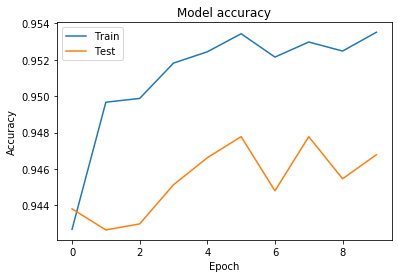

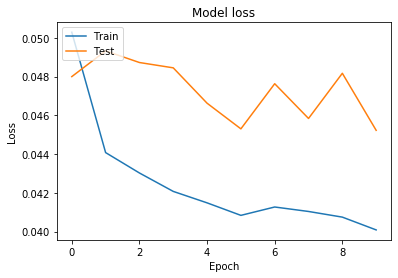

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [45]:
model.save("model.h5")

In [46]:
loaded_model = tf.keras.models.load_model('model.h5')

In [47]:
y_pred = loaded_model.predict(X_test_)

In [39]:
y_pred = model.predict(X_test_)

In [64]:
y = y.reshape((40336))
y.shape

(40336,)

In [65]:
# converting the continuous values which are outputs from the sigmoid function into discrete values - 0 or 1
from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    print(k)
    dist[k] /= len(X)

acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1

final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)


0
1
{0: 0.17729020975190177}
[0 0 0 ... 0 1 0]


In [49]:
# generating the confusion matrix and the classfication report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_, final_pred))
print (classification_report(y_test_,final_pred))

[[9023  297]
 [ 328  436]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9320
           1       0.59      0.57      0.58       764

    accuracy                           0.94     10084
   macro avg       0.78      0.77      0.77     10084
weighted avg       0.94      0.94      0.94     10084



In [8]:
sepsis_cleaned_data = pd.read_csv('sepsis_cleaned_data_temporal.csv')
sepsis_clean = sepsis_cleaned_data.to_numpy()
X = sepsis_clean.reshape((40336,40,10))

In [9]:
sepsis_labels_data = pd.read_csv('sepsis_cleaned_data_temporal_labels.csv')
sepsis_labels = sepsis_labels_data.to_numpy()
y = sepsis_labels.reshape(40336)

In [10]:
X, y = np.array(X) , np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)

Train on 24201 samples, validate on 6051 samples
Epoch 1/2
24201/24201 [==============================] - 61s 3ms/sample - loss: 0.0486 - accuracy: 0.9423 - val_loss: 0.0503 - val_accuracy: 0.9425
Epoch 2/2
24201/24201 [==============================] - 60s 2ms/sample - loss: 0.0445 - accuracy: 0.9489 - val_loss: 0.0542 - val_accuracy: 0.9393


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                multiple                  71168     
_________________________________________________________________
lstm_5 (LSTM)                multiple                  131584    
_________________________________________________________________
dense_8 (Dense)              multiple                  16512     
_________________________________________________________________
dense_9 (Dense)              multiple                  16512     
_________________________________________________________________
dense_10 (Dense)             multiple                  8256      
_________________________________________________________________
dense_11 (Dense)             multiple                  65        
Total params: 244,097
Trainable params: 244,097
Non-trainable params: 0
________________________________________________